# **CP462 Project:  Group 4**

# หัวข้อ : **Predicting Student Employment Opportunity**

**สมาชิก:**
<br>1) นายธนัท กันหารี (ID: 66102010142)
<br>2) นายเอกภพ อุ่นมา (ID : 66102010158)
<br>2) นางสาวเอมี่หลุยส์ บราวน์ (ID : 66102010572)
<br><br>
**Dataset:** https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset
 <br>
**Source:** https://www.kaggle.com/code/tiwariar273/college-student-placement-prediction-eda-ml

## **Import Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

**คำอธิบาย Libraries**

* pandas : `import pandas as pd`
   * ใช้สำหรับ จัดการข้อมูลตาราง (แถว-คอลัมน์) เหมือน Excel
   * สามารถอ่านไฟล์ได้หลายแบบ เช่น CSV, Excel, SQL
   * มีโครงสร้างข้อมูลหลักคือ DataFrame (ข้อมูลตาราง) และ Series (คอลัมน์เดียว)

* matplotlib.pyplot : `import matplotlib.pyplot as plt`
   * ใช้สำหรับ สร้างกราฟ/แผนภูมิ หลัก ๆ เช่น เส้น (line), แท่ง (bar), กระจาย (scatter)
   * เป็น library สร้าง visualization ขั้นพื้นฐานใน Python

* seaborn : `import seaborn as sns`
   * เป็น library ที่สร้างขึ้นต่อยอดจาก matplotlib
   * ช่วยให้ สร้างกราฟที่สวยงาม และเข้าใจง่ายขึ้น
   * ใช้กับข้อมูลเชิงสถิติ เช่น boxplot, heatmap, violin plot

* numpy : `import numpy as np `
   * ใช้สำหรับ การคำนวณเชิงตัวเลขและ array
   * รองรับการทำงานกับ Matrix, Vector, Linear Algebra
   * เร็วกว่าการใช้ list ของ Python ธรรมดา

* tabulate : `from tabulate import tabulate`
   * ใช้สำหรับ แสดงผลข้อมูลในรูปแบบตาราง ที่อ่านง่ายขึ้น (เช่น ใน console หรือ notebook)
   * นิยมใช้เพื่อทำให้ DataFrame หรือ list ดูเป็นตารางสวย ๆ

* scipy.stats : `import scipy.stats as stats`
   * ใช้สำหรับ คำนวณทางสถิติ เช่น การทดสอบสมมติฐาน (hypothesis testing), ค่าความน่าจะเป็น (probability distribution)
   * เช่น t-test, chi-square test, normal distribution

* mpl_toolkits.mplot3d : `from mpl_toolkits.mplot3d import Axes3D `
   * เป็นเครื่องมือเสริมของ matplotlib สำหรับ สร้างกราฟ 3 มิติ (3D Plotting)
   * ใช้สำหรับแสดงผลข้อมูลที่มีแกน x, y, z

* sklearn.preprocessing.StandardScaler : `from sklearn.preprocessing import StandardScaler`
   * เป็นเครื่องมือจาก scikit-learn ใช้สำหรับ ปรับสเกลข้อมูล (Normalization/Standardization)
   * ทำให้ข้อมูลแต่ละคอลัมน์มีค่าเฉลี่ย = 0 และส่วนเบี่ยงเบนมาตรฐาน = 1
   * ช่วยให้โมเดล Machine Learning ทำงานได้แม่นยำขึ้น

* warnings : `import warnings` `warnings.filterwarnings('ignore')`
   * ใช้สำหรับ ควบคุมข้อความแจ้งเตือน (warning) ใน Python
   * เช่น บาง library จะมี warning ขึ้นมาเวลา run code → เราสามารถซ่อนมันได้

* chi2_contingency : `from scipy.stats import chi2_contingency`
   * ใช้สำหรับ ทดสอบความสัมพันธ์ระหว่างตัวแปรเชิงหมวดหมู่ (Categorical Variables)

* train_test_split, StratifiedKFold, RandomizedSearchCV : `from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV`
   * ใช้สำหรับแบ่งข้อมูล train–test (train_test_split)
   * StratifiedKFold: ทำ K-fold โดยรักษาสัดส่วน class ไว้เท่าเดิม (เหมาะกับ imbalance)
   * RandomizedSearchCV: ใช้สุ่มหาค่า Hyperparameter ที่ดีที่สุดแบบประหยัดเวลา (ไม่ต้อง grid search ทุกค่า)

* StandardScaler, LabelEncoder : `from sklearn.preprocessing import StandardScaler, LabelEncoder`
   * StandardScaler: ปรับสเกลข้อมูลให้มี mean = 0, std = 1 → ช่วยให้ ML อย่าง Logistic, KNN ทำงานดีขึ้น
   * LabelEncoder: แปลงข้อมูลประเภทข้อความ → เป็นตัวเลข (เช่น “Yes/No” → 1/0)

* LogisticRegression : `from sklearn.linear_model import LogisticRegression`
   * โมเดลสำหรับ Classification แบบเส้นตรง
   * ใช้กับปัญหาทำนายแบบ 2 classes หรือหลาย classes ได้
   * ทำงานเร็ว ตีความง่าย เหมาะกับ baseline model

* KNeighborsClassifier (KNN) : `from sklearn.neighbors import KNeighborsClassifier`
  * โมเดลที่พยากรณ์โดยดู “เพื่อนบ้านใกล้เคียง k คน”
  * เหมาะกับข้อมูลที่ไม่เป็นเส้นตรง
  * ต้องทำ scaling ก่อนเสมอ เพราะ sensitive ต่อระยะทาง


* RandomForestClassifier : `from sklearn.ensemble import RandomForestClassifier`
  * โมเดล Ensemble ที่ใช้ “หลาย ๆ decision tree” มารวมกัน
  *  แม่นยำสูง ทนต่อ noise
  * ใช้ได้ดีทั้งข้อมูลต่อเนื่องและหมวดหมู่

* GaussianNB (Naive Bayes) : `from sklearn.naive_bayes import GaussianNB`
  * ใช้กับปัญหาจำแนกประเภท ข้อสมมติ “ตัวแปรอิสระต่อกัน”
  * เร็วมาก เหมาะกับข้อมูลที่มีจำนวน features เยอะ

* ImbPipeline (Pipeline ของ imblearn) : `from imblearn.pipeline import Pipeline as ImbPipeline`
  * Pipeline สำหรับ imbalanced dataset
  * ใช้เชื่อมต่อขั้นตอน เช่น scaling → oversampling → model
  * ป้องกันการรั่วข้อมูล (data leakage)*


* SMOTE : `from imblearn.over_sampling import SMOTE`
  * เทคนิคสร้างข้อมูล synthetic ใน class ที่มีน้อย
  * ช่วยแก้ปัญหา class imbalance
  * สร้างข้อมูลใหม่ตามตำแหน่งใกล้เคียง (k-nearest neighbors)

* classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score :

```
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
```
  * classification_report: สรุป precision, recall, f1-score
  * confusion_matrix: ตารางสับสน TP, FP, FN, TN
  * ConfusionMatrixDisplay: วาด confusion matrix ให้ดูเป็นภาพ
  * precision_score: วัดความแม่นของ “สิ่งที่ทำนายว่าเป็นคลาส positive”
  * recall_score: วัดว่า “เจอ positive ครบแค่ไหน”
  * f1_score: ค่าเฉลี่ย harmonic ของ precision & recall



## **Import Dataset**

**คำอธิบายการ Import Dataset**

`kagglehub` :  kagglehub เป็น library ที่ช่วยให้โหลด dataset จาก Kaggle ได้ง่าย ๆ </br>
`KaggleDatasetAdapter` : ตัวเลือก adapter เพื่อระบุว่าเราจะโหลด dataset ในรูปแบบไหน (ที่นี่คือ Pandas DataFrame)

`file_path = "college_student_placement_dataset.csv"` : ระบุชื่อไฟล์ที่ต้องการโหลดจาก dataset บน Kaggle
Dataset บน Kaggle อาจมีหลายไฟล์ → ตรงนี้เลือกไฟล์ college_student_placement_dataset.csv

`kagglehub.load_dataset()` : ฟังก์ชันสำหรับโหลด dataset

`KaggleDatasetAdapter.PANDAS` : โหลดแล้วให้เป็น Pandas DataFrame

`"sahilislam007/college-student-placement-factors-dataset"` : path ของ dataset บน Kaggle (owner/dataset-name)

`file_path` : ไฟล์ที่ต้องการโหลดจริง ๆ (college_student_placement_dataset.csv)

`.head()` : คือ method ของ DataFrame




In [ ]:
# Import dataset จาก Kaggle API (load via kagglehub - pandas DataFrame)
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "college_student_placement_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sahilislam007/college-student-placement-factors-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

100%|██████████| 354k/354k [00:00<00:00, 8.77MB/s]


College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1        No  
4                   2        No


## **Exploratory Data Analysis**

### ดูภาพรวมข้อมูล (Data Overview)

##### ดูโครงสร้างตารางข้อมูล

In [ ]:
print("ชุดข้อมูลนี้มีจำนวน (row, column) : " , df.shape)

ชุดข้อมูลนี้มีจำนวน (row, column) :  (10000, 10)


In [ ]:
print("ชุดข้อมูลนี้ประกอบไปด้วย Column ดังนี้ : ", df.columns)

ชุดข้อมูลนี้ประกอบไปด้วย Column ดังนี้ :  Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')


##### ดูตัวอย่างข้อมูลจริง

In [ ]:
df.head() # ดูตัวอย่างข้อมูล 5 แถวแรก

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1        No  
4                   2        No

In [ ]:
df.tail() # ดูตัวอย่างข้อมูล 5 แถวสุดท้าย

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
9995                    No                       1                     8   
9996                    No                       0                     7   
9997                   Yes                       3                     9   
9998                    No                       7                     5   
9999                    No                       3                     5   

      Projects_Completed Placement  
9995                   0       Yes  
9996                   2        No  
9997                   5        No  
9998                   1        No  
9999                   5        No

##### ดูชนิดข้อมูล

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


##### ดูค่าสถิติพื้นฐาน

Column CGPA พบความผิดปกติ -> นำไปแก้ไขในขั้นตอนต่อ ๆ ไป

In [ ]:
df.describe()

IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.471800         7.535673      7.532379              5.546400   
std       15.053101         1.447519      1.470141              2.873477   
min       41.000000         5.000000      4.540000              1.000000   
25%       89.000000         6.290000      6.290000              3.000000   
50%       99.000000         7.560000      7.550000              6.000000   
75%      110.000000         8.790000      8.770000              8.000000   
max      158.000000        10.000000     10.460000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count            10000.000000          10000.000000        10000.000000  
mean                 4.970900              5.561800            2.513400  
std                  3.160103              2.900866            1.715959  
min                  0.000000              1.000000            0.000000  
25%                  2.000000              3.000000            1.000000  
50%                  5.000000              6.000000            3.000000  
75%                  8.000000              8.000000            4.000000  
max                 10.000000             10.000000            5.000000

### ตรวจสอบคุณภาพข้อมูล (Data Quality Check)

##### Missing Values

ชุดข้อมูลนี้ไม่มีค่าว่าง

In [ ]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

##### Duplicates Records

ชุดข้อมูลนี้ไม่มีข้อมูลซ้ำ

In [ ]:
print(df.duplicated().sum())

0


##### ตรวจสอบค่าผิดปกติ / Outliers

###### IQR-based Outlier Detection

Column IQ พบ Outliers จำนวน 61 ค่า

In [ ]:
# IQR-based Outlier Detection Function

numerical_cols = df.select_dtypes(include=np.number).columns

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, Q1, Q3, lower_bound, upper_bound


outlier_summary = []

for col in numerical_cols:
    outliers, Q1, Q3, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        "Column": col,
        "Q1": round(Q1,2),
        "Q3": round(Q3,2),
        "IQR": round(Q3-Q1,2),
        "Lower Bound": round(lower,2),
        "Upper Bound": round(upper,2),
        "Number of Outliers": len(outliers)
    })

# สร้าง DataFrame
outlier_df = pd.DataFrame(outlier_summary)
outlier_df

Column     Q1      Q3    IQR  Lower Bound  Upper Bound  \
0                      IQ  89.00  110.00  21.00        57.50       141.50   
1         Prev_Sem_Result   6.29    8.79   2.50         2.54        12.54   
2                    CGPA   6.29    8.77   2.48         2.57        12.49   
3    Academic_Performance   3.00    8.00   5.00        -4.50        15.50   
4  Extra_Curricular_Score   2.00    8.00   6.00        -7.00        17.00   
5    Communication_Skills   3.00    8.00   5.00        -4.50        15.50   
6      Projects_Completed   1.00    4.00   3.00        -3.50         8.50   

   Number of Outliers  
0                  61  
1                   0  
2                   0  
3                   0  
4                   0  
5                   0  
6                   0

###### เช็คจำนวนข้อมูลว่ามีค่าที่ผิดปกติจาก Range 0-10 กี่จำนวน

Column CGPA มีค่าที่ไม่ถูกต้องจำนวน 249 ค่า

In [ ]:
columns_to_check_0_to_10 = ['CGPA', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills']

# เตรียม list เก็บผลลัพธ์
invalid_summary = []

for col in columns_to_check_0_to_10:
    count_low = len(df[df[col] < 0])
    count_high = len(df[df[col] > 10.0])
    invalid_summary.append({
        "Column": col,
        "Less than 0": count_low,
        "Greater than 10": count_high
    })

# สร้าง DataFrame
invalid_df = pd.DataFrame(invalid_summary)
invalid_df


Column  Less than 0  Greater than 10
0                    CGPA            0              249
1         Prev_Sem_Result            0                0
2    Academic_Performance            0                0
3  Extra_Curricular_Score            0                0
4    Communication_Skills            0                0

###### จัดการค่าผิดปกติของ Column CGPA โดยการ capping (การตัดค่าเกินกรอบให้เป็นค่าขอบบน/ขอบล่าง)

In [ ]:
#จัดการค่าผิดปกติของ Column CGPA ที่มีค่าเกิน 10.0 249 ค่า
df.loc[df['CGPA'] > 10.00, 'CGPA'] = 10.00

# ตรวจสอบผลลัพธ์
print(df['CGPA'].max())

10.0


###### เช็คจำนวนข้อมูลว่ามีค่าที่ผิดปกติคือน้อยกว่า 0 กี่จำนวน

In [ ]:
# Columns ที่ต้องเช็คค่าติดลบ
columns_to_check_negative = ['IQ', 'Projects_Completed']

# เก็บผลลัพธ์
negative_summary = []

for col in columns_to_check_negative:
    count_invalid = len(df[df[col] < 0])
    negative_summary.append({
        "Column": col,
        "Less than 0": count_invalid
    })

# สร้าง DataFrame
negative_df = pd.DataFrame(negative_summary)
negative_df

Column  Less than 0
0                  IQ            0
1  Projects_Completed            0

In [ ]:
# ตรวจสอบค่าทางสถิติอีกครั้งหลังจากการจัดการค่าผิดปกติ
df.describe()

IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.471800         7.535673      7.528296              5.546400   
std       15.053101         1.447519      1.462917              2.873477   
min       41.000000         5.000000      4.540000              1.000000   
25%       89.000000         6.290000      6.290000              3.000000   
50%       99.000000         7.560000      7.550000              6.000000   
75%      110.000000         8.790000      8.770000              8.000000   
max      158.000000        10.000000     10.000000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count            10000.000000          10000.000000        10000.000000  
mean                 4.970900              5.561800            2.513400  
std                  3.160103              2.900866            1.715959  
min                  0.000000              1.000000            0.000000  
25%                  2.000000              3.000000            1.000000  
50%                  5.000000              6.000000            3.000000  
75%                  8.000000              8.000000            4.000000  
max                 10.000000             10.000000            5.000000

###### Unique Values

In [ ]:
# ระบุคอลัมน์ที่ต้องการเช็คค่า unique / value counts
columns_to_check = ['College_ID', 'Placement', 'Internship_Experience']

for col in columns_to_check:
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, "Count"]
    unique_count = df[col].nunique()

    print(f"\n=== {col} Summary (Unique values: {unique_count}) ===")
    print(tabulate(counts.head(10), headers='keys', tablefmt='fancy_grid', showindex=False)) # แสดงตัวอย่าง 10 แถว



=== College_ID Summary (Unique values: 100) ===
╒══════════════╤═════════╕
│ College_ID   │   Count │
╞══════════════╪═════════╡
│ CLG0062      │     133 │
├──────────────┼─────────┤
│ CLG0027      │     120 │
├──────────────┼─────────┤
│ CLG0075      │     119 │
├──────────────┼─────────┤
│ CLG0065      │     119 │
├──────────────┼─────────┤
│ CLG0023      │     118 │
├──────────────┼─────────┤
│ CLG0025      │     118 │
├──────────────┼─────────┤
│ CLG0073      │     116 │
├──────────────┼─────────┤
│ CLG0058      │     116 │
├──────────────┼─────────┤
│ CLG0026      │     115 │
├──────────────┼─────────┤
│ CLG0049      │     114 │
╘══════════════╧═════════╛

=== Placement Summary (Unique values: 2) ===
╒═════════════╤═════════╕
│ Placement   │   Count │
╞═════════════╪═════════╡
│ No          │    8341 │
├─────────────┼─────────┤
│ Yes         │    1659 │
╘═════════════╧═════════╛

=== Internship_Experience Summary (Unique values: 2) ===
╒═════════════════════════╤═════════╕
│ Inte

**สรุปจาก Unique Values และ Value Counts (College_ID, Placement, Internship_Experience)**

ผลลัพธ์จากการตรวจสอบค่า Unique และ Value Counts ในคอลัมน์ `College_ID`, `Placement`, และ `Internship_Experience` ให้ข้อมูลเชิงลึกเกี่ยวกับลักษณะของข้อมูลในแต่ละคอลัมน์

**ข้อสังเกตที่สำคัญ:**

* **College_ID:** คอลัมน์นี้มีค่า Unique จำนวนมาก ซึ่งเป็นรหัสเฉพาะของแต่ละวิทยาลัย การนับจำนวน (Value Counts) แสดงให้เห็นว่าแต่ละวิทยาลัยมีจำนวนนักศึกษาในชุดข้อมูลแตกต่างกันไป โดยมีวิทยาลัยที่มีนักศึกษาจำนวนมากที่สุด (เช่น CLG0062 มี 133 คน) และวิทยาลัยที่มีนักศึกษาจำนวนน้อยที่สุด (เช่น CLG0042 มี 75 คน) ข้อมูลนี้อาจมีประโยชน์ในการวิเคราะห์ผลการได้งานของนักศึกษาในแต่ละวิทยาลัยในภายหลัง
* **Placement:** คอลัมน์นี้มีค่า Unique สองค่าคือ 'Yes' และ 'No' ซึ่งแสดงสถานะการได้งานของนักศึกษา การนับจำนวนยืนยันว่ามีนักศึกษาที่ไม่ได้งาน (`No`) เป็นส่วนใหญ่ (8341 คน) ในขณะที่นักศึกษาที่ได้งาน (`Yes`) มีจำนวนน้อยกว่ามาก (1659 คน) นี่เป็นข้อมูลสำคัญที่บ่งชี้ว่าชุดข้อมูลนี้มีความไม่สมดุล (Imbalanced Dataset) ในตัวแปรเป้าหมาย
* **Internship_Experience:** คอลัมน์นี้มีค่า Unique สองค่าคือ 'Yes' และ 'No' ซึ่งแสดงว่านักศึกษามีประสบการณ์ฝึกงานหรือไม่ การนับจำนวนแสดงให้เห็นว่ามีนักศึกษาที่ไม่มีประสบการณ์ฝึกงาน (`No`) มากกว่านักศึกษาที่มีประสบการณ์ฝึกงาน (`Yes`) เล็กน้อย (6036 คน vs 3964 คน)

**ข้อสรุป:**

การตรวจสอบค่า Unique และ Value Counts ช่วยให้เราเข้าใจลักษณะของข้อมูลในคอลัมน์ที่เป็นหมวดหมู่ โดยเฉพาะอย่างยิ่งการทราบถึงความไม่สมดุลของข้อมูลในคอลัมน์ `Placement` ซึ่งเป็นตัวแปรเป้าหมาย และการกระจายตัวของนักศึกษาในแต่ละวิทยาลัยและสถานะประสบการณ์ฝึกงาน ข้อมูลเหล่านี้จะเป็นประโยชน์ในการตัดสินใจเลือกวิธีการประมวลผลข้อมูลและการสร้างโมเดลในขั้นตอนต่อไป

##### Data type Validation

In [ ]:
df.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

##### แปลงเกรด (CGPA) และเพิ่ม Column GPA_scaled (เกรดที่แปลงมาจาก CGPA)
คำอธิบายเพิ่มเติม : แปลงเกรดจากระบบ 10.00 เป็น ระบบ 4.00 เพื่อให้มีความสอดคล้องกับระบบการศึกษาไทย

In [ ]:
# แปลงแบบ linear scaling จาก 10.00 --> 4.00
df['GPA_scaled'] = df['CGPA'] / 2.5

df.head()

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  GPA_scaled  
0                   4        No       2.512  
1                   0        No       2.148  
2                   1        No       2.332  
3                   1        No       2.300  
4                   2        No       3.076

###### การเปรียบเทียบเชิงสถิติระหว่าง CGPA และ GPA_scaled (Validity Check)

In [ ]:
# ตรวจสอบความสัมพันธ์ (Correlation)
corr = df['CGPA'].corr(df['GPA_scaled'])

# ใช้ Pearson correlation test (ตรวจสอบว่าความสัมพันธ์มีนัยสำคัญหรือไม่)
corr_coef, p_value = stats.pearsonr(df['CGPA'], df['GPA_scaled'])

print(f"Correlation: {corr:.4f}")
print(f"Pearson correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.10f}")

# ใช้การทดสอบ paired t-test (เปรียบเทียบค่าคู่ว่าแตกต่างกันหรือไม่)
t_stat, p_val_ttest = stats.ttest_rel(df['CGPA'], df['GPA_scaled'] * 2.5)  # กลับสู่ scale เดิม
print(f"Paired t-test statistic: {t_stat:.4f}, p-value: {p_val_ttest:.10f}")


Correlation: 1.0000
Pearson correlation coefficient: 1.0000
P-value: 0.0000000000
Paired t-test statistic: -0.4815, p-value: 0.6301540124


**สรุปจาก การเปรียบเทียบเชิงสถิติระหว่าง CGPA และ GPA_scaled**

โค้ดในเซลล์นี้ทำการตรวจสอบความสัมพันธ์และความแตกต่างทางสถิติระหว่างคอลัมน์ `CGPA` และ `GPA_scaled` (คอลัมน์ที่แปลงมาจาก CGPA) โดยใช้สองวิธีการ:

1.  **Correlation (Pearson Correlation):**
    *   คำนวณค่าสัมประสิทธิ์สหสัมพันธ์แบบ Pearson เพื่อดูความสัมพันธ์เชิงเส้นตรงระหว่าง `CGPA` และ `GPA_scaled`
    *   ผลลัพธ์: Correlation Coefficient = 1.0000 และ P-value = 0.0000000000
    *   **การตีความ:** ค่าสหสัมพันธ์เท่ากับ 1.0000 ยืนยันว่า `CGPA` และ `GPA_scaled` มีความสัมพันธ์เชิงบวกที่สมบูรณ์แบบ (Perfect Positive Correlation) ซึ่งเป็นไปตามที่คาดไว้เนื่องจาก `GPA_scaled` ได้มาจากการแปลงเชิงเส้นตรงจาก `CGPA` ค่า P-value ที่น้อยกว่า 0.05 อย่างมากบ่งชี้ว่าความสัมพันธ์นี้มีนัยสำคัญทางสถิติ

2.  **Paired t-test:**
    *   ทำการทดสอบ Paired t-test เพื่อเปรียบเทียบค่าเฉลี่ยของ `CGPA` และ `GPA_scaled` ที่ถูกปรับกลับไปเป็น scale เดิม (`GPA_scaled` * 2.5) เพื่อดูว่าค่าทั้งสองแตกต่างกันอย่างมีนัยสำคัญทางสถิติหรือไม่
    *   ผลลัพธ์: t-test statistic = -0.4815, p-value = 0.6301540124
    *   **การตีความ:** ค่า P-value (0.630) มากกว่า 0.05 ซึ่งหมายความว่า **เราไม่สามารถปฏิเสธสมมติฐานหลัก (Null Hypothesis)** ที่ว่าค่าเฉลี่ยของ `CGPA` และ `GPA_scaled` (ที่ปรับ scale แล้ว) ไม่แตกต่างกันอย่างมีนัยสำคัญทางสถิติ การทดสอบนี้ยืนยันว่าการแปลง scale จาก 10.00 เป็น 4.00 ด้วยวิธี Linear Scaling นั้นรักษาความสัมพันธ์และค่าเฉลี่ยเมื่อเทียบกับ scale เดิมได้เป็นอย่างดี

**ข้อสรุป:**

การวิเคราะห์เชิงสถิติยืนยันว่า `CGPA` และ `GPA_scaled` มีความสัมพันธ์ที่สมบูรณ์แบบในเชิงเส้นตรง และค่าเฉลี่ยของทั้งสองคอลัมน์ (เมื่ออยู่ใน scale เดียวกัน) ไม่ได้แตกต่างกันอย่างมีนัยสำคัญทางสถิติ การแปลงเกรดนี้จึงเป็นการแปลงที่เหมาะสมและรักษาคุณสมบัติทางสถิติของข้อมูลเดิมไว้ได้

In [ ]:
# ลบ CGPA
df.drop('CGPA', axis=1, inplace=True)

# อัปเดต numerical_cols ใหม่
numerical_cols = df.select_dtypes(include=np.number).columns


##### แปลง College_ID เป็นตัวเลขเพื่อเรียงตามลำดับตัวเลข

In [ ]:
# ลบ 'CLG' แล้วแปลงเป็น int
df['College_Num'] = df['College_ID'].str.replace('CLG','').astype(int)

counts = df['College_ID'].value_counts()
counts = counts.reindex(df.sort_values('College_Num')['College_ID'].unique())
counts


College_ID
CLG0001    109
CLG0002     86
CLG0003     97
CLG0004     91
CLG0005    112
          ... 
CLG0096     99
CLG0097    101
CLG0098    105
CLG0099     89
CLG0100     97
Name: count, Length: 100, dtype: int64

### สถิติเชิงพรรณา descriptive Statistics

In [ ]:
df.describe()

IQ  Prev_Sem_Result  Academic_Performance  \
count  10000.000000     10000.000000          10000.000000   
mean      99.471800         7.535673              5.546400   
std       15.053101         1.447519              2.873477   
min       41.000000         5.000000              1.000000   
25%       89.000000         6.290000              3.000000   
50%       99.000000         7.560000              6.000000   
75%      110.000000         8.790000              8.000000   
max      158.000000        10.000000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  \
count            10000.000000          10000.000000        10000.000000   
mean                 4.970900              5.561800            2.513400   
std                  3.160103              2.900866            1.715959   
min                  0.000000              1.000000            0.000000   
25%                  2.000000              3.000000            1.000000   
50%                  5.000000              6.000000            3.000000   
75%                  8.000000              8.000000            4.000000   
max                 10.000000             10.000000            5.000000   

         GPA_scaled  College_Num  
count  10000.000000  10000.00000  
mean       3.011318     50.70670  
std        0.585167     28.80141  
min        1.816000      1.00000  
25%        2.516000     26.00000  
50%        3.020000     51.00000  
75%        3.508000     75.00000  
max        4.000000    100.00000

In [ ]:
summary_stats = []

for col in numerical_cols:  # ใช้ numerical_cols เดียวกัน
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    summary_stats.append([col, skewness, kurtosis])

summary_df = pd.DataFrame(summary_stats, columns=['Column', 'Skewness', 'Kurtosis'])
summary_df


Column  Skewness  Kurtosis
0                      IQ  0.000698  0.027249
1         Prev_Sem_Result -0.034056 -1.193373
2    Academic_Performance -0.016208 -1.225981
3  Extra_Curricular_Score  0.010220 -1.220497
4    Communication_Skills -0.014202 -1.243721
5      Projects_Completed -0.013623 -1.277119
6              GPA_scaled -0.051367 -1.135242

**สรุปจาก Skewness และ Kurtosis (Numerical Variables)**

ตารางนี้แสดงค่า Skewness และ Kurtosis สำหรับตัวแปรเชิงตัวเลขทั้งหมดในชุดข้อมูล:

* **Skewness:** เป็นค่าที่บอกว่าการกระจายตัวของข้อมูลเบ้ไปทางซ้ายหรือขวาหรือไม่
    * ค่าใกล้ 0: การกระจายตัวสมมาตร (ใกล้เคียง Normal Distribution)
    * ค่าเป็นบวก: เบ้ขวา (หางยาวทางขวา)
    * ค่าเป็นลบ: เบ้ซ้าย (หางยาวทางซ้าย)

* **Kurtosis:** เป็นค่าที่บอกว่าการกระจายตัวของข้อมูลมีความโด่งหรือแบนเมื่อเทียบกับ Normal Distribution
    * ค่าใกล้ 0: ใกล้เคียง Normal Distribution
    * ค่าเป็นบวก: มีความโด่งมากกว่า (ข้อมูลกระจุกตัวที่ค่ากลางและมีหางที่หนากว่า)
    * ค่าเป็นลบ: มีความแบนมากกว่า (ข้อมูลกระจายตัวกว้างกว่าและมีหางที่บางกว่า)

**ข้อสังเกตที่สำคัญ:**

* **IQ:** ค่า Skewness และ Kurtosis ใกล้เคียง 0 มาก แสดงว่ามีการกระจายตัวที่สมมาตรและใกล้เคียง Normal Distribution
* **Prev_Sem_Result, CGPA, Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed:** ตัวแปรเหล่านี้มีค่า Kurtosis เป็นลบอย่างมีนัยสำคัญ (ประมาณ -1.2 ถึง -1.3) ซึ่งบ่งชี้ว่าการกระจายตัวมีความแบนมากกว่า Normal Distribution

**ข้อสรุป:**

ค่า Skewness และ Kurtosis ยืนยันว่าตัวแปรส่วนใหญ่มีการกระจายตัวที่ค่อนข้างสมมาตร (Skewness ใกล้ 0) แต่มีการกระจายตัวที่แบนกว่า Normal Distribution (Kurtosis เป็นลบ) โดยเฉพาะในตัวแปรที่เกี่ยวกับผลการเรียนและทักษะต่างๆ ซึ่งสอดคล้องกับการวิเคราะห์จาก Histogram และ Box Plot ก่อนหน้านี้

### การวิเคราะห์ตัวแปรเดียว (Univariate Analysis)

#### Numerical

##### Histogram : แสดงการกระจายตัวของ Numerical Column

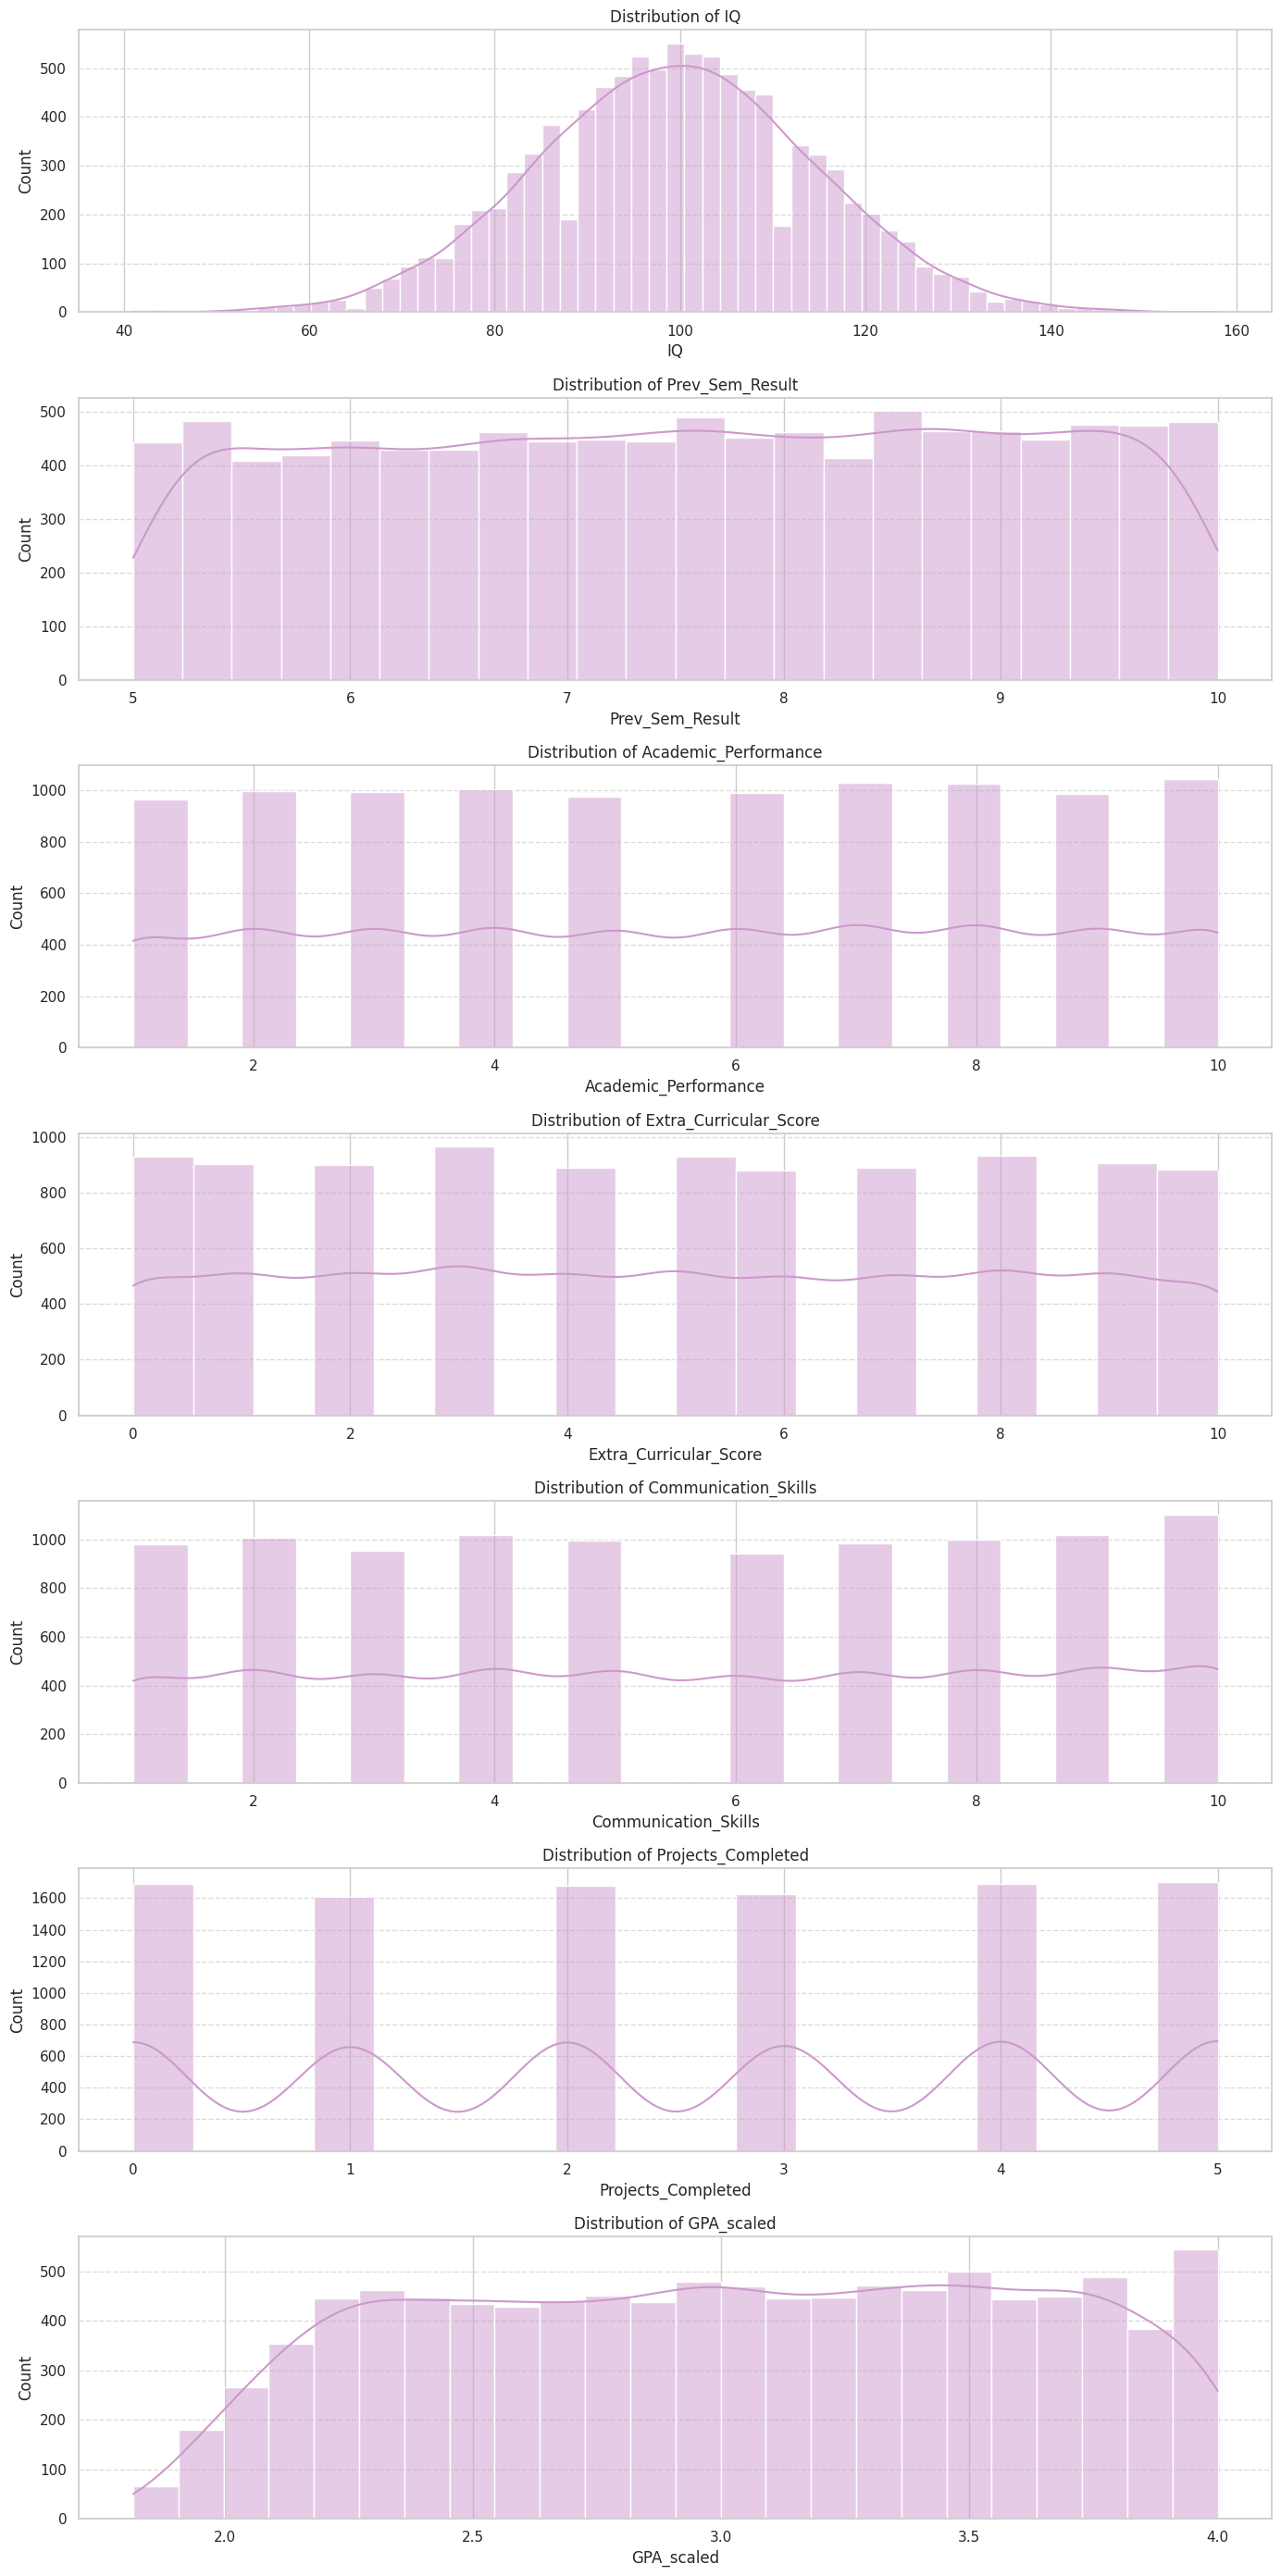

In [ ]:
sns.set_theme(style="whitegrid", palette="viridis")

plt.figure(figsize=(14, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i+1)
    sns.histplot(df[col], kde=True, color='#CC99CC')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


##### Box Plot : แสดงภาพรวมการกระจายตัวของ Numerical Column (แสดง median, quartiles, min/max ตรวจสอบ outlier)


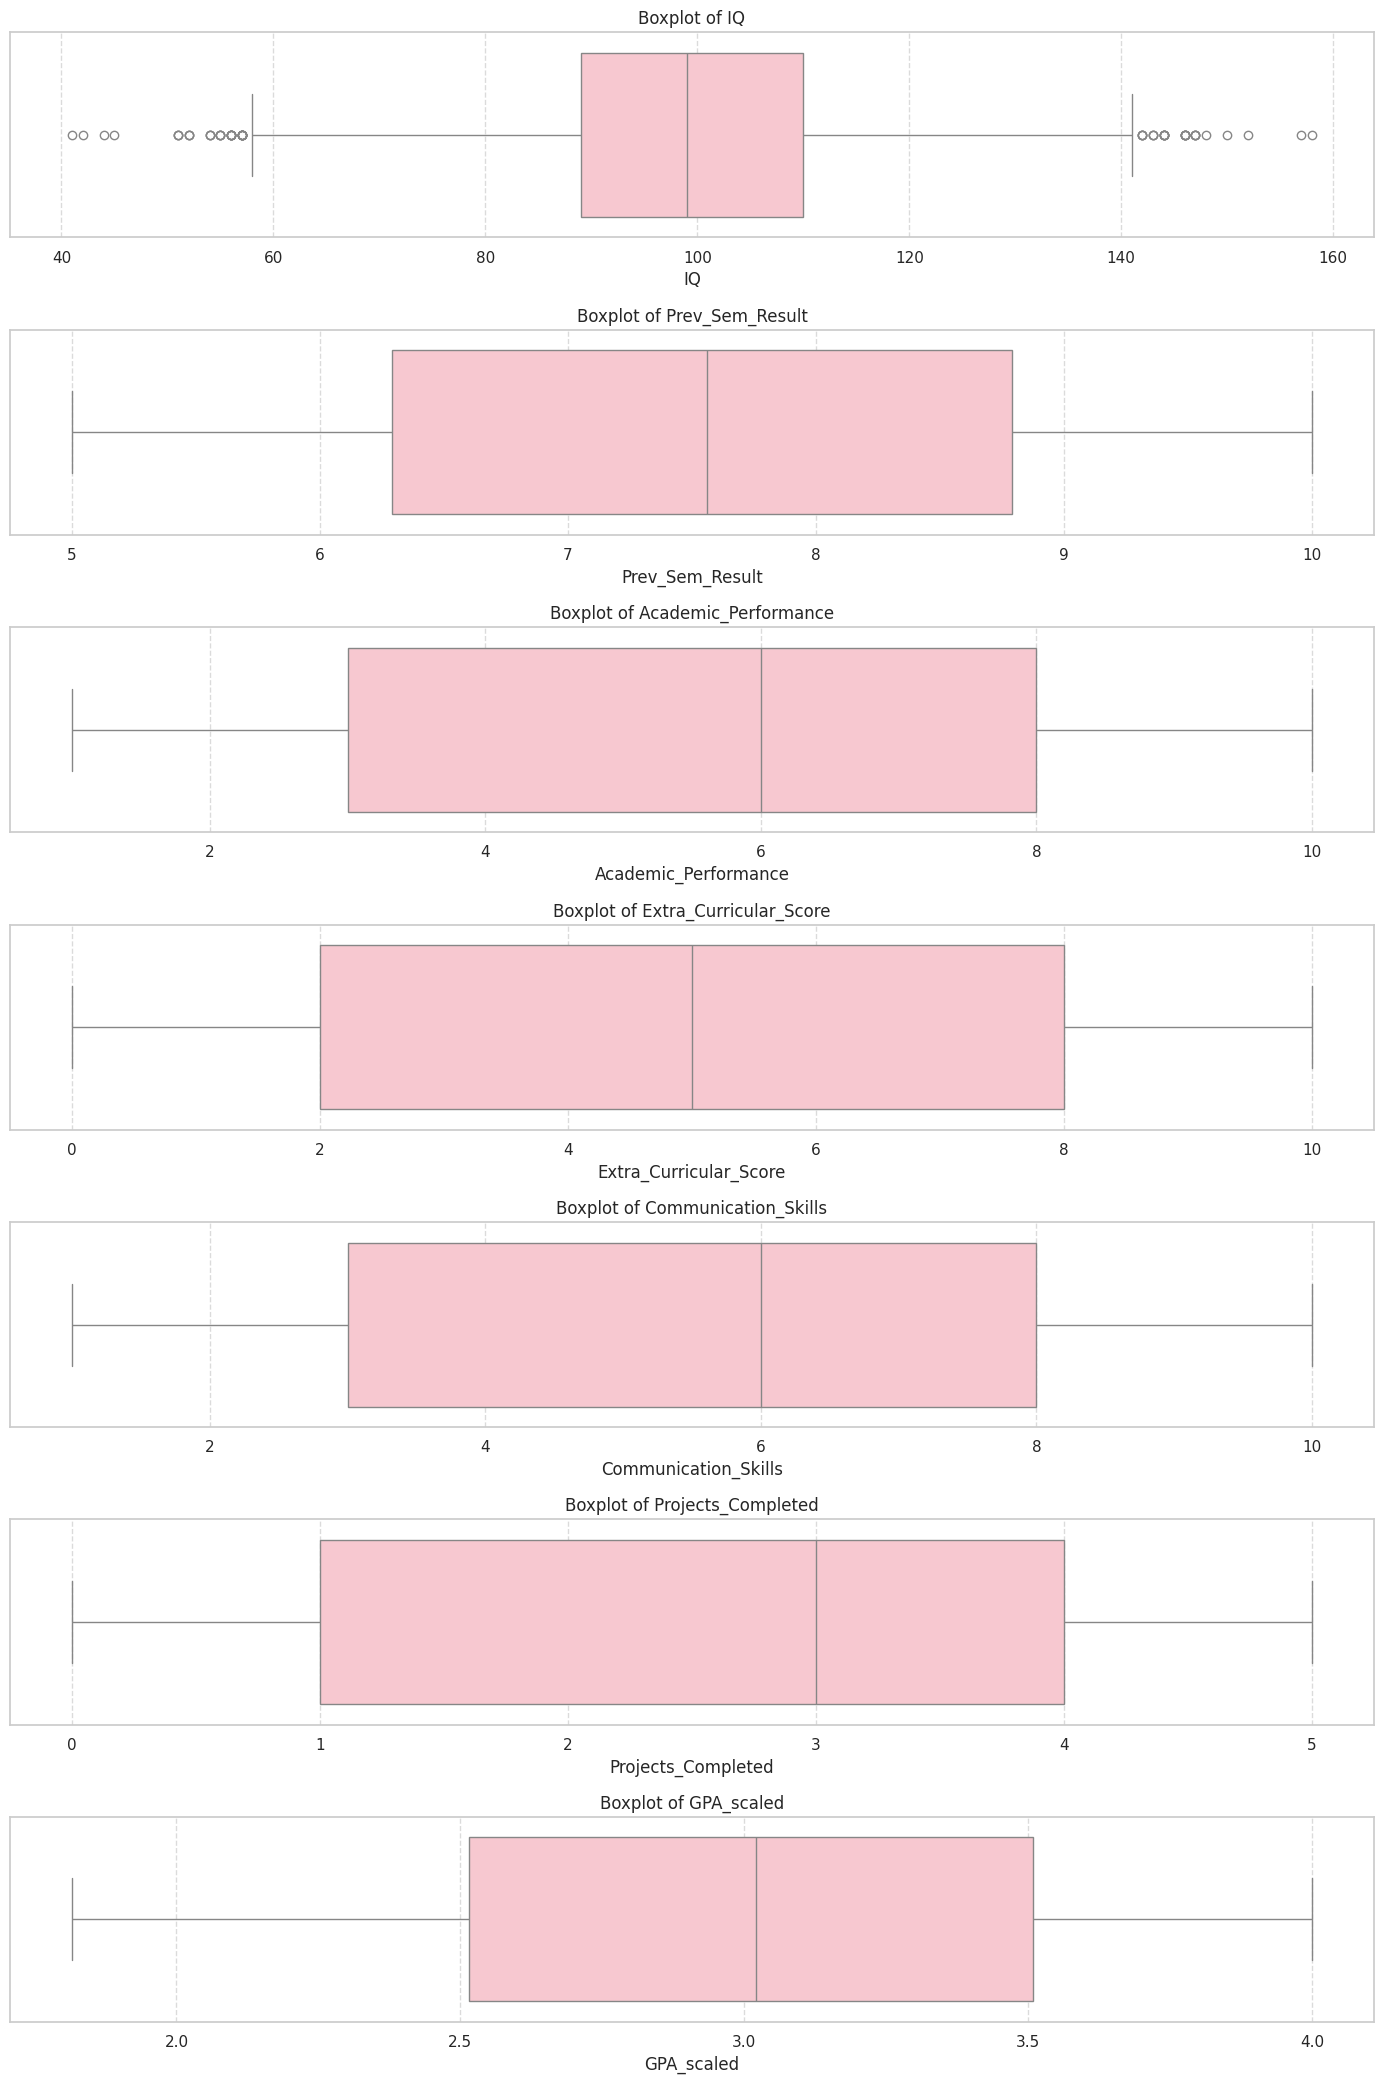

In [ ]:
plt.figure(figsize=(14, 3 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i+1)
    sns.boxplot(x=df[col], color='Pink')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**สรุปจาก Visualization : Histogram และ Box Plot (Numerical)**

**ภาพรวม:**
กราฟ Histogram และ Box Plot ช่วยให้เราเข้าใจการกระจายตัวของข้อมูลในแต่ละคอลัมน์ที่เป็นตัวเลขได้อย่างชัดเจน

**Histogram (การกระจายตัว):**
*   **IQ:** มีการกระจายตัวแบบปกติ (Normal Distribution) หรือโค้งระฆังคว่ำที่สมมาตรสวยงาม โดยมีค่ากลางอยู่ที่ประมาณ 100
*   **Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed:** ตัวแปรเหล่านี้มีการกระจายตัวแบบสม่ำเสมอ (Uniform Distribution) คือแต่ละค่ามีจำนวนใกล้เคียงกัน
*   **GPA_scaled:** มีการกระจายตัวแบบเบ้ซ้ายเล็กน้อย (Slightly Left-Skewed) โดยมีข้อมูลกระจุกตัวเป็นพิเศษที่เกรด 4.00 (ค่าสูงสุด)

**Box Plot (Outliers):**
*   **IQ:** แสดง Outliers ทั้งด้านต่ำและด้านสูง ซึ่งบ่งชี้ว่ามีนักศึกษาบางคนมีค่า IQ ที่แตกต่างจากกลุ่มส่วนใหญ่มาก
*   **Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed, GPA_scaled:** หลังจากจัดการค่าผิดปกติของ CGPA (ที่แปลงเป็น GPA_scaled) ตัวแปรเหล่านี้ไม่มี Outliers ที่น่ากังวล การกระจายตัวอยู่ในช่วงที่คาดการณ์ได้ตามค่า Q1, Q3 และ IQR

**ข้อสรุป:**
Visualization ยืนยันว่าตัวแปรส่วนใหญ่มีการกระจายตัวที่ค่อนข้างสม่ำเสมอและมี Outliers น้อย ยกเว้น IQ ที่ยังคงมี Outliers อยู่ ซึ่งอาจต้องพิจารณาเพิ่มเติมในขั้นตอนต่อไป อย่างไรก็ตาม การกระจายตัวของ IQ เป็นไปตามหลักการทางสถิติที่คาดไว้สำหรับ IQ โดยทั่วไป

**Insight จาก Visualization: Histogram และ Box Plot (Numerical)**

**ภาพรวม:**  
จากการดู Histogram และ Box Plot ของตัวแปรเชิงตัวเลขหลัก พบว่าเราสามารถเข้าใจการกระจายตัวและตรวจสอบ Outliers ได้อย่างชัดเจน ซึ่งช่วยในการเตรียมข้อมูลสำหรับการวิเคราะห์และสร้างโมเดลต่อไป

**ข้อสรุป:**  
- ตัวแปรเชิงตัวเลขส่วนใหญ่มีการกระจายตัวค่อนข้างสม่ำเสมอและ Outliers น้อย  
- IQ เป็นตัวแปรเดียวที่ยังมี Outliers ซึ่งอาจต้องพิจารณาในขั้นตอนต่อไป (เช่น การ Scaling, Transformation หรือการกรอง Outliers)  
- การกระจายตัวของ IQ สอดคล้องกับค่าที่คาดการณ์ตามหลักสถิติ IQ โดยทั่วไป  
- Insight นี้ช่วยในการเตรียมข้อมูลสำหรับการสร้างโมเดล Machine Learning และการวิเคราะห์เชิงลึกในขั้นถัดไป


#### Categorical

##### Bar Chart : นับจำนวนนิสิตในคอลัมน์ College_ID ในแต่ละ ID

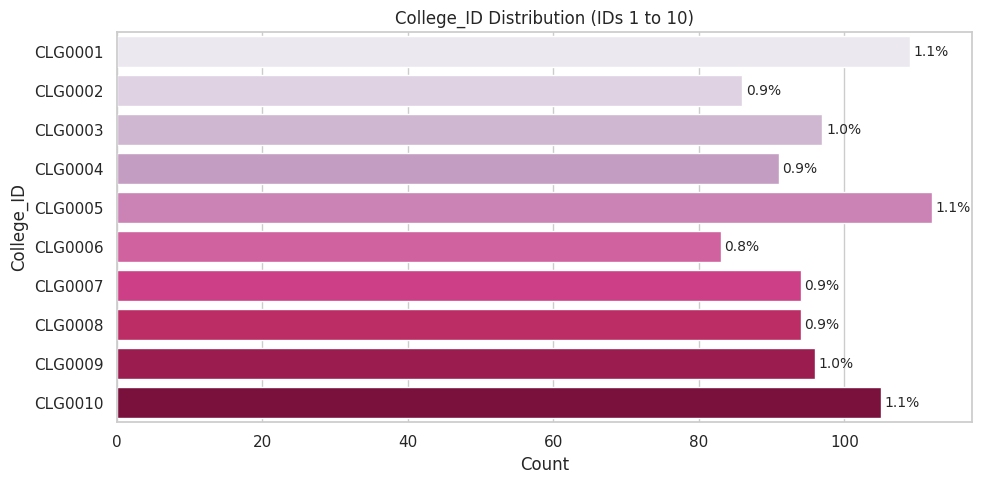

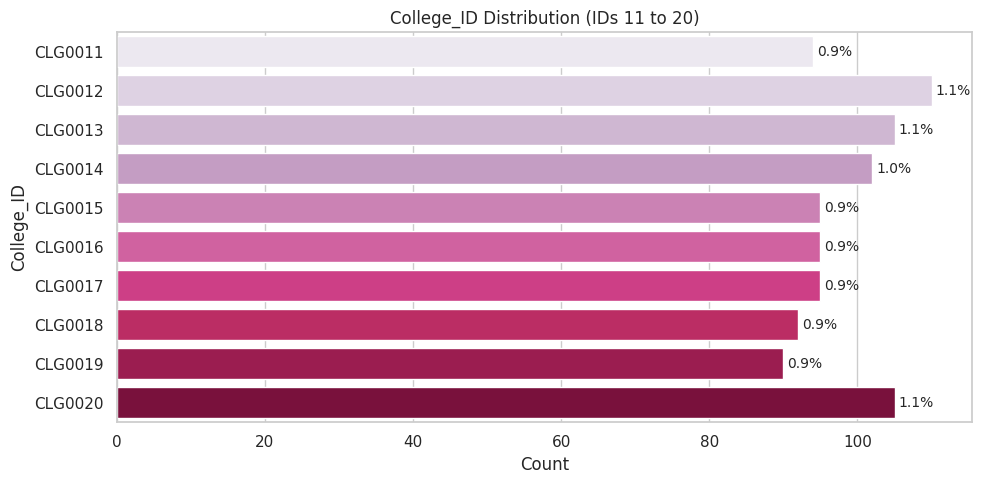

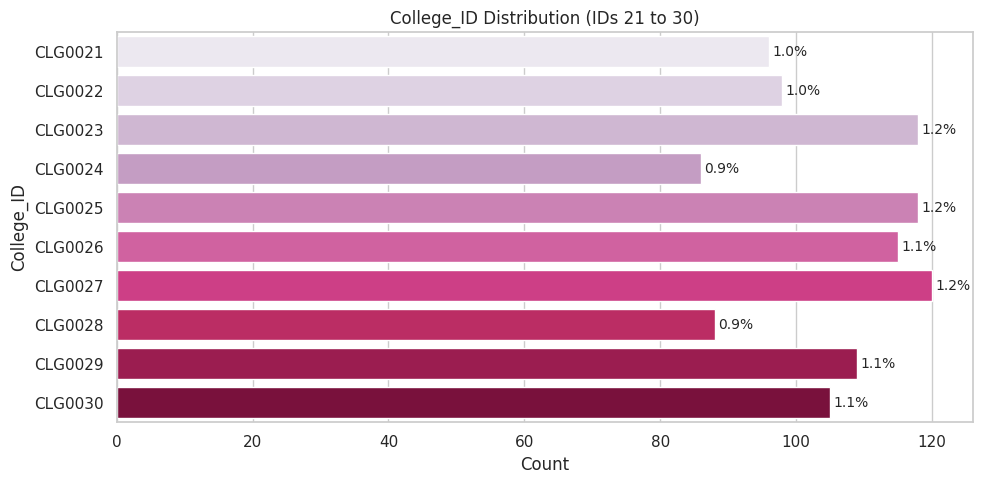

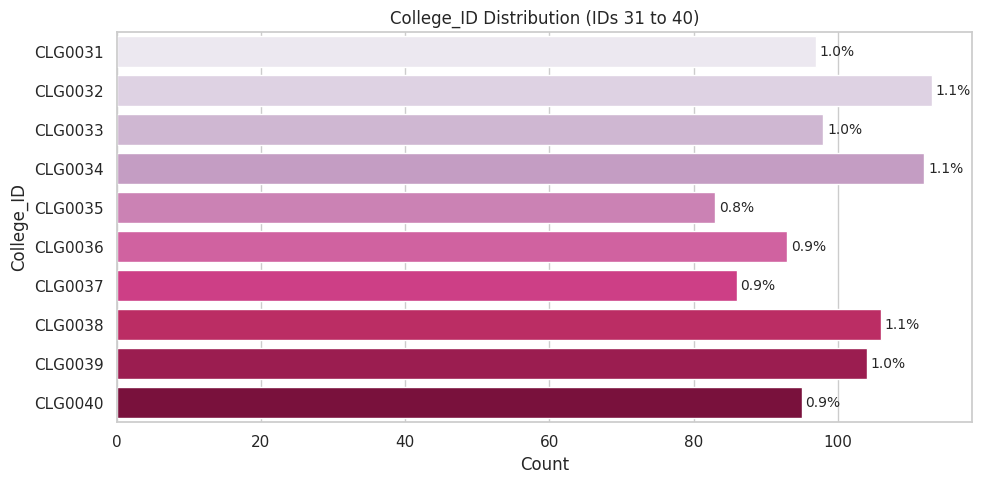

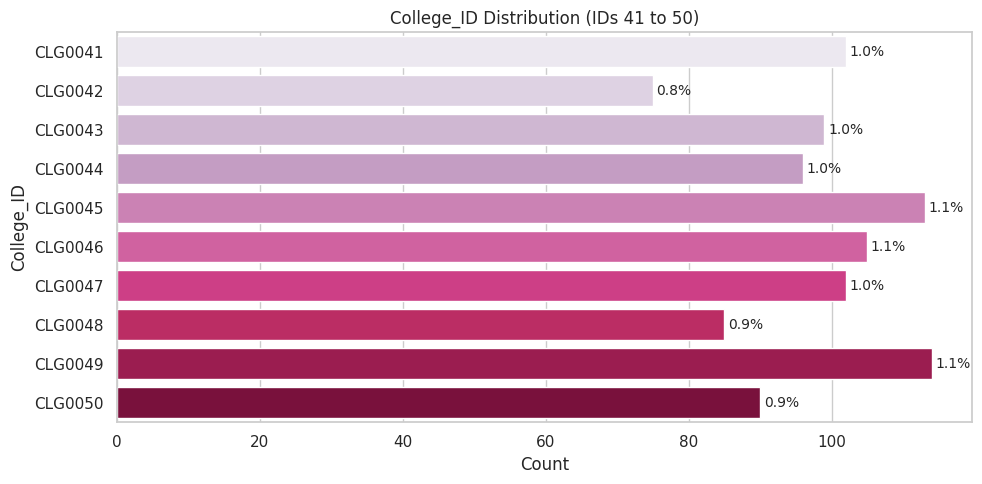

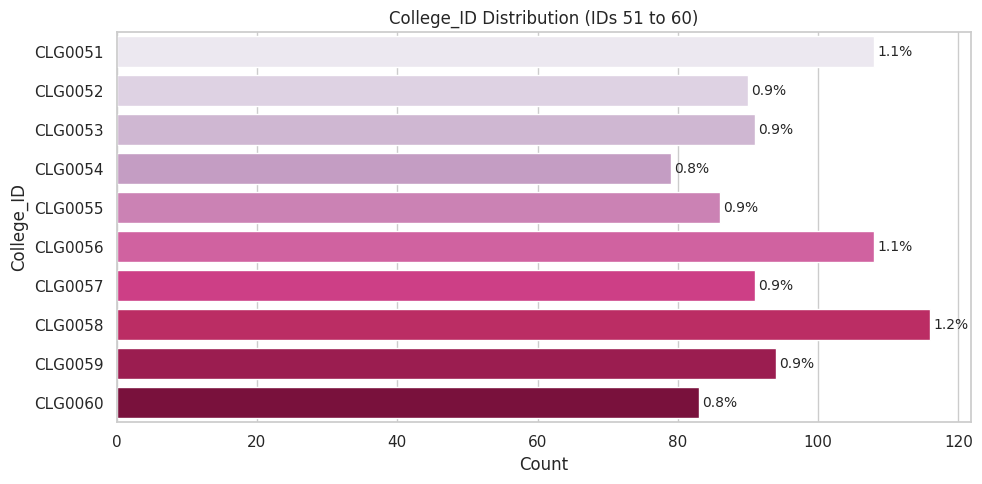

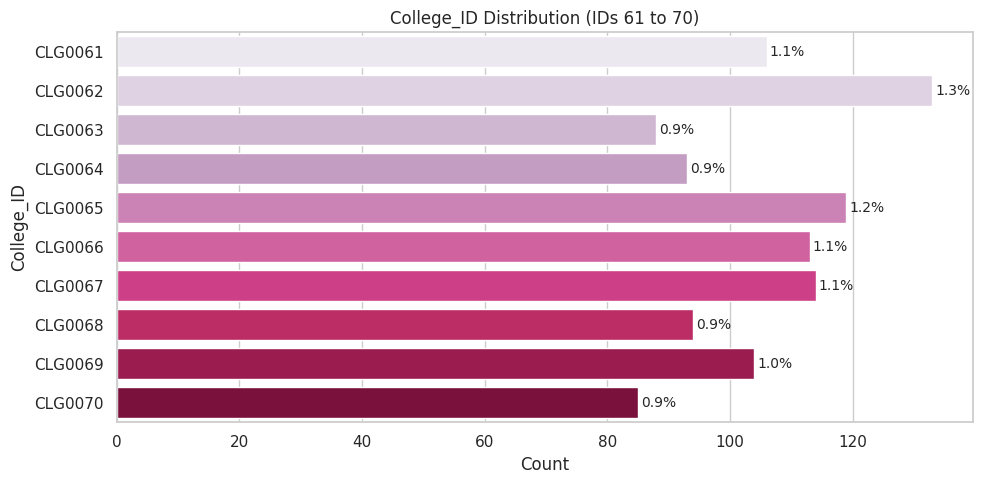

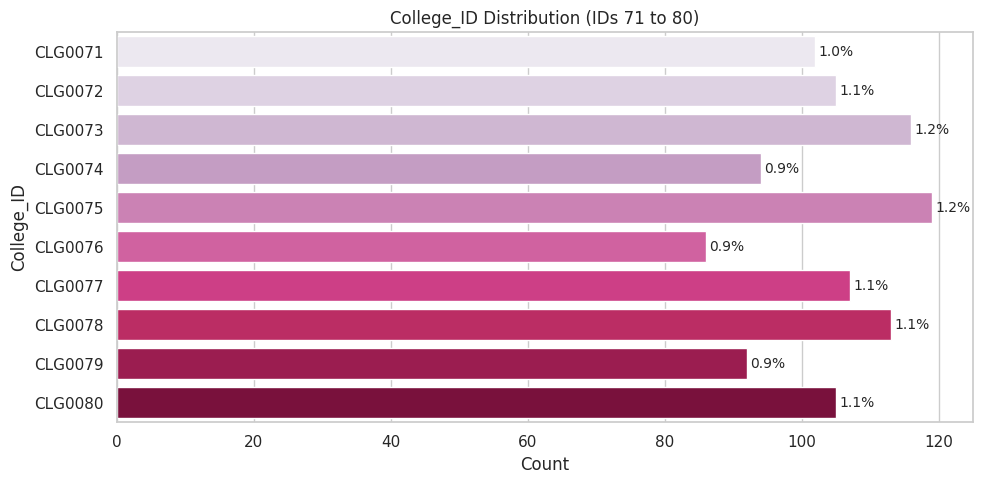

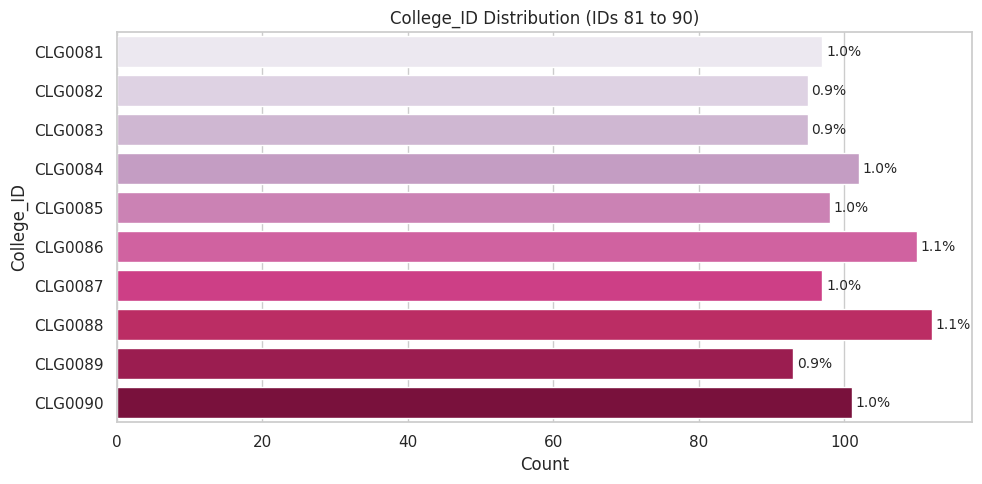

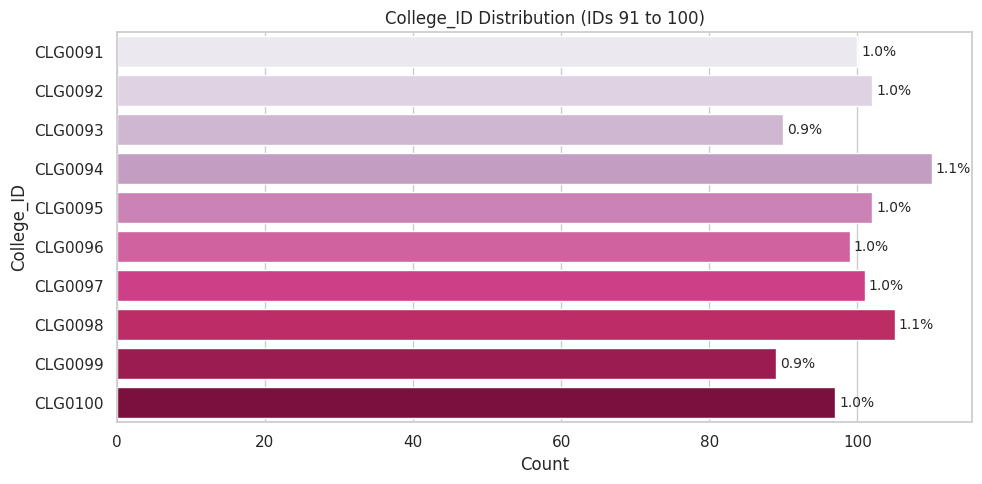


=== Batch 1 Summary ===
╒══════════════╤═════════╤══════════════╕
│ College_ID   │   Count │   Percentage │
╞══════════════╪═════════╪══════════════╡
│ CLG0001      │     109 │          1.1 │
├──────────────┼─────────┼──────────────┤
│ CLG0002      │      86 │          0.9 │
├──────────────┼─────────┼──────────────┤
│ CLG0003      │      97 │          1   │
├──────────────┼─────────┼──────────────┤
│ CLG0004      │      91 │          0.9 │
├──────────────┼─────────┼──────────────┤
│ CLG0005      │     112 │          1.1 │
├──────────────┼─────────┼──────────────┤
│ CLG0006      │      83 │          0.8 │
├──────────────┼─────────┼──────────────┤
│ CLG0007      │      94 │          0.9 │
├──────────────┼─────────┼──────────────┤
│ CLG0008      │      94 │          0.9 │
├──────────────┼─────────┼──────────────┤
│ CLG0009      │      96 │          1   │
├──────────────┼─────────┼──────────────┤
│ CLG0010      │     105 │          1   │
╘══════════════╧═════════╧══════════════╛

=== Batc

In [ ]:
num_per_plot = 10
num_plots = int(np.ceil(len(counts) / num_per_plot))

summary = {}

for i in range(num_plots):
    subset_counts = counts[i*num_per_plot:(i+1)*num_per_plot]

    plt.figure(figsize=(10,5))
    sns.barplot(x=subset_counts.values, y=subset_counts.index, palette='PuRd')
    plt.xlabel('Count')
    plt.ylabel('College_ID')
    plt.title(f'College_ID Distribution (IDs {i*num_per_plot+1} to {(i+1)*num_per_plot})')

    # ใส่ % บนแท่ง
    total = len(df)
    subset_summary = []
    for index, value in enumerate(subset_counts.values):
        pct = value / total * 100
        plt.text(value + 0.5, index, f'{pct:.1f}%', va='center', fontsize=10)
        subset_summary.append([subset_counts.index[index], value, round(pct,1)])

    plt.tight_layout()
    plt.show()

    summary[f'Batch {i+1}'] = subset_summary

# แสดงตารางสรุปแต่ละ batch
for batch, table in summary.items():
    print(f"\n=== {batch} Summary ===")
    print(tabulate(table, headers=['College_ID','Count','Percentage'], tablefmt='fancy_grid'))



**สรุปจาก Bar Chart (College_ID Distribution)**

กราฟ Bar Chart นี้แสดงจำนวนนักศึกษาในแต่ละวิทยาลัย (College_ID) โดยแบ่งแสดงเป็น Batch เนื่องจากมีวิทยาลัยจำนวนมาก (100 แห่ง)

**ข้อสังเกตที่สำคัญ:**

* **การกระจายตัวของนักศึกษา:** กราฟแสดงให้เห็นว่าจำนวนนักศึกษาในแต่ละวิทยาลัยมีความแตกต่างกันไป มีบางวิทยาลัยที่มีจำนวนนักศึกษาในชุดข้อมูลมากกว่าวิทยาลัยอื่นๆ เล็กน้อย (เช่น CLG0062, CLG0027, CLG0075) ในขณะที่บางวิทยาลัยมีจำนวนนักศึกษาน้อยกว่า (เช่น CLG0042)
* **สัดส่วนต่อชุดข้อมูลทั้งหมด:** ตารางสรุปแสดงให้เห็นว่าแต่ละวิทยาลัยมีสัดส่วนนักศึกษาต่อชุดข้อมูลทั้งหมดค่อนข้างใกล้เคียงกัน โดยส่วนใหญ่อยู่ที่ประมาณ 0.8% ถึง 1.3%

**ข้อสรุป:**

Bar Chart ช่วยให้เห็นภาพรวมของการกระจายตัวของนักศึกษาในแต่ละวิทยาลัย ซึ่งบ่งชี้ว่าชุดข้อมูลนี้มีการรวบรวมนักศึกษาจากวิทยาลัยต่างๆ ในจำนวนที่ค่อนข้างหลากหลาย แม้ว่าจะมีบางวิทยาลัยที่มีนักศึกษามากกว่าเล็กน้อย ข้อมูลนี้เป็นพื้นฐานในการพิจารณาว่า College_ID อาจเป็นปัจจัยที่มีผลต่อการได้งานหรือไม่ ซึ่งได้วิเคราะห์เพิ่มเติมในส่วนของการวิเคราะห์สองตัวแปรแล้ว

**Insight จาก Bar Chart: College_ID Distribution**

**ภาพรวม:**  
กราฟ Bar Chart แสดงจำนวนและสัดส่วนนักศึกษาในแต่ละวิทยาลัย (College_ID) โดยแบ่งเป็น Batch เนื่องจากมีวิทยาลัยจำนวนมาก (100 แห่ง)  

**การกระจายตัวของนักศึกษา:**  
- นักศึกษาในแต่ละวิทยาลัยมีจำนวนแตกต่างกันไป  
- บางวิทยาลัยมีจำนวนนักศึกษาสูงกว่า เช่น **CLG0062, CLG0027, CLG0075**  
- บางวิทยาลัยมีจำนวนนักศึกษาน้อยกว่า เช่น **CLG0042**  

**สัดส่วนต่อชุดข้อมูลทั้งหมด:**  
- สัดส่วนต่อวิทยาลัยส่วนใหญ่ค่อนข้างใกล้เคียงกัน ประมาณ **0.8% ถึง 1.3%** ของทั้งหมด  

**ข้อสรุป:**  
- ข้อมูลสะท้อนการรวบรวมตัวอย่างนักศึกษาจากหลายวิทยาลัยในจำนวนที่หลากหลาย  
- แม้ว่าบางวิทยาลัยจะมีนักศึกษามากกว่าเล็กน้อย แต่โดยรวมการกระจายตัวค่อนข้างสมดุล  
- ข้อมูลนี้เป็นพื้นฐานสำคัญสำหรับการพิจารณาว่า **College_ID** อาจมีผลต่อการได้งานหรือไม่ และสามารถนำไปวิเคราะห์เชิงสัมพันธ์ร่วมกับตัวแปรอื่น ๆ ต่อไป


##### Bar Chart  : นับจำนวนในคอลัมน์ Placement และ Internship_Experience


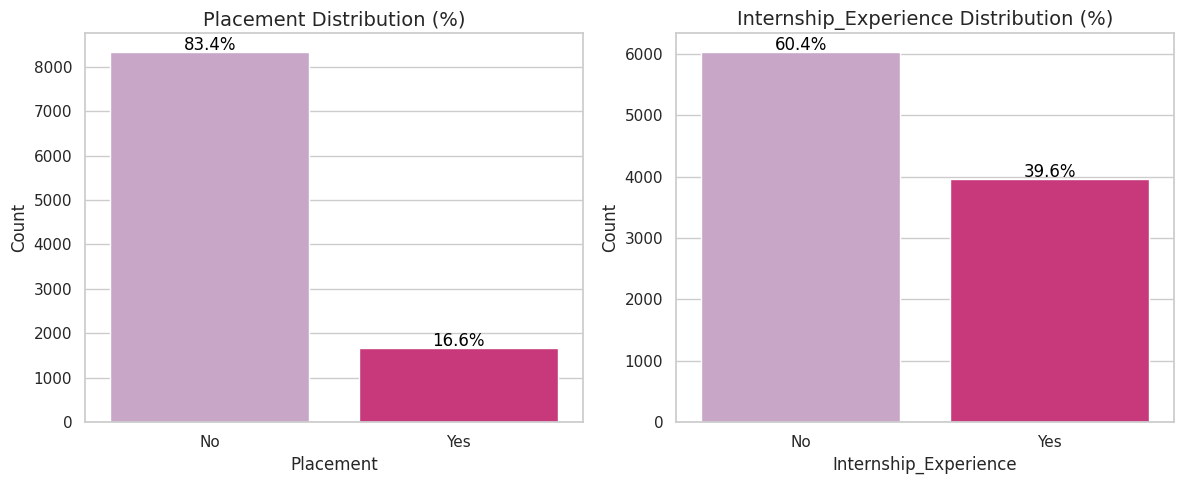


=== Placement Summary ===
╒═════════════╤═════════╤══════════════╕
│ Placement   │   Count │ Percentage   │
╞═════════════╪═════════╪══════════════╡
│ No          │    8341 │ 83.4%        │
├─────────────┼─────────┼──────────────┤
│ Yes         │    1659 │ 16.6%        │
╘═════════════╧═════════╧══════════════╛

=== Internship_Experience Summary ===
╒═════════════════════════╤═════════╤══════════════╕
│ Internship_Experience   │   Count │ Percentage   │
╞═════════════════════════╪═════════╪══════════════╡
│ No                      │    6036 │ 60.4%        │
├─────────────────────────┼─────────┼──────────────┤
│ Yes                     │    3964 │ 39.6%        │
╘═════════════════════════╧═════════╧══════════════╛


In [ ]:
sns.set_theme(style="whitegrid")

# ระบุคอลัมน์ที่จะทำกราฟ
columns_to_plot = ['Placement', 'Internship_Experience']

# สร้าง subplot ตามจำนวนคอลัมน์
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(6 * len(columns_to_plot), 5))

# ถ้ามีแค่ 1 คอลัมน์ ต้องแปลง axes เป็น list
if len(columns_to_plot) == 1:
    axes = [axes]

total = len(df)
summary = {}

for ax, col in zip(axes, columns_to_plot):
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        palette='PuRd',
        legend=False,
        ax=ax
    )

    # สร้างตาราง count + %
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, "Count"]
    counts["Percentage"] = (counts["Count"] / total * 100).round(1).astype(str) + "%"
    summary[col] = counts   # เก็บไว้ใน dict

    # ใส่ % บนแท่ง
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            percentage,
            (x, y),
            ha='center',
            va='center',
            fontsize=12,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # ตั้งชื่อกราฟ
    ax.set_title(f'{col} Distribution (%)', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# แสดงตารางสรุปแต่ละคอลัมน์
for col, table in summary.items():
    print(f"\n=== {col} Summary ===")
    print(tabulate(table, headers='keys', tablefmt='fancy_grid', showindex=False)) # from tabulate import tabulate

**สรุปจาก Bar Chart (Placement และ Internship Experience)**

กราฟ Bar Chart นี้แสดงการนับจำนวนและเปอร์เซ็นต์ของนักศึกษาตามสถานะการได้งาน (Placement) และประสบการณ์ฝึกงาน (Internship Experience)

**ข้อสังเกตที่สำคัญ:**

* **Placement:**
    * นักศึกษาที่ไม่ได้งาน (No) มีจำนวน 8341 คน คิดเป็น 83.4%
    * นักศึกษาที่ได้งาน (Yes) มีจำนวน 1659 คน คิดเป็น 16.6%
    * แสดงให้เห็นว่าในชุดข้อมูลนี้ มีจำนวนนักศึกษาที่ยังไม่ได้รับการจ้างงานมากกว่านักศึกษาที่ได้รับการจ้างงานอย่างมีนัยสำคัญ

* **Internship Experience:**
    * นักศึกษาที่ไม่มีประสบการณ์ฝึกงาน (No) มีจำนวน 6036 คน คิดเป็น 60.4%
    * นักศึกษาที่มีประสบการณ์ฝึกงาน (Yes) มีจำนวน 3964 คน คิดเป็น 39.6%
    * แสดงให้เห็นว่ามีนักศึกษาที่ไม่มีประสบการณ์ฝึกงานมากกว่านักศึกษาที่มีประสบการณ์ฝึกงานในชุดข้อมูลนี้

**ข้อสรุป:**

จากกราฟ Bar Chart เราได้เห็นภาพรวมของจำนวนและสัดส่วนของนักศึกษาในแต่ละกลุ่มตามสถานะการได้งานและประสบการณ์ฝึกงาน ข้อมูลนี้เป็นพื้นฐานสำคัญในการทำความเข้าใจการกระจายตัวของตัวแปรเป้าหมาย (Placement) และตัวแปรปัจจัยหนึ่ง (Internship Experience) ในชุดข้อมูลนี้

**Insight จาก Bar Chart: Placement และ Internship Experience**

**ภาพรวม:**  
กราฟ Bar Chart ช่วยให้เราเห็นจำนวนและสัดส่วนของนักศึกษาในแต่ละกลุ่มตามสถานะการได้งาน (Placement) และประสบการณ์ฝึกงาน (Internship Experience)  

**ข้อสรุป:**  
- ข้อมูลสะท้อนการกระจายตัวของตัวแปรเป้าหมาย (Placement) และตัวแปรปัจจัย (Internship Experience)  
- Insight นี้ช่วยให้เราเข้าใจภาพรวมของข้อมูลเบื้องต้น และเป็นพื้นฐานสำคัญสำหรับการวิเคราะห์ความสัมพันธ์ระหว่างตัวแปร และการสร้างโมเดล Machine Learning ต่อไป


### การวิเคราะห์สองตัวแปร (Bivariate Analysis)

#### วิเคราะห์หาความสัมพันธ์ categorical columns กับ Placement (Chi2 statistic, p-value)

In [ ]:
# หา categorical columns ทั้งหมด ยกเว้น target
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Placement']

chi2_results = []

for col in categorical_cols:
    table = pd.crosstab(df[col], df['Placement'])
    chi2, p, dof, expected = chi2_contingency(table)
    chi2_results.append({
        'Column': col,
        'Chi2': chi2,
        'p-value': p,
        'Significant': p < 0.05
    })

# สร้าง DataFrame สรุปผล
chi2_summary = pd.DataFrame(chi2_results).sort_values('p-value')
chi2_summary


Column        Chi2   p-value  Significant
0             College_ID  102.234032  0.391793        False
1  Internship_Experience    0.309789  0.577810        False

**สรุปผลการวิเคราะห์หาความสัมพันธ์ระหว่าง Categorical Columns กับ Placement (Chi2 statistic, p-value)**

โค้ดในเซลล์นี้ทำการทดสอบ Chi-Squared Test of Independence เพื่อประเมินว่ามีความสัมพันธ์อย่างมีนัยสำคัญทางสถิติระหว่างตัวแปรเชิงหมวดหมู่ (`College_ID`, `Internship_Experience`) กับตัวแปรเป้าหมาย (`Placement`) หรือไม่

**ผลลัพธ์จาก Chi-Squared Test:**

| Column                | Chi2       | p-value   | Significant   |
|-----------------------|------------|-----------|---------------|
| College_ID            | 102.234032 | 0.391793  | False         |
| Internship_Experience | 0.309789   | 0.577810  | False         |

**การตีความ:**

* **College_ID:** ค่า p-value (0.391793) มากกว่าระดับนัยสำคัญ 0.05 ซึ่งหมายความว่า **เราไม่สามารถปฏิเสธสมมติฐานหลัก (Null Hypothesis)** ที่ว่าไม่มีความสัมพันธ์ระหว่าง College_ID และ Placement ในชุดข้อมูลนี้ได้
* **Internship_Experience:** ค่า p-value (0.577810) มากกว่าระดับนัยสำคัญ 0.05 เช่นกัน ซึ่งหมายความว่า **เราไม่สามารถปฏิเสธสมมติฐานหลัก (Null Hypothesis)** ที่ว่าไม่มีความสัมพันธ์ระหว่าง Internship_Experience และ Placement ในชุดข้อมูลนี้ได้

**ข้อสรุป:**

ผลการทดสอบ Chi-Squared Test บ่งชี้ว่าในชุดข้อมูลนี้ ทั้ง **College_ID** และ **Internship_Experience** **ไม่ได้มีความสัมพันธ์อย่างมีนัยสำคัญทางสถิติ** กับสถานะการได้งาน (Placement) ซึ่งสอดคล้องกับข้อค้นพบก่อนหน้านี้ที่ว่า Internship_Experience ในชุดข้อมูลนี้ไม่ได้ส่งผลต่อการได้งานอย่างที่ควรจะเป็นในความเป็นจริง

**Insight จาก Chi-Squared Test: Categorical Columns vs. Placement**

**ภาพรวม:**  
ทดสอบความสัมพันธ์ระหว่างตัวแปรเชิงหมวดหมู่ (`College_ID`, `Internship_Experience`) กับตัวแปรเป้าหมาย (`Placement`) โดยใช้ **Chi-Squared Test of Independence**  

**ข้อสรุป:**  
- ทั้ง `College_ID` และ `Internship_Experience` **ไม่ได้มีความสัมพันธ์ทางสถิติที่ชัดเจน** กับสถานะการได้งานในชุดข้อมูลนี้  
- สอดคล้องกับข้อสังเกตจาก Visualization ก่อนหน้านี้ โดยเฉพาะ `Internship_Experience` ที่เดิมไม่มีผลต่อการได้งาน จึงอาจจำเป็นต้องสร้าง **Feature ใหม่** เพื่อสะท้อนคุณสมบัติที่มีความหมายมากขึ้น


#### วิเคราะห์หาความสัมพันธ์ numerical columns กับ Placement (Density Plot)

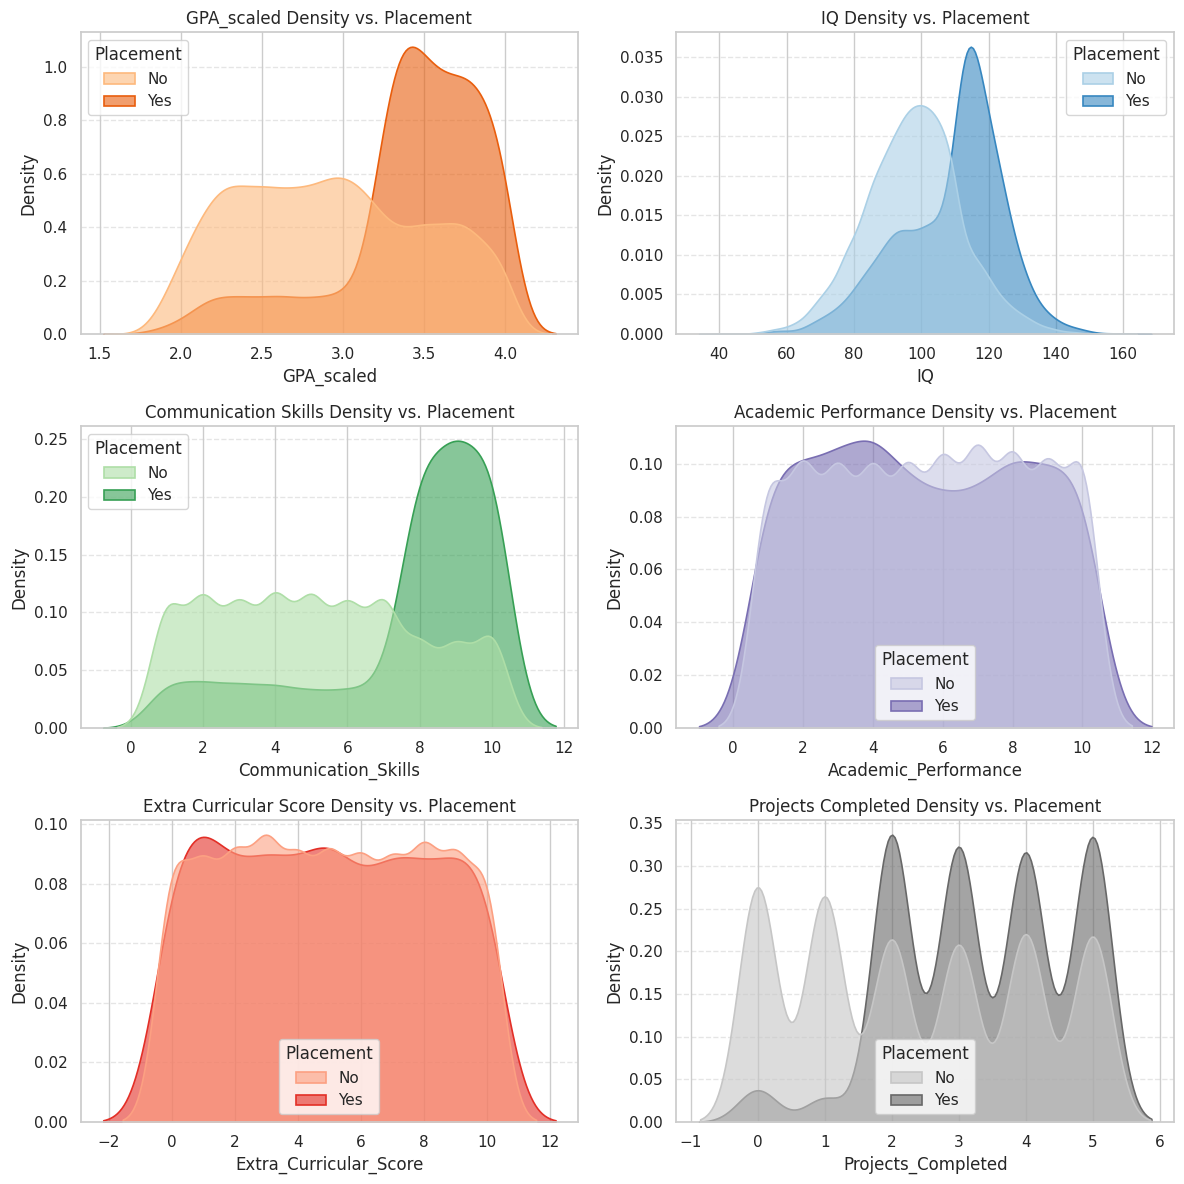

In [ ]:
# Density Plot เปรียบเทียบ Numerical Variables ระหว่าง Placement
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()


plots = [
    ('GPA_scaled', 'GPA_scaled Density vs. Placement', 'Oranges'),
    ('IQ', 'IQ Density vs. Placement', 'Blues'),
    ('Communication_Skills', 'Communication Skills Density vs. Placement', 'Greens'),
    ('Academic_Performance', 'Academic Performance Density vs. Placement', 'Purples'),
    ('Extra_Curricular_Score', 'Extra Curricular Score Density vs. Placement', 'Reds'),
    ('Projects_Completed', 'Projects Completed Density vs. Placement', 'Greys')
]

for ax, (col, title, palette) in zip(axes, plots):
    sns.kdeplot(
        data=df,
        x=col,
        hue="Placement",
        fill=True,
        common_norm=False,
        palette=palette,
        alpha=0.6,
        linewidth=1.2,
        ax=ax
    )
    ax.set_title(title, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**สรุปจาก Density Plot (Numerical Columns vs Placement)**

กราฟ Density Plot นี้แสดงการกระจายตัวของความหนาแน่นของข้อมูลสำหรับตัวแปรเชิงตัวเลขต่างๆ โดยเปรียบเทียบระหว่างกลุ่มนักศึกษาที่ได้งาน (Placed) และไม่ได้งาน (Not Placed)

**ข้อสังเกตที่สำคัญ:**

* **GPA_scaled:** กราฟความหนาแน่นของกลุ่มที่ได้งาน (Placed) จะมีการกระจายตัวที่ยอดสูงกว่าและค่อนไปทางค่า GPA_scaled ที่สูงกว่าอย่างชัดเจน เมื่อเทียบกับกลุ่มที่ไม่ได้งาน (Not Placed) ที่มีการกระจายตัวกว้างกว่าและยอดอยู่ทางซ้าย (ค่า GPA_scaled ต่ำกว่า)
* **IQ:** คล้ายคลึงกับ GPA_scaled กลุ่มที่ได้งานมีแนวโน้มที่จะมีความหนาแน่นของข้อมูลในบริเวณ IQ ที่สูงกว่ากลุ่มที่ไม่ได้งาน
* **Communication_Skills:** กลุ่มที่ได้งานแสดงความหนาแน่นของข้อมูลในบริเวณ Communication Skills ที่สูงกว่ากลุ่มที่ไม่ได้งานอย่างเห็นได้ชัด
* **Academic_Performance, Extra_Curricular_Score, Projects_Completed:** สำหรับตัวแปรเหล่านี้ กราฟความหนาแน่นของทั้งสองกลุ่ม (Placed และ Not Placed) มีการทับซ้อนกันค่อนข้างมาก ซึ่งบ่งชี้ว่าความแตกต่างระหว่างกลุ่มไม่ได้ชัดเจนเท่ากับ GPA_scaled, IQ, และ Communication_Skills

**ข้อสรุป:**

Density Plot ยืนยันว่า **GPA_scaled, IQ, และ Communication_Skills** เป็นตัวแปรเชิงตัวเลขที่มีการกระจายตัวที่แตกต่างกันอย่างมีนัยสำคัญระหว่างกลุ่มนักศึกษาที่ได้งานและไม่ได้งาน โดยนักศึกษาที่ได้งานมักจะมีค่าในตัวแปรเหล่านี้สูงกว่า ซึ่งสนับสนุนข้อค้นพบจากการวิเคราะห์อื่นๆ ที่บ่งชี้ว่าปัจจัยเหล่านี้มีความสำคัญต่อโอกาสในการได้งาน

**Insight จาก Density Plot: Numerical Columns vs Placement**

**ภาพรวม:**  
กราฟ Density Plot แสดงการกระจายตัวของตัวแปรเชิงตัวเลข โดยเปรียบเทียบระหว่างนักศึกษาที่ **ได้งาน (Placed)** และ **ไม่ได้งาน (Not Placed)**  

**ข้อสรุป:**  
- **GPA_scaled, IQ, และ Communication_Skills** เป็นตัวแปรเชิงตัวเลขที่มีความแตกต่างระหว่างกลุ่มนักศึกษาที่ได้งานและไม่ได้งานอย่างชัดเจน  
- นักศึกษาที่ได้งานมักมีค่าในตัวแปรเหล่านี้สูงกว่า  
- Insight นี้สนับสนุนการใช้ตัวแปรเหล่านี้เป็น Features สำคัญสำหรับการสร้างโมเดลคาดการณ์การได้งาน


#### Box Plot : numerical columns กับ Placement

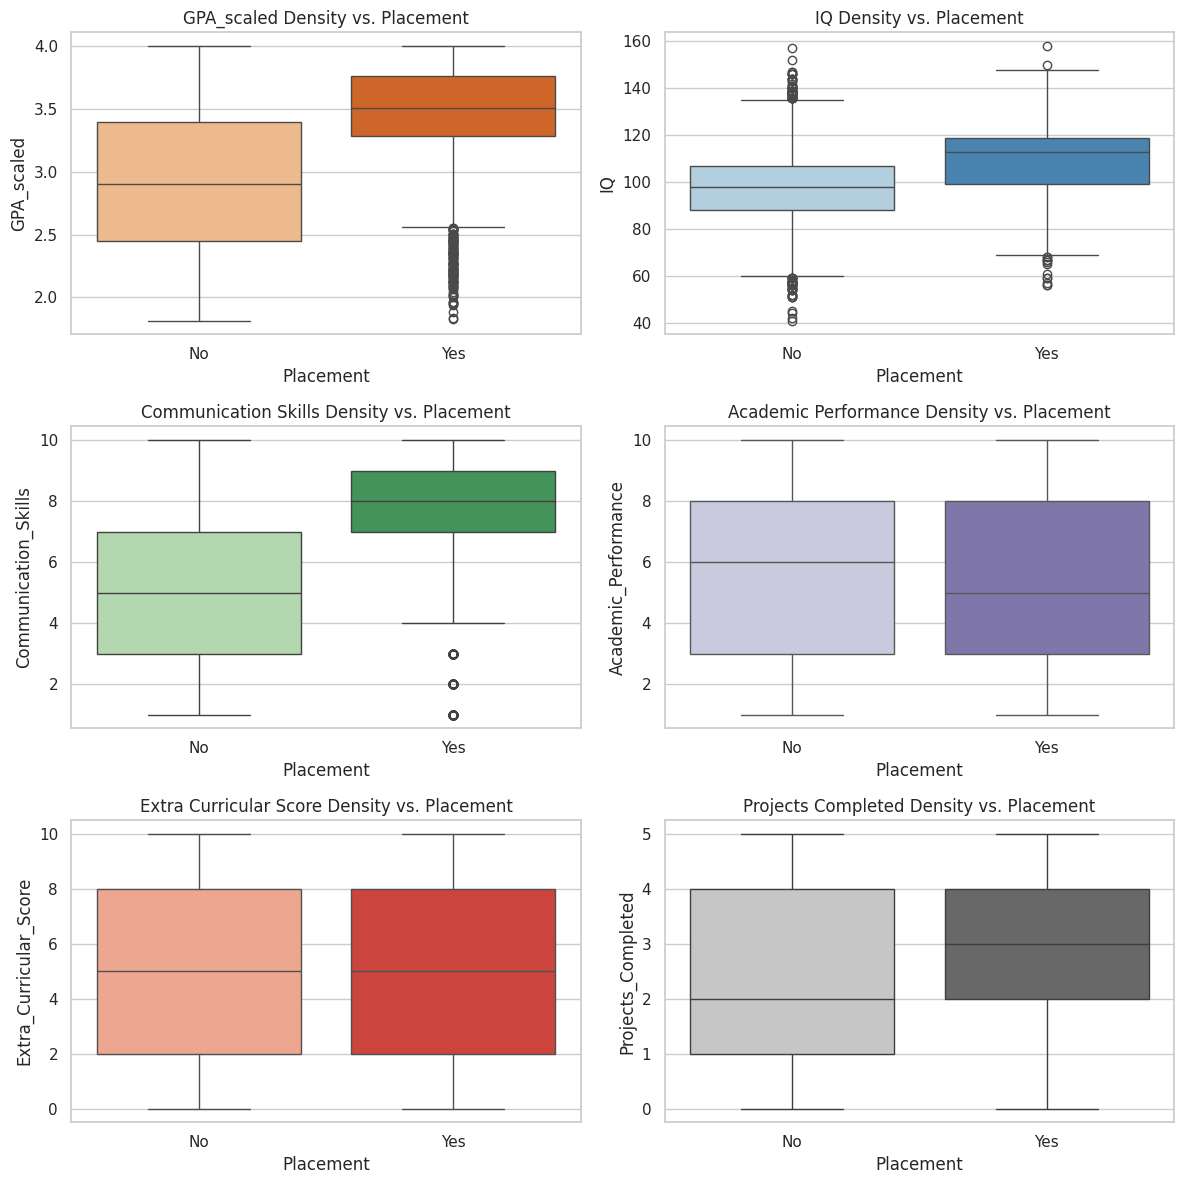

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, (col, title, palette) in zip(axes, plots):
    sns.boxplot(ax=ax, data=df, x='Placement', y=col, palette=palette)
    ax.set_title(title)

plt.tight_layout()
plt.show()

**สรุปจาก Box Plot (GPA_scaled, IQ, Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed เทียบกับ Placement)**

กราฟ Box Plot นี้แสดงการกระจายตัวของข้อมูลสำหรับแต่ละตัวแปร (GPA_scaled, IQ, Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed) โดยเปรียบเทียบระหว่างกลุ่มนักศึกษาที่ได้งาน (Placed) และไม่ได้งาน (Not Placed)

**ข้อสังเกตที่สำคัญ:**

* **GPA_scaled:** Box Plot ของกลุ่มที่ได้งานจะอยู่สูงกว่ากลุ่มที่ไม่ได้งานอย่างชัดเจน แสดงให้เห็นว่านักศึกษาที่ได้งานมี GPA เฉลี่ยและค่ามัธยฐานสูงกว่า รวมถึงมีการกระจายตัวของเกรดที่ดีกว่า
* **IQ:** คล้ายกับ GPA_scaled Box Plot ของกลุ่มที่ได้งานมีแนวโน้มที่จะอยู่ในช่วง IQ ที่สูงกว่ากลุ่มที่ไม่ได้งาน
* **Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed:** สำหรับตัวแปรเหล่านี้ Box Plot แสดงให้เห็นความแตกต่างระหว่างกลุ่มที่ได้งานและไม่ได้งาน แต่ไม่ได้ชัดเจนเท่า GPA_scaled และ IQ อย่างไรก็ตาม ยังคงเห็นแนวโน้มว่ากลุ่มที่ได้งานจะมีค่ามัธยฐานสูงกว่าเล็กน้อยในบางตัวแปร เช่น Communication_Skills

**ข้อสรุป:**

กราฟ Box Plot ยืนยันว่า **GPA_scaled** และ **IQ** เป็นปัจจัยที่มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มนักศึกษาที่ได้งานและไม่ได้งาน โดยนักศึกษาที่มี GPA และ IQ สูง มีแนวโน้มที่จะได้งานมากกว่า

**Insight จาก Box Plot: Numerical Variables vs Placement**

จาก Box Plot ของตัวแปรเชิงตัวเลขเทียบกับ `Placement` พบว่า:

- **GPA_scaled:** นักศึกษาที่ได้งานมีค่าเฉลี่ยและค่ามัธยฐานสูงกว่ากลุ่มไม่ได้งานอย่างชัดเจน แสดงให้เห็นว่า GPA มีผลสำคัญต่อโอกาสในการได้งาน
- **IQ:** Box Plot ของกลุ่มที่ได้งานอยู่สูงกว่ากลุ่มไม่ได้งาน แสดงแนวโน้มว่านักศึกษาที่ IQ สูงมีโอกาสได้งานมากขึ้น
- **Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed:** ความแตกต่างระหว่างกลุ่ม Placed และ Not Placed มีน้อยกว่า แต่ยังสังเกตแนวโน้มที่นักศึกษาที่ได้งานมักมีค่ามัธยฐานสูงกว่าเล็กน้อย โดยเฉพาะ **Communication_Skills**

**สรุป:** Box Plot ยืนยันว่า **GPA_scaled** และ **IQ** เป็นปัจจัยหลักที่ส่งผลต่อการได้งาน ส่วนตัวแปรอื่นมีผลน้อยกว่า แต่บางตัว เช่น **Communication_Skills** ยังสามารถสะท้อนแนวโน้มเชิงบวกได้


#### Violin Plot : numerical columns กับ Placement

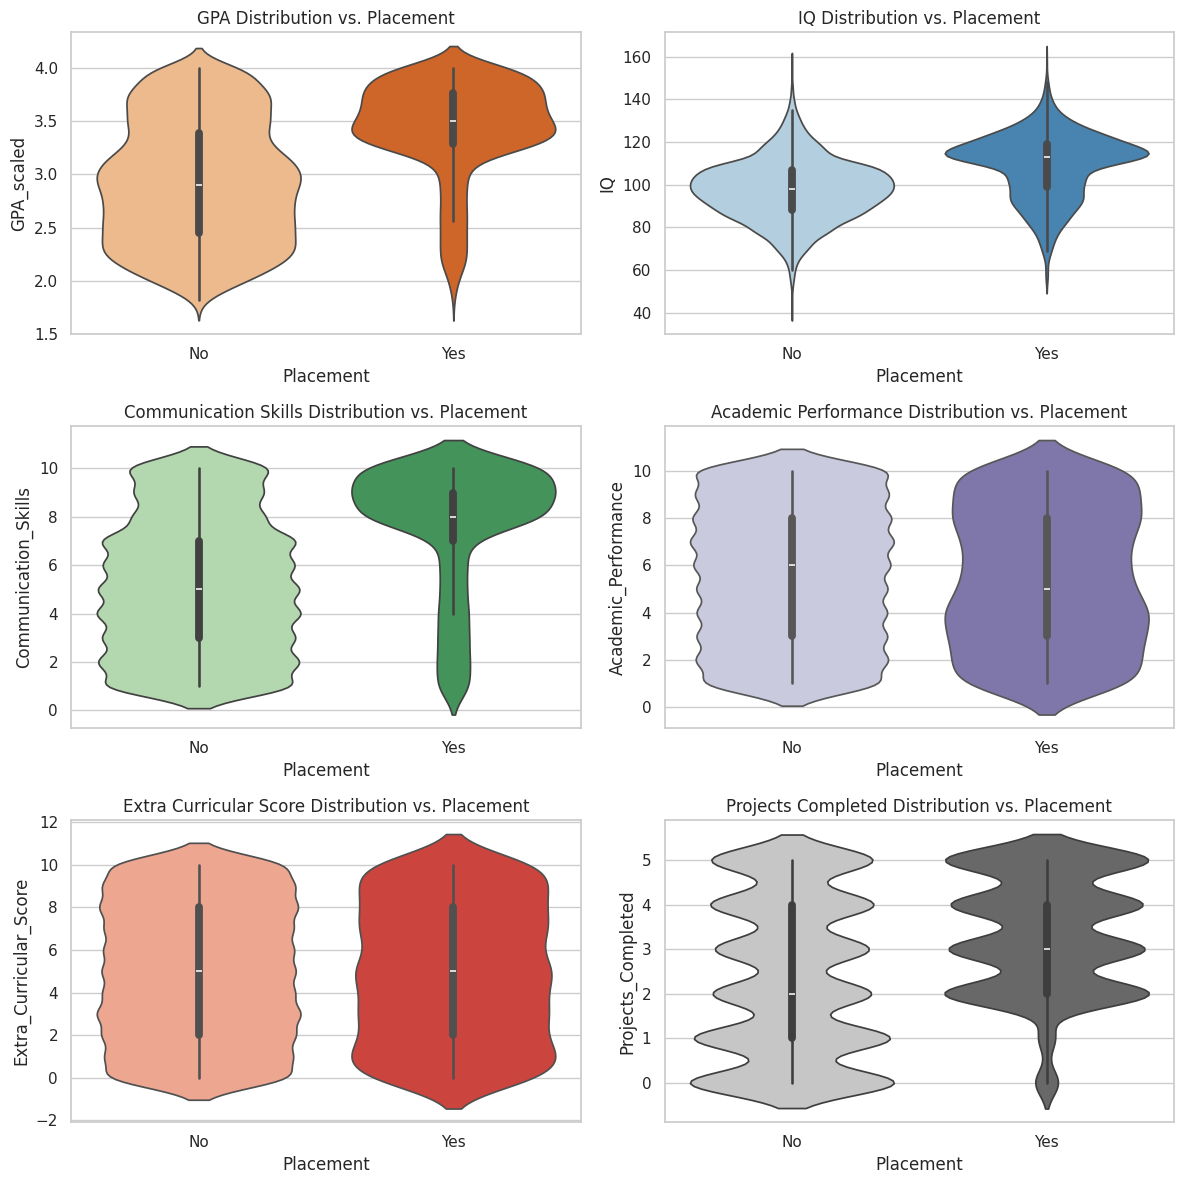

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

plots = [
    ('GPA_scaled', 'GPA Distribution vs. Placement', 'Oranges'),
    ('IQ', 'IQ Distribution vs. Placement', 'Blues'),
    ('Communication_Skills', 'Communication Skills Distribution vs. Placement', 'Greens'),
    ('Academic_Performance', 'Academic Performance Distribution vs. Placement', 'Purples'),
    ('Extra_Curricular_Score', 'Extra Curricular Score Distribution vs. Placement', 'Reds'),
    ('Projects_Completed', 'Projects Completed Distribution vs. Placement', 'Greys')
]

for ax, (col, title, palette) in zip(axes, plots):
    sns.violinplot(ax=ax, data=df, x='Placement', y=col, palette=palette)
    ax.set_title(title)

plt.tight_layout()
plt.show()

**สรุปจาก Violin Plot (GPA_scaled, IQ, Communication_Skills, Projects_Completed เทียบกับ Placement)**

กราฟ Violin Plot ช่วยให้เราเห็นภาพรวมของการกระจายตัวของข้อมูลสำหรับแต่ละตัวแปร (GPA_scaled, IQ, Communication_Skills, Projects_Completed) และเปรียบเทียบการกระจายตัวนี้ระหว่างกลุ่มนักศึกษาที่ได้งาน (Placed) และไม่ได้งาน (Not Placed)

**ข้อสังเกตที่สำคัญ:**

* **GPA_scaled:** กลุ่มนักศึกษาที่ได้งาน (Placed) มีการกระจายตัวของ GPA_scaled ที่ค่อนข้างสูงกว่ากลุ่มที่ไม่ได้งานอย่างชัดเจน โดยส่วนใหญ่ของกลุ่มที่ได้งานจะกระจุกตัวอยู่ที่ GPA_scaled สูงๆ (ประมาณ 3.5 ขึ้นไป) ในขณะที่กลุ่มที่ไม่ได้งานมีการกระจายตัวที่กว้างกว่าและมีค่าเฉลี่ยต่ำกว่า
* **IQ:** คล้ายคลึงกับ GPA_scaled กลุ่มที่ได้งานมีแนวโน้มที่จะมีค่า IQ สูงกว่ากลุ่มที่ไม่ได้งาน แม้ว่าการกระจายตัวของทั้งสองกลุ่มจะค่อนข้างกว้าง แต่ "violin" ของกลุ่มที่ได้งานจะหนาแน่นกว่าในช่วง IQ ที่สูงกว่า
* **Communication_Skills:** กราฟแสดงให้เห็นว่านักศึกษาที่ได้งานมีคะแนน Communication_Skills สูงกว่าอย่างเห็นได้ชัด การกระจายตัวของกลุ่มที่ได้งานจะไปทางขวา (คะแนนสูง) มากกว่ากลุ่มที่ไม่ได้งาน
* **Projects_Completed:** แม้จะมีความแตกต่างเล็กน้อย แต่ดูเหมือนว่าจำนวน Projects_Completed ไม่ได้แสดงความแตกต่างที่ชัดเจนระหว่างกลุ่มที่ได้งานและไม่ได้งาน การกระจายตัวของทั้งสองกลุ่มค่อนข้างคล้ายคลึงกัน

**ข้อสรุป:**

จากกราฟ Violin Plot ยืนยันว่า **GPA_scaled, IQ และ Communication_Skills** เป็นปัจจัยสำคัญที่มีความสัมพันธ์กับการได้งาน นักศึกษาที่มีคะแนนในสามด้านนี้สูง มีแนวโน้มที่จะได้รับโอกาสในการจ้างงานมากกว่า ในทางกลับกัน **Projects_Completed** ดูเหมือนจะไม่ได้เป็นปัจจัยที่มีความแตกต่างอย่างมีนัยสำคัญระหว่างสองกลุ่มในชุดข้อมูลนี้

**Insight จาก Violin Plot: Numerical Variables vs Placement**

จาก Violin Plot ของตัวแปรเชิงตัวเลขเทียบกับ `Placement` พบว่า:

- **GPA_scaled:** กลุ่มนักศึกษาที่ได้งาน (Placed) มีการกระจายตัวสูงกว่า และค่ากลางอยู่ที่ GPA สูง (≈3.5 ขึ้นไป) ขณะที่กลุ่มไม่ได้งานกระจายกว้างและมีค่าเฉลี่ยต่ำกว่า
- **IQ:** นักศึกษาที่ได้งานมีแนวโน้ม IQ สูงกว่า แม้การกระจายตัวจะกว้าง แต่ density ของกลุ่ม Placed หนาแน่นกว่าในช่วงสูง
- **Communication_Skills:** กลุ่ม Placed มีคะแนนสูงกว่าอย่างชัดเจน การกระจายตัวชี้ให้เห็นความแตกต่างระหว่างกลุ่ม
- **Projects_Completed:** ไม่พบความแตกต่างที่ชัดเจนระหว่างกลุ่ม Placed และ Not Placed

**สรุป:** Violin Plot ยืนยันว่า **GPA_scaled, IQ และ Communication_Skills** เป็นตัวแปรสำคัญที่เกี่ยวข้องกับการได้งาน ส่วน **Projects_Completed** ไม่มีความแตกต่างเชิงนัยสำคัญระหว่างกลุ่มนักศึกษา


#### วิเคราะห์สัดส่วนการได้งานจากการมี Internship Experience

In [ ]:
# คำนวณสัดส่วน
summary_percent_row = pd.crosstab(df['Internship_Experience'], df['Placement'], normalize='index') * 100

# เปลี่ยนชื่อ index และ columns
summary_percent_row.index = ['Internship_Experience (No)', 'Internship_Experience (Yes)']
summary_percent_row.columns = ['Not Placed', 'Placed']

# ทำให้เป็น string + format %
summary_display = summary_percent_row.round(2).astype(str) + '%'

# แสดงด้วย tabulate
print("สัดส่วนการได้งาน (คิดเป็น % ในแต่ละกลุ่มประสบการณ์)")
summary_display


สัดส่วนการได้งาน (คิดเป็น % ในแต่ละกลุ่มประสบการณ์)


Not Placed  Placed
Internship_Experience (No)      83.23%  16.77%
Internship_Experience (Yes)     83.68%  16.32%

**สรุปจาก วิเคราะห์สัดส่วนการได้งานจากการมี Internship Experience**

ตารางนี้แสดงสัดส่วนการได้งาน (**Placed**) และไม่ได้งาน (**Not Placed**) คิดเป็นเปอร์เซ็นต์ภายในแต่ละกลุ่มประสบการณ์ฝึกงาน (**Internship_Experience**):

*   **กลุ่มที่ไม่มีประสบการณ์ฝึกงาน (Internship_Experience (No))**: มีนักศึกษาที่ไม่ได้งาน 83.23% และได้งาน 16.77%
*   **กลุ่มที่มีประสบการณ์ฝึกงาน (Internship_Experience (Yes))**: มีนักศึกษาที่ไม่ได้งาน 83.68% และได้งาน 16.32%

**ข้อสรุป:**

ผลลัพธ์นี้แสดงให้เห็นว่า สัดส่วนการได้งานระหว่างกลุ่มที่มีประสบการณ์ฝึกงานและไม่มีประสบการณ์ฝึกงาน **ไม่ได้แตกต่างกันอย่างมีนัยสำคัญ** (ประมาณ 16% เท่ากันทั้งสองกลุ่ม) ซึ่งขัดแย้งกับการวิเคราะห์ในตารางก่อนหน้านี้ที่คิดเปอร์เซ็นต์จากจำนวนนักศึกษาทั้งหมด นี่เป็นข้อมูลที่น่าสนใจและอาจต้องพิจารณาเพิ่มเติมว่าปัจจัยอื่นๆ มีผลต่อการได้งานมากกว่าประสบการณ์ฝึกงานหรือไม่ หรือการคำนวณเปอร์เซ็นต์ด้วยวิธีที่แตกต่างกันให้มุมมองที่ต่างกัน

**Insight จาก วิเคราะห์สัดส่วนการได้งานจากการมี Internship Experience**

ผลลัพธ์นี้เป็น หลักฐานที่ชัดเจนและหนักแน่นที่สุด ที่สนับสนุนข้อสรุปก่อนหน้านี้ของเราที่ว่า "ชุดข้อมูลนี้น่าจะเป็นข้อมูลสังเคราะห์ (Synthetic Data)"

* ขาดตรรกะของโลกแห่งความจริง: ในโลกแห่งความเป็นจริง ประสบการณ์ฝึกงานเป็นหนึ่งในปัจจัยบวกที่สำคัญที่สุดต่อการได้งาน เพราะมันหมายถึงประสบการณ์ตรง, คอนเนคชัน, และโอกาสในการถูกจ้างงานต่อ การที่ข้อมูลแสดงผลว่าการฝึกงานไม่มีผล (หรือมีผลลบนิดๆ) นั้น เป็นเรื่องที่ผิดธรรมชาติอย่างมาก

* ความเป็นอิสระของตัวแปร: ผลลัพธ์นี้บ่งชี้ว่า ตอนที่ข้อมูลนี้ถูกสร้างขึ้นมา ตัวแปร Internship_Experience และตัวแปร Placement น่าจะถูกสุ่มค่าขึ้นมาอย่างเป็นอิสระต่อกัน โดยไม่ได้มีการสร้างความสัมพันธ์เชิงเหตุผลระหว่างกันไว้เลย

* ปัจจัยอื่นสำคัญกว่า (ในข้อมูลชุดนี้): จากการวิเคราะห์ก่อนหน้านี้ เราเห็นว่าปัจจัยอย่าง GPA_scaled และ IQ ยังคงแสดงความสัมพันธ์ที่ชัดเจนต่อการได้งาน ซึ่งหมายความว่าผู้สร้างข้อมูลชุดนี้ได้ "ตั้งใจ" ให้ปัจจัยเหล่านั้นมีความสำคัญ แต่ "ไม่ได้ตั้งใจ" ให้ประสบการณ์ฝึกงานมีความสำคัญนั่นเอง

#### วิเคราะห์ College_ID กับ Placement

=== College Placement  ===
╒══════════════╤══════════════╤══════════╤═════════╤═══════════════╕
│ College_ID   │   Not Placed │   Placed │   Total │   Placement_% │
╞══════════════╪══════════════╪══════════╪═════════╪═══════════════╡
│ CLG0001      │           98 │       11 │     109 │         10.09 │
├──────────────┼──────────────┼──────────┼─────────┼───────────────┤
│ CLG0002      │           74 │       12 │      86 │         13.95 │
├──────────────┼──────────────┼──────────┼─────────┼───────────────┤
│ CLG0003      │           80 │       17 │      97 │         17.53 │
├──────────────┼──────────────┼──────────┼─────────┼───────────────┤
│ CLG0004      │           78 │       13 │      91 │         14.29 │
├──────────────┼──────────────┼──────────┼─────────┼───────────────┤
│ CLG0005      │           95 │       17 │     112 │         15.18 │
├──────────────┼──────────────┼──────────┼─────────┼───────────────┤
│ CLG0006      │           74 │        9 │      83 │         10.84 │
├──────

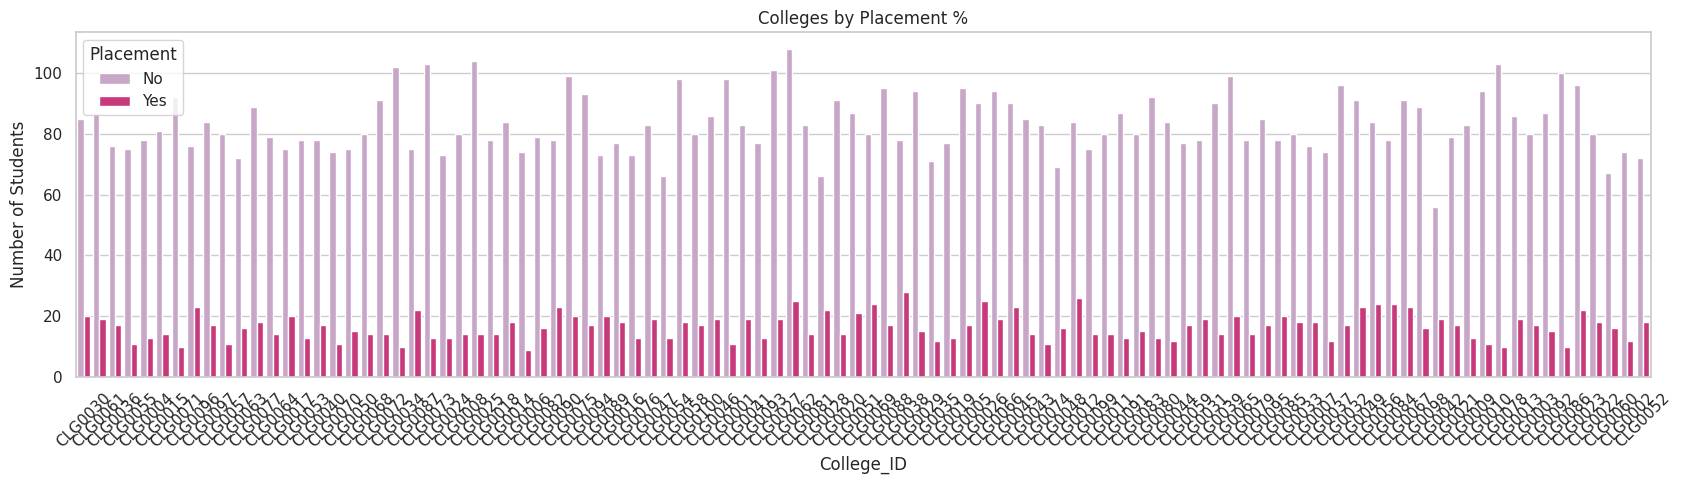

In [ ]:
def plot_college_placement(df, top_n=10):
    # 1. Crosstab: Count และ % Placement
    college_counts = pd.crosstab(df['College_ID'], df['Placement'])
    college_counts.columns = ['Not Placed', 'Placed']
    college_counts['Total'] = college_counts['Not Placed'] + college_counts['Placed']
    college_counts['Placement_%'] = (college_counts['Placed'] / college_counts['Total'] * 100).round(2)

    # แสดงตาราง 10 แถวแรก
    print("=== College Placement  ===")
    print(tabulate(college_counts.reset_index(), headers='keys', tablefmt='fancy_grid', showindex=False))

    # 2. Countplot ของ Top N Colleges
    top_colleges = college_counts.sort_values(by='Placement_%', ascending=False).index
    df_top = df[df['College_ID'].isin(top_colleges)]

    plt.figure(figsize=(17,5))
    sns.countplot(data=df_top, x='College_ID', hue='Placement', palette='PuRd')
    plt.xticks(rotation=45)
    plt.title(f'Colleges by Placement %')
    plt.xlabel('College_ID')
    plt.ylabel('Number of Students')
    plt.tight_layout()
    plt.show()

    return college_counts

college_stats = plot_college_placement(df, top_n=10)

**สรุปจาก วิเคราะห์ College_ID กับ Placement**

โค้ดในเซลล์นี้วิเคราะห์ความสัมพันธ์ระหว่าง `College_ID` (วิทยาลัย) และ `Placement` (สถานะการได้งาน) โดยมีขั้นตอนดังนี้:

1.  **Crosstab และคำนวณเปอร์เซ็นต์:**
    *   สร้างตารางสรุป `college_counts` ที่แสดงจำนวนนักศึกษาที่ได้งาน (Placed) และไม่ได้งาน (Not Placed) ในแต่ละวิทยาลัย (`College_ID`)
    *   เพิ่มคอลัมน์ `Total` (จำนวนนักศึกษาทั้งหมดในแต่ละวิทยาลัย) และ `Placement_%` (เปอร์เซ็นต์ของนักศึกษาที่ได้งานในแต่ละวิทยาลัย)

2.  **Bar Chart ของ Colleges ตาม Placement %:**
    *   จัดเรียงวิทยาลัยตามเปอร์เซ็นต์การได้งานจากมากไปน้อย
    *   สร้าง Bar Plot เพื่อแสดงจำนวนนักศึกษาที่ได้งานและไม่ได้งานในวิทยาลัยทั้งหมด โดยเรียงตามเปอร์เซ็นต์การได้งาน

**ข้อสังเกตที่สำคัญจากตารางและกราฟ:**

*   **ความแตกต่างของอัตราการได้งาน:** ตารางและกราฟแสดงให้เห็นอย่างชัดเจนว่าเปอร์เซ็นต์การได้งานแตกต่างกันไปในแต่ละวิทยาลัย มีบางวิทยาลัยที่มีอัตราการได้งานสูงกว่าวิทยาลัยอื่นๆ อย่างมีนัยสำคัญ
*   **จำนวนนักศึกษาต่อวิทยาลัย:** จำนวนนักศึกษาในแต่ละวิทยาลัยในชุดข้อมูลก็แตกต่างกันไป ซึ่งอาจส่งผลต่อความน่าเชื่อถือของเปอร์เซ็นต์การได้งานในวิทยาลัยที่มีจำนวนนักศึกษาน้อย

**ข้อสรุป:**

การวิเคราะห์นี้ยืนยันว่า **วิทยาลัยที่นักศึกษาอยู่มีความสัมพันธ์กับการได้งาน** โดยบางวิทยาลัยมีแนวโน้มที่นักศึกษาจะได้รับการจ้างงานมากกว่า อย่างไรก็ตาม ควรพิจารณาปัจจัยอื่นๆ ที่อาจส่งผลต่ออัตราการได้งานของแต่ละวิทยาลัยด้วย เช่น คุณภาพของนักศึกษาเฉลี่ยในวิทยาลัยนั้นๆ หรือความเชื่อมโยงกับภาคอุตสาหกรรม

**Insight จากการวิเคราะห์ College_ID vs Placement**

จากการสร้าง Crosstab และ Bar Plot ของ `College_ID` เปรียบเทียบกับ `Placement` พบว่า:

- **ความแตกต่างของอัตราการได้งาน:** แต่ละวิทยาลัยมีเปอร์เซ็นต์การได้งานแตกต่างกันอย่างชัดเจน บางวิทยาลัยมีแนวโน้มให้นักศึกษาได้งานสูงกว่าวิทยาลัยอื่น
- **จำนวนนักศึกษาต่อวิทยาลัย:** จำนวนนักศึกษาไม่เท่ากันในแต่ละวิทยาลัย ทำให้เปอร์เซ็นต์การได้งานในวิทยาลัยที่มีนักศึกษาน้อยอาจไม่น่าเชื่อถือเท่ากับวิทยาลัยที่มีนักศึกษามาก
- **ข้อสังเกตเพิ่มเติม:** การได้งานอาจขึ้นอยู่กับปัจจัยอื่นร่วมด้วย เช่น คุณภาพเฉลี่ยของนักศึกษาในวิทยาลัย หรือความเชื่อมโยงกับภาคอุตสาหกรรม

**สรุป:** วิทยาลัยที่นักศึกษาอยู่มีผลต่อโอกาสในการได้งาน แสดงให้เห็นว่า **College_ID** เป็นตัวแปรปัจจัยหนึ่งที่ควรพิจารณาในการวิเคราะห์หรือสร้างโมเดล **แต่ควรระวังเรื่องจำนวนตัวอย่างที่ไม่เท่ากันในแต่ละวิทยาลัย**


### การวิเคราะห์หลายตัวแปร (Multivariate Analysis)


#### Pairplot : วิเคราะห์การกระจายตัวและความสัมพันธ์ระหว่าง numerical columns เปรียบเทียบระหว่างกลุ่ม Placement

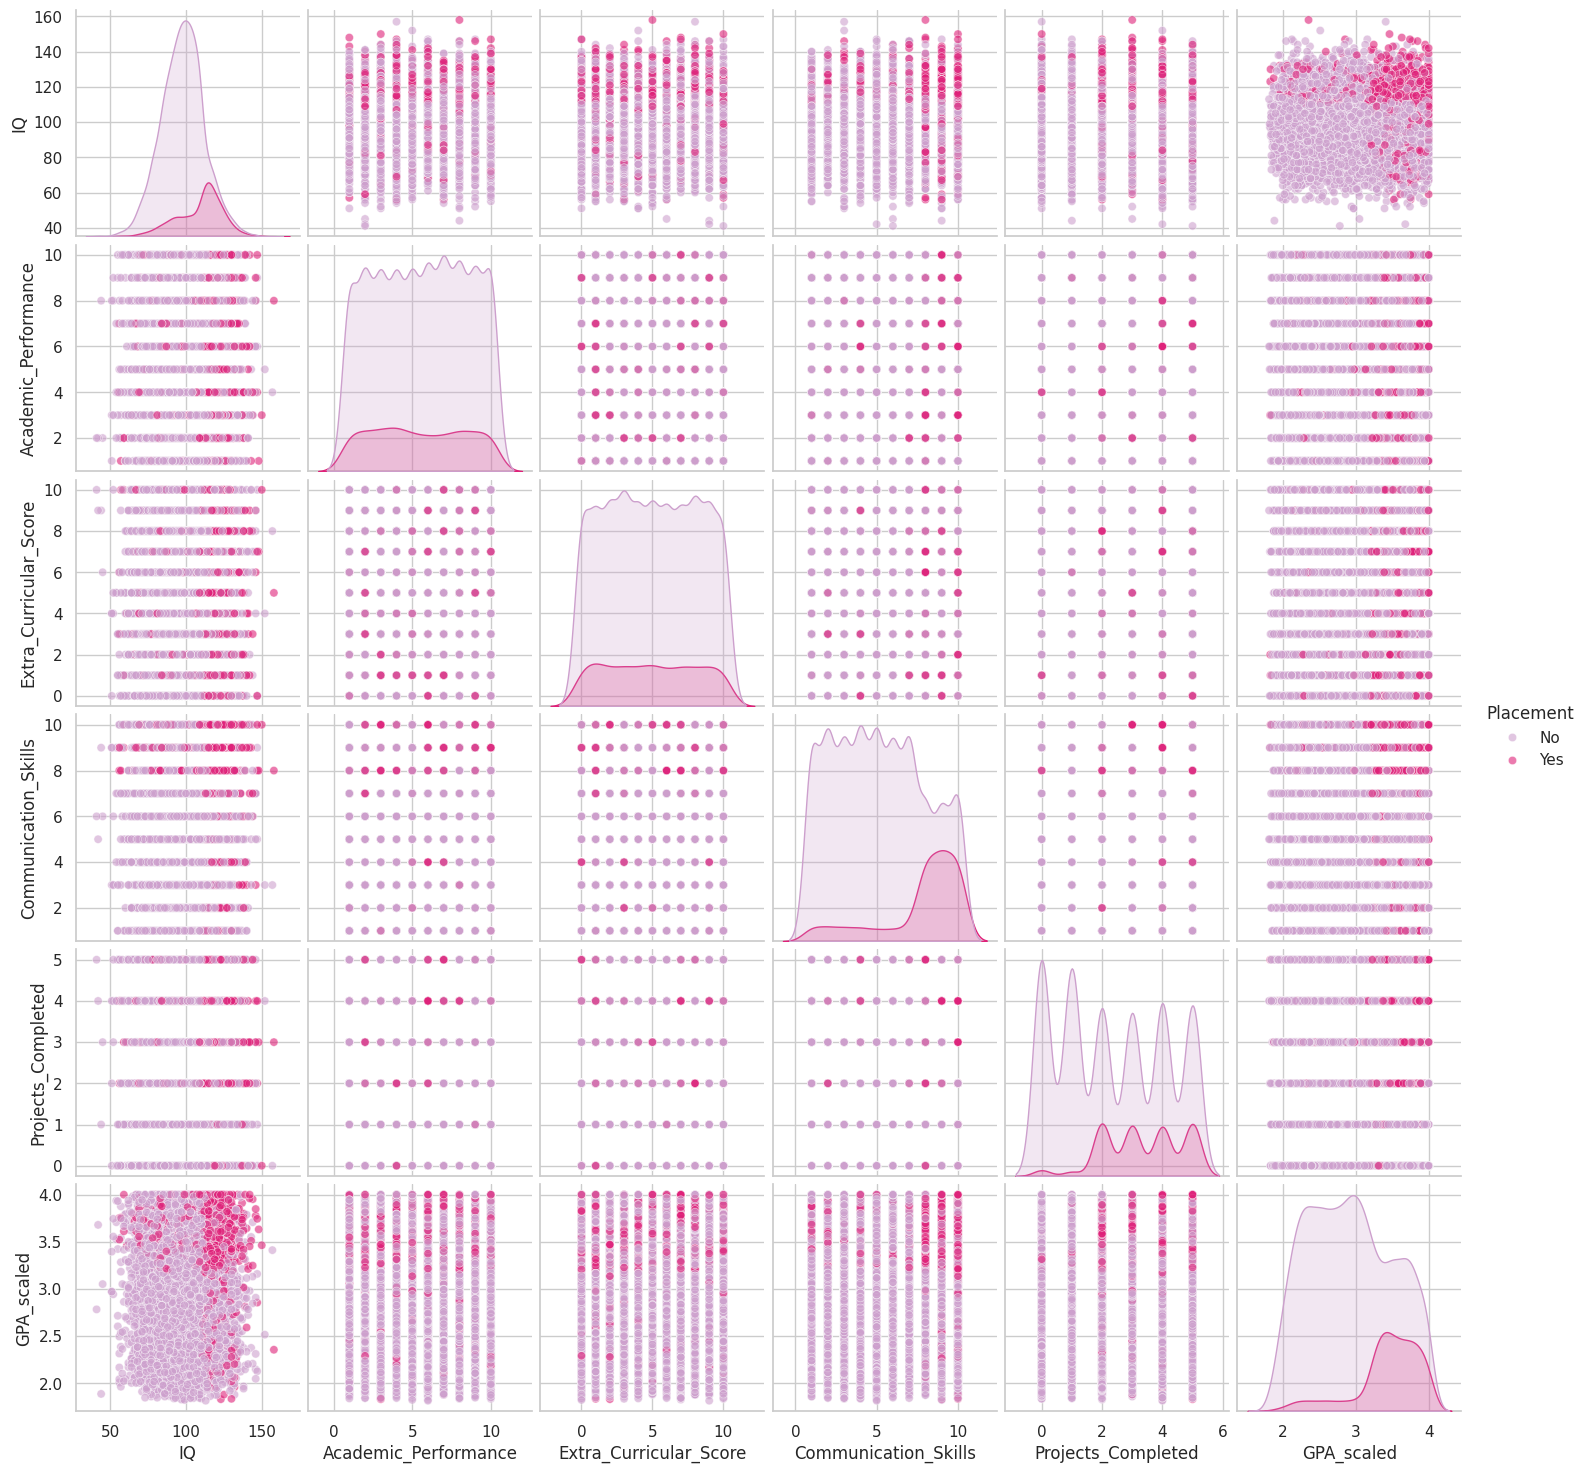

In [ ]:
numerical_cols = ['IQ', 'Academic_Performance', 'Extra_Curricular_Score',
                  'Communication_Skills', 'Projects_Completed', 'GPA_scaled']

# สร้าง pairplot
sns.pairplot(
    df[numerical_cols + ['Placement']],  # เพิ่มตัวแปร categorical สำหรับ hue
    hue='Placement',                     # แยกสีตาม Placed/Not Placed
    diag_kind='kde',                     # ใช้ KDE บน diagonal
    palette='PuRd',                      # สีสวยๆ
    plot_kws={'alpha':0.6}               # ความโปร่งใสของ scatter
)

plt.show()



**สรุปจาก Pairplot (Numerical Columns vs Placement)**

Pairplot นี้แสดงการกระจายตัวและความสัมพันธ์ระหว่างตัวแปรเชิงตัวเลขทั้งหมดในชุดข้อมูล โดยแยกสีตามสถานะการได้งาน (Placement) เพื่อให้เห็นความแตกต่างระหว่างกลุ่มนักศึกษาที่ได้งานและไม่ได้งาน

**ข้อสังเกตที่สำคัญ:**

* **การกระจายตัวรายตัวแปร (Diagonal Plots - KDE):** กราฟ Kernel Density Estimate (KDE) บนแนวทแยงมุมแสดงการกระจายตัวของแต่ละตัวแปรเชิงตัวเลข การแยกสีตาม Placement ช่วยให้เห็นว่ากลุ่มนักศึกษาที่ได้งาน (สีส้ม) มักจะมีการกระจายตัวที่ค่อนไปทางค่าสูงในตัวแปร `GPA_scaled`, `IQ`, และ `Communication_Skills` อย่างชัดเจน ในขณะที่ตัวแปรอื่นๆ เช่น `Academic_Performance`, `Extra_Curricular_Score`, และ `Projects_Completed` มีการกระจายตัวที่ทับซ้อนกันระหว่างสองกลุ่มมากกว่า

* **ความสัมพันธ์ระหว่างตัวแปร (Off-Diagonal Scatter Plots):** กราฟ Scatter Plot แสดงความสัมพันธ์ระหว่างแต่ละคู่ของตัวแปรเชิงตัวเลข จุดสีช่วยให้เห็นว่ากลุ่มนักศึกษาที่ได้งาน (สีส้ม) มักจะกระจุกตัวอยู่ในบริเวณที่มีค่า `GPA_scaled`, `IQ`, และ `Communication_Skills` สูงเมื่อเทียบกับกลุ่มที่ไม่ได้งาน (สีฟ้า) ซึ่งมีการกระจายตัวที่กว้างกว่าและมีแนวโน้มไปทางค่าที่ต่ำกว่า

**ข้อสรุป:**

Pairplot ช่วยยืนยันข้อค้นพบจากการวิเคราะห์ก่อนหน้านี้ว่า **`GPA_scaled`, `IQ`, และ `Communication_Skills`** เป็นตัวแปรเชิงตัวเลขที่มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มนักศึกษาที่ได้งานและไม่ได้งาน นักศึกษาที่มีคุณสมบัติเหล่านี้ในระดับสูงมีโอกาสในการได้งานมากกว่า การกระจายตัวของสองกลุ่มค่อนข้างแยกออกจากกันในกราฟที่เกี่ยวข้องกับตัวแปรเหล่านี้ ซึ่งบ่งชี้ว่าปัจจัยเหล่านี้มีพลังในการทำนาย (Predictive Power) ที่ดีสำหรับสถานะการได้งาน

**Insight จาก Pairplot (Numerical Columns vs Placement)**

Pairplot แสดงการกระจายตัวและความสัมพันธ์ระหว่างตัวแปรเชิงตัวเลขทั้งหมด โดยแยกสีตามสถานะการได้งาน (Placement) เพื่อเปรียบเทียบระหว่างกลุ่มนักศึกษาที่ได้งานและไม่ได้งาน

**ข้อสรุป:**

Pairplot ยืนยันว่า **GPA_scaled, IQ และ Communication_Skills** เป็นตัวแปรที่แตกต่างอย่างมีนัยสำคัญระหว่างนักศึกษาที่ได้งานและไม่ได้งาน นักศึกษาที่มีคุณสมบัติในตัวแปรเหล่านี้สูง มีโอกาสได้งานมากกว่า และตัวแปรเหล่านี้มี **Predictive Power** สูงสำหรับการสร้างโมเดลทำนายสถานะการได้งาน


#### ค่าเฉลี่ย ของ numerical columns ตาม Placement

In [ ]:
# รายการตัวแปรเชิงตัวเลขที่สนใจ
numerical_cols = ['GPA_scaled', 'IQ', 'Communication_Skills', 'Academic_Performance', 'Extra_Curricular_Score', 'Projects_Completed']

# ลูปคำนวณค่าเฉลี่ยตาม Placement
for col in numerical_cols:
    summary = df.groupby('Placement')[col].mean().reset_index()
    summary.columns = ['Placement', f'Average_{col}']
    print(f"\n=== ค่าเฉลี่ย {col} ตามสถานะการได้งาน ===")
    print(tabulate(summary, headers='keys', tablefmt='fancy_grid', showindex=False))



=== ค่าเฉลี่ย GPA_scaled ตามสถานะการได้งาน ===
╒═════════════╤══════════════════════╕
│ Placement   │   Average_GPA_scaled │
╞═════════════╪══════════════════════╡
│ No          │              2.92732 │
├─────────────┼──────────────────────┤
│ Yes         │              3.43366 │
╘═════════════╧══════════════════════╛

=== ค่าเฉลี่ย IQ ตามสถานะการได้งาน ===
╒═════════════╤══════════════╕
│ Placement   │   Average_IQ │
╞═════════════╪══════════════╡
│ No          │      97.5525 │
├─────────────┼──────────────┤
│ Yes         │     109.122  │
╘═════════════╧══════════════╛

=== ค่าเฉลี่ย Communication_Skills ตามสถานะการได้งาน ===
╒═════════════╤════════════════════════════════╕
│ Placement   │   Average_Communication_Skills │
╞═════════════╪════════════════════════════════╡
│ No          │                        5.14375 │
├─────────────┼────────────────────────────────┤
│ Yes         │                        7.66365 │
╘═════════════╧════════════════════════════════╛

=== ค่าเฉลี่ย Academ

**สรุปจาก ค่าเฉลี่ยตัวแปรเชิงตัวเลขตามสถานะการได้งาน**

โค้ดในเซลล์นี้คำนวณและแสดงค่าเฉลี่ยของตัวแปรเชิงตัวเลข (`GPA_scaled`, `IQ`, `Communication_Skills`, `Academic_Performance`, `Extra_Curricular_Score`, `Projects_Completed`) แยกตามสถานะการได้งาน (`Placement`) เพื่อดูว่ามีแนวโน้มความแตกต่างของค่าเฉลี่ยในแต่ละกลุ่มหรือไม่

**ข้อสังเกตที่สำคัญจากตารางค่าเฉลี่ย:**

*   **GPA_scaled, IQ และ Communication_Skills:** ค่าเฉลี่ยของตัวแปรเหล่านี้ในกลุ่มนักศึกษาที่ได้งาน (`Yes`) สูงกว่ากลุ่มที่ไม่ได้งาน (`No`) อย่างชัดเจน ซึ่งสอดคล้องกับการวิเคราะห์ด้วยกราฟก่อนหน้านี้ และบ่งชี้ว่าคุณสมบัติเหล่านี้มีความสัมพันธ์เชิงบวกกับการได้งาน
*   **Academic_Performance, Extra_Curricular_Score และ Projects_Completed:** ค่าเฉลี่ยของตัวแปรเหล่านี้ระหว่างกลุ่มที่ได้งานและไม่ได้งานไม่แตกต่างกันมากนัก ซึ่งบ่งชี้ว่าปัจจัยเหล่านี้อาจไม่ได้มีความสัมพันธ์เชิงเส้นตรงที่ชัดเจนกับการได้งานในชุดข้อมูลนี้

**ข้อสรุป:**

การคำนวณค่าเฉลี่ยตามสถานะการได้งานช่วยยืนยันว่า **GPA_scaled, IQ และ Communication_Skills** เป็นปัจจัยที่มีความแตกต่างทางสถิติระหว่างนักศึกษาที่ได้งานและไม่ได้งาน โดยกลุ่มที่ได้งานมีค่าเฉลี่ยของทั้งสามคุณสมบัตินี้สูงกว่า ซึ่งเป็นการสนับสนุนข้อค้นพบหลักจากการวิเคราะห์ EDA ก่อนหน้านี้

**Insight: ตัวเลขที่บอกว่าคนได้งานต่างจากไม่ได้งาน**

จากการคำนวณค่าเฉลี่ยตัวแปรเชิงตัวเลข แยกตามการได้งาน พบว่า:

- นักศึกษาที่ **ได้งาน** มีค่าเฉลี่ย **GPA_scaled, IQ, Communication_Skills** สูงกว่าอย่างชัดเจน  
  → แปลว่าคนเก่งด้านวิชาการและการสื่อสารมีโอกาสได้งานมากกว่า

- ส่วนตัวแปร **Academic_Performance, Extra_Curricular_Score, Projects_Completed**  
  ค่าเฉลี่ยไม่ต่างกันมากนัก  
  → แสดงว่าปัจจัยเหล่านี้อาจไม่ส่งผลชัดเจนต่อการได้งานในชุดข้อมูลนี้

**สรุปง่าย ๆ:**   GPA, IQ และทักษะการสื่อสารสำคัญต่อการได้งานมากกว่ากิจกรรมอื่น ๆ


#### scatter plot (IQ , GPA_scaled , Communication_Skills , Placement)

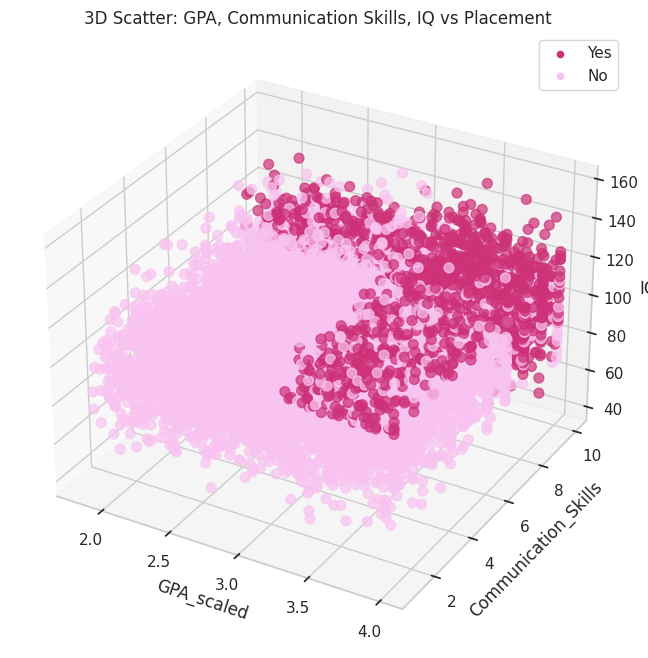

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

colors = {'Yes':'#CD3278', 'No':'#f9c3f0'}

# scatter plot ทั้งหมด
ax.scatter(
    df['GPA_scaled'],
    df['Communication_Skills'],
    df['IQ'],
    c=df['Placement'].map(colors),
    s=50, alpha=0.7
)

# สร้าง legend แบบ manual
for placement, color in colors.items():
    ax.scatter([], [], [], c=color, label=placement)  # จุดว่างใช้แค่ทำ legend

ax.set_xlabel('GPA_scaled')
ax.set_ylabel('Communication_Skills')
ax.set_zlabel('IQ')
plt.title('3D Scatter: GPA, Communication Skills, IQ vs Placement')
plt.legend()
plt.show()

**สรุปจาก 3D Scatter Plot (IQ, GPA_scaled, Communication_Skills, Placement)**

กราฟ 3D Scatter Plot นี้แสดงความสัมพันธ์ระหว่างสามตัวแปรเชิงตัวเลขหลักที่ส่งผลต่อการได้งาน (IQ, GPA_scaled, Communication_Skills) และแบ่งกลุ่มตามสถานะการได้งาน (Placement) ด้วยสี (สีแดงสำหรับ Placed, สีน้ำเงินสำหรับ Not Placed):

*   **ภาพรวม:** กราฟแสดงให้เห็นว่านักศึกษาที่ได้งาน (จุดสีแดง) มักจะกระจุกตัวอยู่ในบริเวณที่มีค่า IQ, GPA_scaled และ Communication_Skills สูงกว่าอย่างเห็นได้ชัด เมื่อเทียบกับนักศึกษาที่ไม่ได้งาน (จุดสีน้ำเงิน) ซึ่งมีการกระจายตัวที่กว้างกว่าและมีแนวโน้มไปทางค่าที่ต่ำกว่าในทั้งสามแกน

*   **ข้อสังเกต:**
    *   กลุ่มนักศึกษาที่ได้งานมีแนวโน้มที่จะมี "ปริมาตร" การกระจายตัวที่เล็กลงและอยู่ไปทางด้าน "มุมขวาบน" ของกราฟ 3D (หมายถึงค่าสูงในทุกแกน)
    *   ในทางกลับกัน กลุ่มนักศึกษาที่ไม่ได้งานมีการกระจายตัวที่ครอบคลุมพื้นที่ส่วนใหญ่ของกราฟ โดยเฉพาะบริเวณที่มีค่า IQ, GPA_scaled และ Communication_Skills ต่ำถึงปานกลาง

**ข้อสรุป:**

กราฟ 3D นี้ช่วยยืนยันและเสริมความเข้าใจจากกราฟ 2D และการวิเคราะห์ค่าเฉลี่ยก่อนหน้านี้ได้อย่างชัดเจนว่า **IQ, GPA_scaled และ Communication_Skills เป็นปัจจัยที่มีความสำคัญร่วมกันในการทำนายโอกาสในการได้งาน** การมีคะแนนสูงในทั้งสามด้านนี้จะเพิ่มโอกาสในการได้งานอย่างมาก และสามารถใช้เป็นตัวบ่งชี้ที่สำคัญในการสร้างโมเดลคาดการณ์ต่อไป

**Insight จาก 3D Scatter Plot (IQ, GPA_scaled, Communication_Skills, Placement)**

กราฟ 3D Scatter Plot นี้ให้ Insight ที่สำคัญเกี่ยวกับปัจจัยที่มีผลต่อการได้งาน:

*   **การรวมกันของปัจจัยสำคัญ:** กราฟแสดงให้เห็นอย่างชัดเจนว่านักศึกษาที่ได้งาน (จุดสีแดง) ไม่ได้มีคุณสมบัติใดคุณสมบัติหนึ่งสูงเพียงอย่างเดียว แต่มีแนวโน้มที่จะมีค่าสูงใน **ทั้ง GPA_scaled, Communication_Skills และ IQ** พร้อมๆ กัน นี่บ่งชี้ว่าการได้งานขึ้นอยู่กับการผสมผสานของปัจจัยเหล่านี้ ไม่ใช่แค่ปัจจัยใดปัจจัยหนึ่งเดี่ยวๆ

*   **การแยกกลุ่มที่ชัดเจน:** แม้ข้อมูลจะเป็นข้อมูลสังเคราะห์ แต่กราฟนี้แสดงให้เห็นว่ากลุ่มนักศึกษาที่ได้งานและไม่ได้งานมีการแยกกลุ่ม (Separation) ที่ค่อนข้างชัดเจนตามคุณสมบัติทั้งสามนี้ ซึ่งเป็นสัญญาณที่ดีสำหรับการสร้างโมเดล Machine Learning ในภายหลัง เพราะหมายความว่าโมเดลน่าจะสามารถเรียนรู้ขอบเขตที่ใช้แบ่งแยกระหว่างสองกลุ่มนี้ได้

*   **ความสำคัญเชิงปฏิบัติ:** Insight นี้มีความสำคัญเชิงปฏิบัติอย่างมาก สำหรับนักศึกษาที่ต้องการเพิ่มโอกาสในการได้งาน ควรให้ความสำคัญกับการพัฒนาทั้งด้านผลการเรียน (GPA), ความสามารถทางสติปัญญา (IQ - แม้จะปรับปรุงยากกว่า) และที่สำคัญคือทักษะการสื่อสาร (Communication_Skills) ซึ่งเป็นทักษะที่สามารถฝึกฝนและพัฒนาได้

**สรุป Insight:**

3D Scatter Plot ย้ำเตือนว่าการได้งานไม่ใช่เรื่องของปัจจัยเดียว แต่เป็นผลมาจากการทำงานร่วมกันของ GPA, Communication Skills และ IQ และแสดงให้เห็นว่าข้อมูลนี้มีคุณสมบัติที่เอื้อต่อการสร้างโมเดลคาดการณ์ที่ดี

#### Bar Chart : IQ / Communication_Skills / GPA_scaled ตาม Placement แยก College


=== Summary of IQ by College_ID and Placement ===
╒══════════════╤═════════════╤══════════╤══════════╤═════════╕
│ College_ID   │ Placement   │     mean │   median │   count │
╞══════════════╪═════════════╪══════════╪══════════╪═════════╡
│ CLG0001      │ No          │  97.0204 │     97.5 │      98 │
├──────────────┼─────────────┼──────────┼──────────┼─────────┤
│ CLG0001      │ Yes         │ 111.909  │    114   │      11 │
├──────────────┼─────────────┼──────────┼──────────┼─────────┤
│ CLG0002      │ No          │  99.5541 │     98.5 │      74 │
├──────────────┼─────────────┼──────────┼──────────┼─────────┤
│ CLG0002      │ Yes         │ 114.5    │    118   │      12 │
├──────────────┼─────────────┼──────────┼──────────┼─────────┤
│ CLG0003      │ No          │  99.475  │    100   │      80 │
├──────────────┼─────────────┼──────────┼──────────┼─────────┤
│ CLG0003      │ Yes         │ 107.059  │    113   │      17 │
├──────────────┼─────────────┼──────────┼──────────┼─────────┤
│ CL

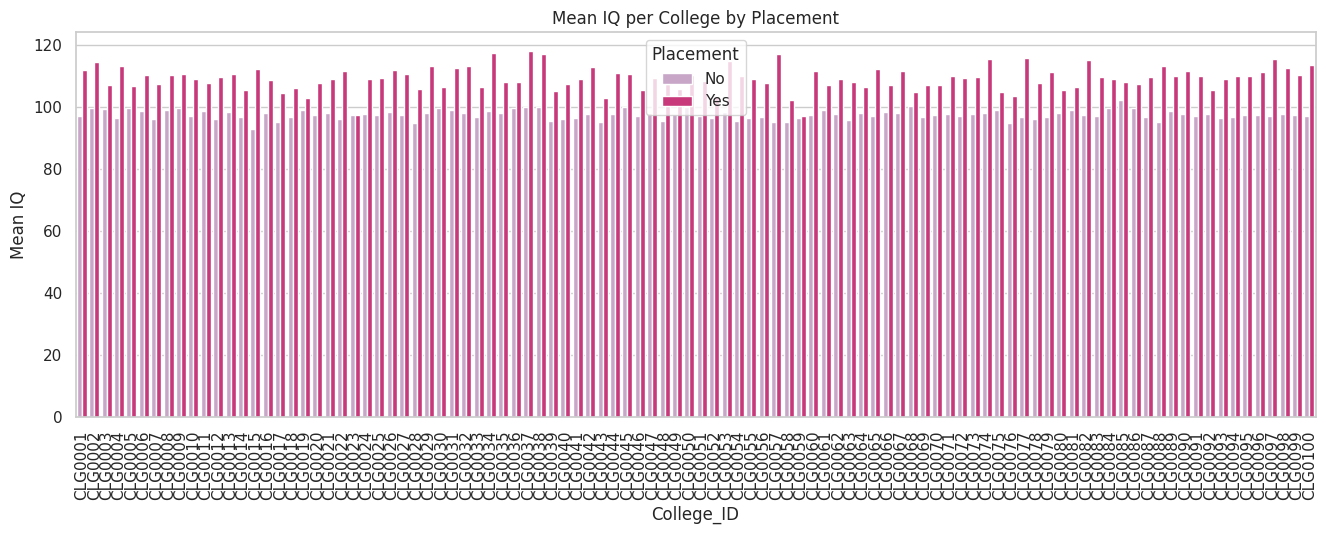


=== Summary of GPA_scaled by College_ID and Placement ===
╒══════════════╤═════════════╤═════════╤══════════╤═════════╕
│ College_ID   │ Placement   │    mean │   median │   count │
╞══════════════╪═════════════╪═════════╪══════════╪═════════╡
│ CLG0001      │ No          │ 2.9751  │    2.924 │      98 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0001      │ Yes         │ 3.55127 │    3.616 │      11 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0002      │ No          │ 2.97249 │    2.992 │      74 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0002      │ Yes         │ 3.52967 │    3.574 │      12 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0003      │ No          │ 2.96125 │    3.012 │      80 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0003      │ Yes         │ 3.37859 │    3.528 │      17 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0004  

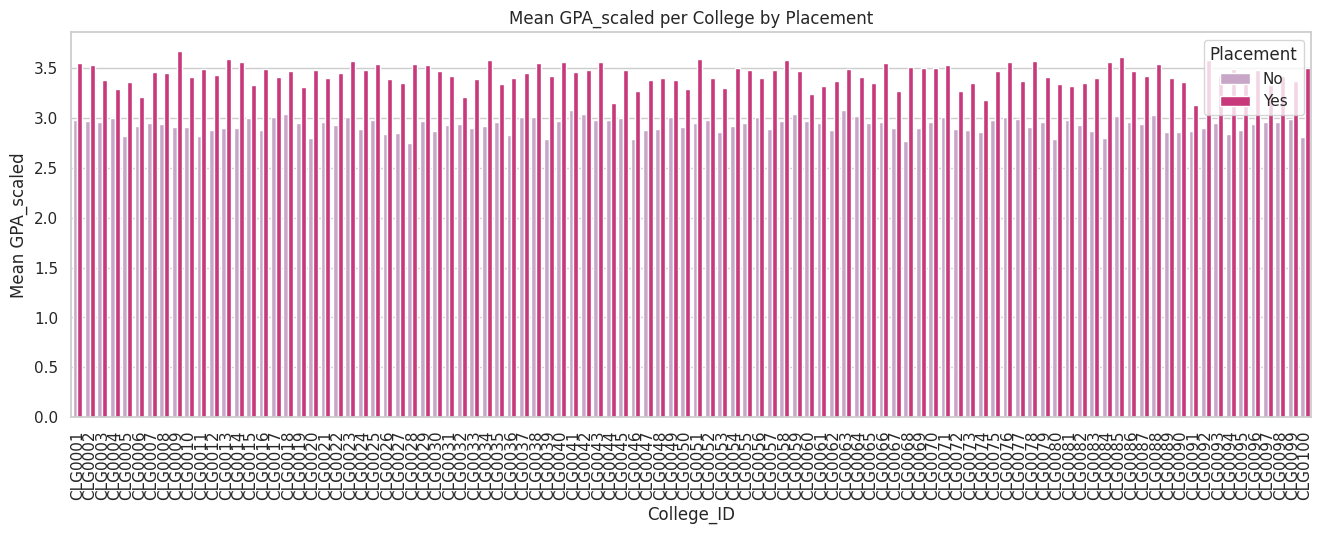


=== Summary of Communication_Skills by College_ID and Placement ===
╒══════════════╤═════════════╤═════════╤══════════╤═════════╕
│ College_ID   │ Placement   │    mean │   median │   count │
╞══════════════╪═════════════╪═════════╪══════════╪═════════╡
│ CLG0001      │ No          │ 5.11224 │      5   │      98 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0001      │ Yes         │ 7.18182 │      8   │      11 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0002      │ No          │ 5.39189 │      5   │      74 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0002      │ Yes         │ 6       │      6   │      12 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0003      │ No          │ 5.4125  │      5   │      80 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│ CLG0003      │ Yes         │ 7.88235 │      9   │      17 │
├──────────────┼─────────────┼─────────┼──────────┼─────────┤
│

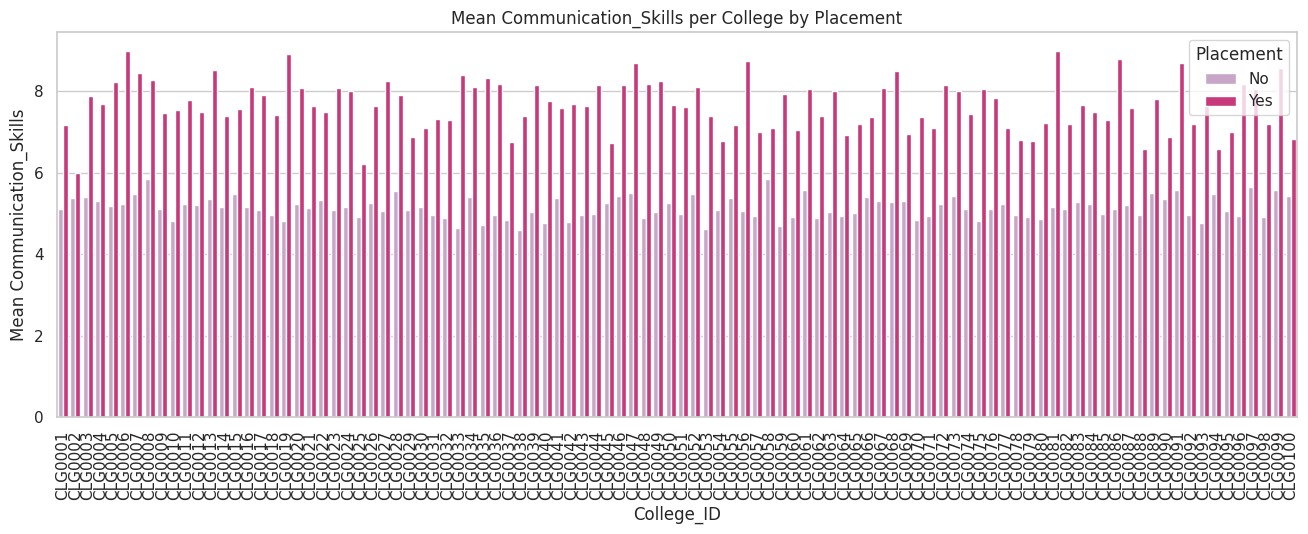

In [ ]:
# สร้างตารางสรุป IQ และ Communication_Skills ตาม College_ID และ Placement
summary_cols = ['IQ','GPA_scaled', 'Communication_Skills']
summary_tables = {}

for col in summary_cols:
    summary = df.groupby(['College_ID', 'Placement'])[col].agg(['mean','median','count']).reset_index()
    summary_tables[col] = summary
    print(f"\n=== Summary of {col} by College_ID and Placement ===")
    print(tabulate(summary, headers='keys', tablefmt='fancy_grid', showindex=False))

    # Bar plot แสดงค่า mean
    plt.figure(figsize=(16,5))
    sns.barplot(data=summary, x='College_ID', y='mean', hue='Placement', palette='PuRd')
    plt.xticks(rotation=90)
    plt.ylabel(f'Mean {col}')
    plt.title(f'Mean {col} per College by Placement')
    plt.show()

**สรุปจาก Bar Chart (IQ, GPA_scaled, Communication_Skills ตาม Placement แยก College)**

โค้ดในเซลล์นี้ได้ทำการวิเคราะห์ค่าเฉลี่ยและมัธยฐานของตัวแปรเชิงตัวเลขที่สำคัญ (`IQ`, `GPA_scaled`, `Communication_Skills`) โดยแบ่งตามวิทยาลัย (`College_ID`) และสถานะการได้งาน (`Placement`) เพื่อดูว่าคุณสมบัติเหล่านี้แตกต่างกันอย่างไรในแต่ละกลุ่มย่อย

**ข้อสังเกตที่สำคัญจากตารางสรุปและกราฟ Bar Plot:**

* **ความแตกต่างของค่าเฉลี่ยระหว่างกลุ่ม Placement ในแต่ละวิทยาลัย:**
    * ในทุกวิทยาลัย (`College_ID`) ค่าเฉลี่ยของ `IQ`, `GPA_scaled`, และ `Communication_Skills` ของนักศึกษาที่ได้งาน (`Yes`) จะสูงกว่านักศึกษาที่ไม่ได้งาน (`No`) อย่างสม่ำเสมอ นี่เป็นข้อค้นพบที่สอดคล้องกับภาพรวมของชุดข้อมูล และยืนยันว่าคุณสมบัติทั้งสามนี้มีความสำคัญต่อการได้งาน ไม่ว่าจะมาจากวิทยาลัยใดก็ตาม
    * ความแตกต่างของค่าเฉลี่ยระหว่างกลุ่ม Placed และ Not Placed อาจมีความมากน้อยแตกต่างกันไปในแต่ละวิทยาลัย ซึ่งสะท้อนถึงลักษณะเฉพาะของนักศึกษาในวิทยาลัยนั้นๆ
* **รูปแบบของแต่ละวิทยาลัย:**
    * แม้ว่าโดยรวมแล้วนักศึกษาที่ได้งานจะมีคะแนนเฉลี่ยสูงกว่า แต่กราฟ Bar Plot ก็แสดงให้เห็นถึงความหลากหลายระหว่างวิทยาลัย ตัวอย่างเช่น บางวิทยาลัยอาจมีค่าเฉลี่ย IQ หรือ GPA ของกลุ่ม Placed สูงโดดเด่นกว่าวิทยาลัยอื่น หรือบางวิทยาลัยอาจมีช่องว่างระหว่างค่าเฉลี่ยของกลุ่ม Placed และ Not Placed ที่แคบกว่า
* **ขนาดของกลุ่มย่อย:**
    * ตารางสรุป (ที่แสดงค่า 'count') แสดงให้เห็นว่าจำนวนนักศึกษาในแต่ละกลุ่มย่อย (แต่ละ College_ID และแต่ละสถานะ Placement) มีจำนวนแตกต่างกัน ซึ่งหมายความว่าค่าเฉลี่ยและมัธยฐานที่คำนวณได้สำหรับกลุ่มย่อยที่มีจำนวนน้อย อาจมีความน่าเชื่อถือน้อยกว่ากลุ่มย่อยที่มีจำนวนมาก

**ข้อสรุป:**

การวิเคราะห์นี้ยืนยันว่า **IQ, GPA_scaled, และ Communication_Skills** เป็นปัจจัยที่มีความสำคัญอย่างยิ่งยวดต่อการได้งาน โดยนักศึกษาที่มีคะแนนสูงในคุณสมบัติเหล่านี้มีโอกาสได้งานมากกว่าอย่างเห็นได้ชัด และแนวโน้มนี้เป็นจริงในทุกวิทยาลัย อย่างไรก็ตาม แต่ละวิทยาลัยอาจมีลักษณะเฉพาะและระดับความแตกต่างของค่าเฉลี่ยในปัจจัยเหล่านี้ที่ไม่เหมือนกัน ซึ่งข้อมูลนี้มีประโยชน์อย่างมากในการทำความเข้าใจปัจจัยการได้งานในระดับที่ละเอียดขึ้น และสามารถนำไปใช้ในการพิจารณาปัจจัยเหล่านี้ร่วมกับ College_ID ในการสร้างโมเดลคาดการณ์ในอนาคต

**Insight จาก วิเคราะห์ Bar Chart (IQ, GPA_scaled, Communication_Skills แยกตาม College และ Placement)**

- **IQ, GPA_scaled, และ Communication_Skills มีผลต่อการได้งานชัดเจน**  
  นักศึกษาที่ได้งาน (Placement = Yes) มีค่าเฉลี่ยของทั้งสามตัวแปรสูงกว่ากลุ่มที่ไม่ได้งาน (Placement = No) อย่างสม่ำเสมอในทุกวิทยาลัย

- **ความแตกต่างระหว่างวิทยาลัย**  
  - บางวิทยาลัยแสดงช่องว่างระหว่างกลุ่มที่ได้งานและไม่ได้งานอย่างชัดเจน (เช่น IQ หรือ GPA สูงกว่าโดดเด่น)  
  - บางวิทยาลัยช่องว่างนี้ค่อนข้างแคบ → อาจสะท้อนถึงมาตรฐานหรือลักษณะเฉพาะของนักศึกษาในวิทยาลัยนั้น ๆ  

- **ข้อควรระวังเรื่องจำนวนตัวอย่าง (Sample Size)**  
  กลุ่มย่อยที่มีจำนวนนักศึกษาน้อยอาจทำให้ค่าเฉลี่ย/มัธยฐานไม่น่าเชื่อถือเท่ากับกลุ่มที่มีนักศึกษามาก


**สรุป:**  
IQ, GPA_scaled และ Communication_Skills เป็นตัวชี้วัดสำคัญที่สัมพันธ์กับโอกาสได้งานในทุกวิทยาลัย แต่ระดับความแตกต่างของแต่ละปัจจัยยังขึ้นอยู่กับ College_ID ด้วย → สามารถใช้ College_ID เป็นปัจจัยเสริมในการสร้างโมเดลคาดการณ์ได้


#### Correlation Heatmap

##### เปรียบเทียบแค่ Numerical Column

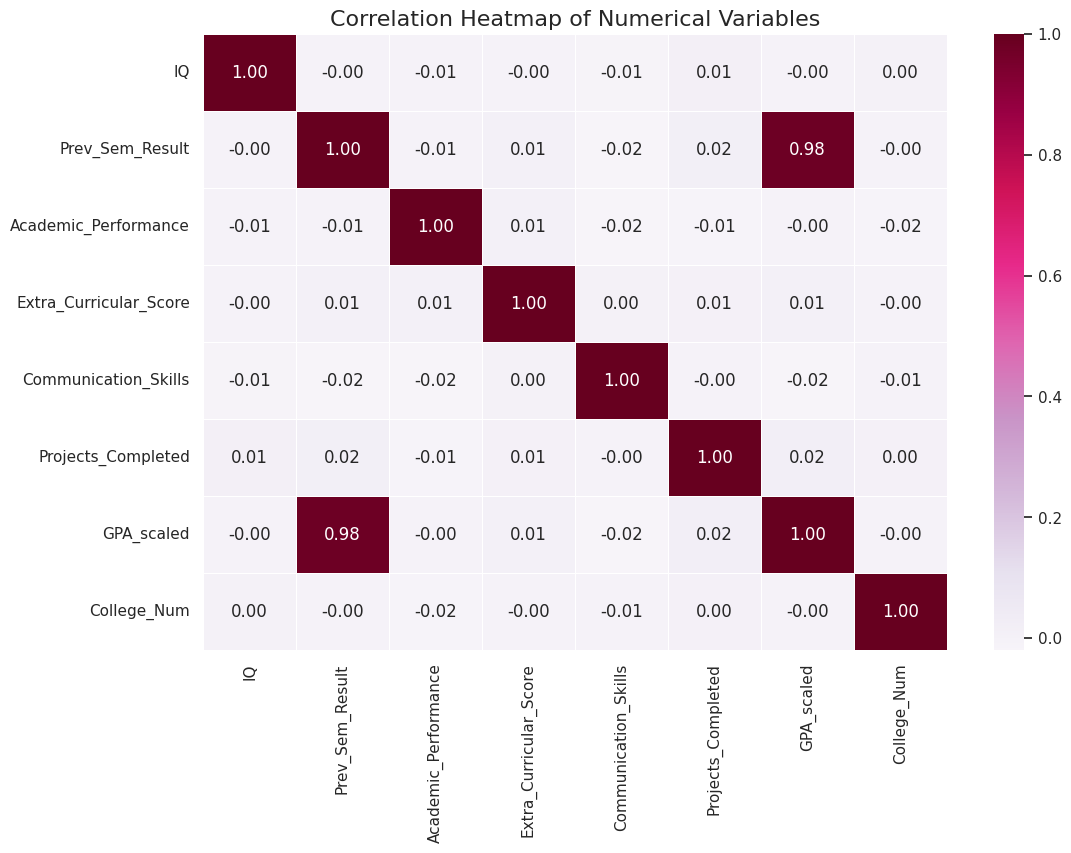

In [ ]:
# อัปเดต numerical_cols ใหม่
numerical_cols = df.select_dtypes(include=np.number).columns

corr_matrix = df[numerical_cols].corr()

# สร้าง Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

**สรุปจาก Correlation Heatmap**

Heatmap นี้แสดงค่าสหสัมพันธ์ (Correlation Coefficient) ระหว่างตัวแปรเชิงตัวเลขทั้งหมดในชุดข้อมูล ค่าเหล่านี้บ่งชี้ถึงความสัมพันธ์เชิงเส้นตรงระหว่างสองตัวแปร:

*   **ค่าใกล้ +1:** มีความสัมพันธ์เชิงบวกสูง (ตัวแปรหนึ่งเพิ่ม อีกตัวแปรก็เพิ่มตาม)
*   **ค่าใกล้ -1:** มีความสัมพันธ์เชิงลบสูง (ตัวแตรหนึ่งเพิ่ม อีกตัวแปรก็ลดลง)
*   **ค่าใกล้ 0:** มีความสัมพันธ์เชิงเส้นตรงต่ำหรือไม่ชัดเจน

**ข้อสังเกตที่สำคัญ:**

*   **GPA_scaled และ Prev_Sem_Result:** ยังคงมีความสัมพันธ์เชิงบวกสูง (0.98) ซึ่งคาดการณ์ได้ว่าเกรดเฉลี่ยที่ปรับ Scale แล้ว (GPA_scaled) ยังคงมีความสัมพันธ์อย่างใกล้ชิดกับผลการเรียนในภาคการศึกษาก่อนหน้า (Prev_Sem_Result)
*   **ตัวแปรอื่นๆ:** ตัวแปรเชิงตัวเลขอื่นๆ ส่วนใหญ่ (IQ, Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed) มีความสัมพันธ์เชิงเส้นตรงที่ต่ำมากกับตัวแปรอื่นๆ (ค่าใกล้ 0)

**ข้อสรุป:**

จาก Correlation Heatmap ยืนยันว่าไม่มีปัญหาเรื่อง **Multicollinearity** ในชุดข้อมูลนี้สำหรับตัวแปรเชิงตัวเลขส่วนใหญ่ ยกเว้นความสัมพันธ์ที่สูงระหว่าง Prev_Sem_Result และ GPA_scaled ซึ่งเป็นเรื่องปกติเนื่องจากเป็นตัวแปรที่เกี่ยวข้องกันโดยตรง สภาพนี้เหมาะสมสำหรับการนำข้อมูลไปใช้สร้างโมเดล Machine Learning เนื่องจากตัวแปรปัจจัยส่วนใหญ่เป็นอิสระต่อกันในเชิงเส้นตรง

**Insight จาก Correlation Heatmap**

จาก Heatmap ของตัวแปรเชิงตัวเลข พบว่า:

- ตัวแปร **GPA_scaled** และ **Prev_Sem_Result** มีความสัมพันธ์เชิงบวกสูง (≈0.98) ซึ่งสอดคล้องกับความเป็นจริง เพราะ GPA_scaled มาจากผลการเรียนก่อนหน้า
- ตัวแปรอื่นๆ เช่น **IQ, Academic_Performance, Extra_Curricular_Score, Communication_Skills, Projects_Completed** มีความสัมพันธ์เชิงเส้นต่ำกับตัวแปรอื่นๆ แสดงว่าตัวแปรเหล่านี้ส่วนใหญ่เป็นอิสระต่อกัน
- ไม่มีปัญหา **Multicollinearity** สำหรับตัวแปรเชิงตัวเลขส่วนใหญ่ ทำให้เหมาะสมสำหรับใช้ในโมเดล Machine Learning โดยไม่จำเป็นต้องลบตัวแปรใดๆ ยกเว้นการพิจารณาเรื่องความซ้ำซ้อนระหว่าง GPA_scaled กับ Prev_Sem_Result


##### เปรียบเทียบแค่ Numerical Column (เพิ่ม Placement_binary)

In [ ]:
# แปลง placement เป็น 0/1
df['Placement_binary'] = df['Placement'].map({'No': 0, 'Yes': 1})

In [ ]:
# แปลง Internship_Experience เป็น 0/1
df['Internship_binary'] = df['Internship_Experience'].map({'No': 0, 'Yes': 1})

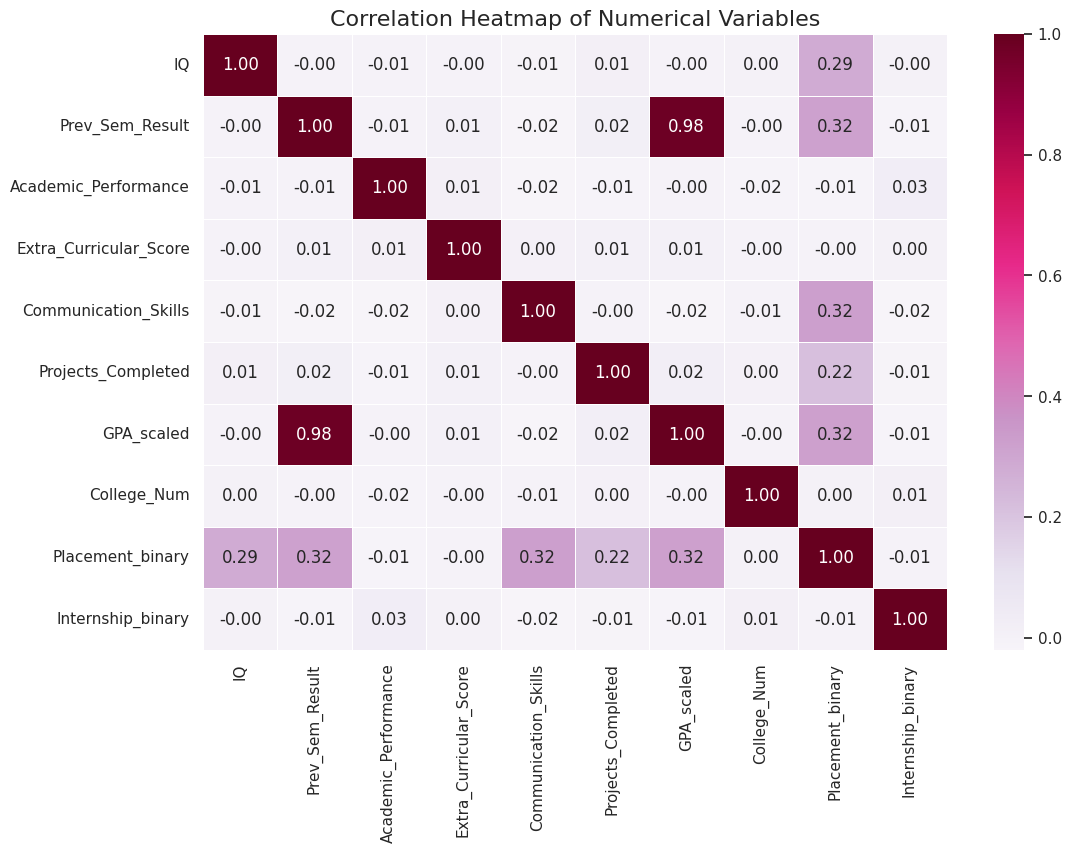

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in ['Placement_binary', 'Internship_binary']:
    if col not in numerical_cols:
        numerical_cols.append(col)

corr_matrix = df[numerical_cols].corr()

# สร้าง Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()


**สรุปผลจาก Correlation Heatmap: ปัจจัยที่มีผลต่อการได้งาน**

Heatmap นี้แสดงค่าสหสัมพันธ์ (Correlation Coefficient) ระหว่างตัวแปรเชิงตัวเลขทั้งหมด รวมถึงตัวแปรเป้าหมายที่แปลงเป็นค่าไบนารีแล้ว (`Placement_binary`) และตัวแปร `Internship_binary`

**ข้อสังเกตที่สำคัญ:**

*   **ความสัมพันธ์กับ 'Placement_binary' (การได้งาน):**
    *   ตัวแปร `GPA_scaled`, `IQ`, และ `Communication_Skills` แสดงความสัมพันธ์เชิงบวกในระดับปานกลางกับ `Placement_binary` (ค่าสหสัมพันธ์ประมาณ 0.28 - 0.32) ซึ่งยืนยันว่าคุณสมบัติเหล่านี้มีความสัมพันธ์กับการได้งาน
    *   ตัวแปร `Academic_Performance`, `Extra_Curricular_Score`, และ `Projects_Completed` มีความสัมพันธ์เชิงเส้นตรงที่ต่ำมากกับ `Placement_binary` (ค่าสหสัมพันธ์ใกล้ 0)
    *   ตัวแปร `Internship_binary` (ประสบการณ์ฝึกงาน) มีความสัมพันธ์เชิงลบที่ต่ำมากกับ `Placement_binary` (ค่าสหสัมพันธ์ใกล้ 0) ซึ่งยืนยันข้อค้นพบก่อนหน้านี้ว่าในชุดข้อมูลนี้ ประสบการณ์ฝึกงานเดิมไม่ได้มีความสัมพันธ์เชิงบวกที่ชัดเจนกับการได้งาน
*   **ความสัมพันธ์ระหว่างตัวแปรปัจจัย:**
    *   ไม่พบปัญหา Multicollinearity (ความสัมพันธ์เชิงเส้นตรงที่สูงมากระหว่างตัวแปรปัจจัย) ในภาพรวม
    *   กลุ่มตัวแปรที่เกี่ยวข้องกับผลการเรียน (`Prev_Sem_Result`, `GPA_scaled`) ยังคงแสดงความสัมพันธ์เชิงบวกที่สูงมากระหว่างกันเอง ซึ่งเป็นที่คาดไว้

**ข้อสรุปหลัก:**

การวิเคราะห์ด้วย Heatmap ที่รวม `Placement_binary` ช่วยยืนยันอีกครั้งว่า **`GPA_scaled`, `IQ`, และ `Communication_Skills`** เป็นปัจจัยหลักที่ส่งผลเชิงบวกต่อโอกาสในการได้งานในชุดข้อมูลนี้ ในขณะที่ `Academic_Performance`, `Extra_Curricular_Score`, `Projects_Completed`, และ `Internship_binary` มีความสัมพันธ์ที่ต่ำกว่า

**Insight จาก Correlation Heatmap กับ Placement**

จาก Heatmap ของตัวแปรเชิงตัวเลขที่รวม `Placement_binary` และ `Internship_binary` สรุปได้ว่า Heatmap ยืนยันว่า **GPA_scaled, IQ, Communication_Skills** เป็นตัวแปรหลักที่มีผลต่อการได้งาน ส่วนตัวแปรอื่นๆ มีผลน้อยกว่า


### การวิเคราะห์เชิงลึก: ความสัมพันธ์ระหว่างประสบการณ์ฝึกงานและโอกาสการได้งาน


gpa_group
Low GPA     3361
Mid GPA     3326
High GPA    3313
Name: count, dtype: int64


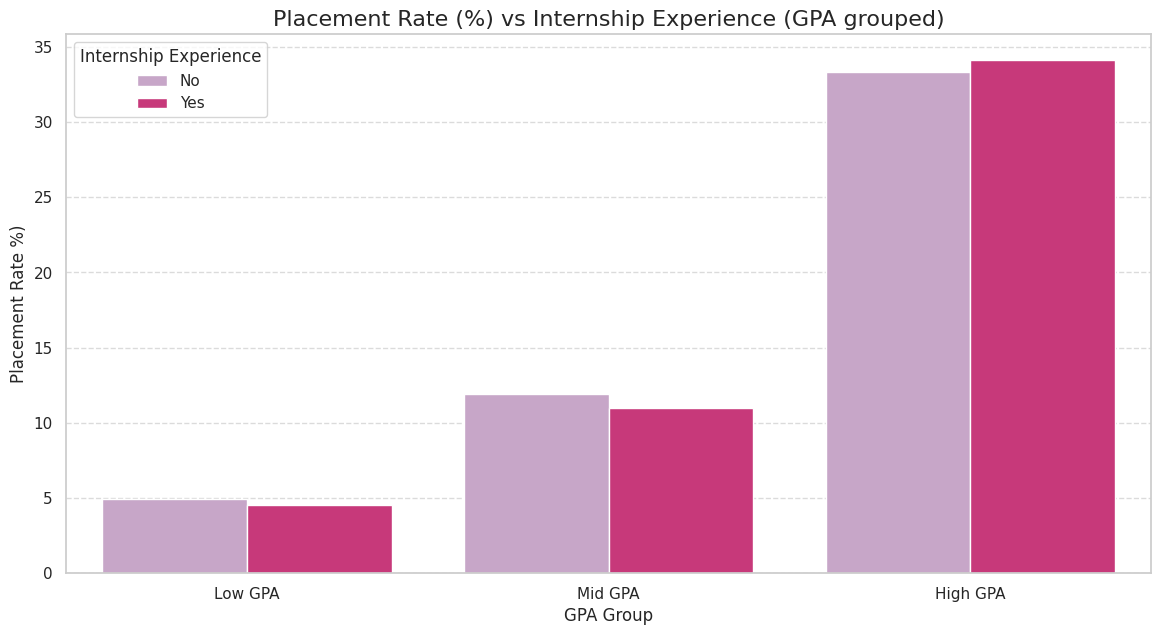

In [ ]:
#แบ่งกลุ่มนักศึกษาตาม GPA
try:
    df['gpa_group'] = pd.qcut(df['GPA_scaled'], q=3, labels=['Low GPA', 'Mid GPA', 'High GPA'])
    print(df['gpa_group'].value_counts())
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการสร้าง gpa_group: {e}")

# สร้างกราฟเพื่อไขปริศนา
# ใช้ catplot ของ seaborn เพื่อสร้างกราฟที่ทรงพลังในการเปรียบเทียบ
# โดยให้แกน x เป็น Internship, แกน y เป็นสัดส่วนการได้งาน, และ "แบ่งคอลัมน์" ตามกลุ่ม GPA
try:
    placement_by_gpa_internship = df.groupby(['gpa_group', 'Internship_Experience'])['Placement'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='placement_rate')

    # สร้างกราฟด้วย barplot
    plt.figure(figsize=(14, 7))
    sns.barplot(
        data=placement_by_gpa_internship,
        x='gpa_group',
        y='placement_rate',
        hue='Internship_Experience',
        palette='PuRd'
    )
    plt.title('Placement Rate (%) vs Internship Experience (GPA grouped)', fontsize=16)
    plt.xlabel('GPA Group', fontsize=12)
    plt.ylabel('Placement Rate %)', fontsize=12)
    plt.legend(title='Internship Experience')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

except Exception as e:
    print(f"ไม่สามารถสร้างกราฟได้: {e}")

--- แบ่งกลุ่มตามทักษะการสื่อสาร ---
comm_group
Low Comm     3960
High Comm    3119
Mid Comm     2921
Name: count, dtype: int64


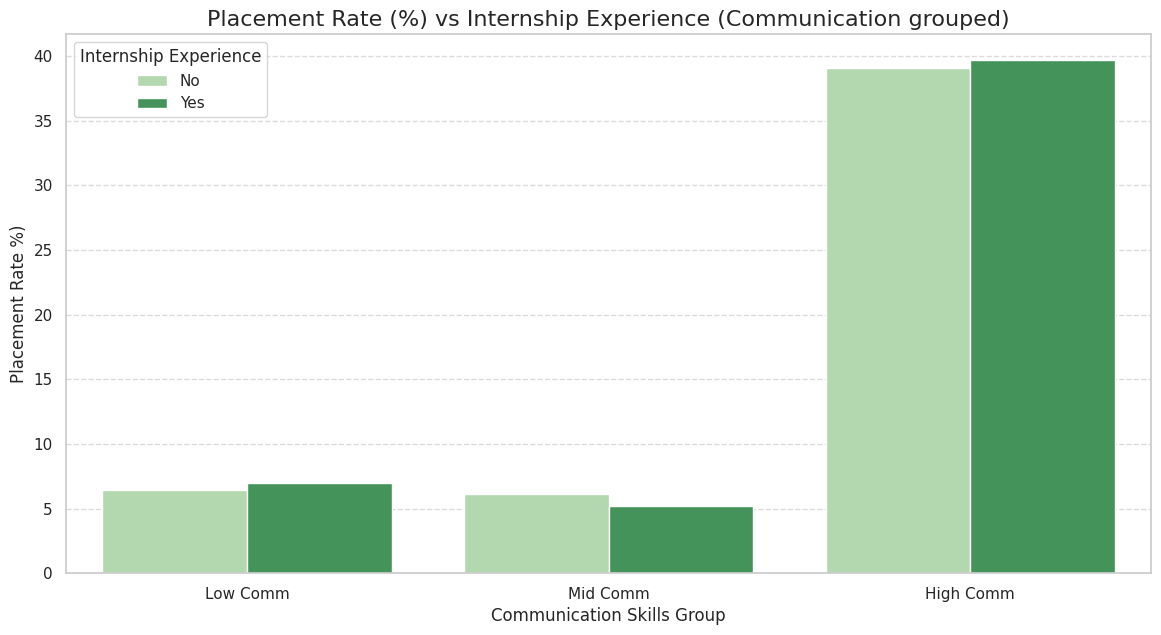

In [ ]:
# --- ขั้นตอนที่ 1: แบ่งกลุ่มตามทักษะการสื่อสาร ---
# ใช้ qcut เพื่อแบ่งนักศึกษาออกเป็น 3 กลุ่ม (ทักษะน้อย, กลาง, สูง)
df['comm_group'] = pd.qcut(df['Communication_Skills'], q=3, labels=['Low Comm', 'Mid Comm', 'High Comm'])
print("--- แบ่งกลุ่มตามทักษะการสื่อสาร ---")
print(df['comm_group'].value_counts())

# --- ขั้นตอนที่ 2: คำนวณและสร้างกราฟ ---
placement_by_comm_internship = df.groupby(['comm_group', 'Internship_Experience'])['Placement'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='placement_rate')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=placement_by_comm_internship,
    x='comm_group',
    y='placement_rate',
    hue='Internship_Experience',
    palette='Greens'
)
plt.title('Placement Rate (%) vs Internship Experience (Communication grouped)', fontsize=16)
plt.xlabel('Communication Skills Group', fontsize=12)
plt.ylabel('Placement Rate %)', fontsize=12)
plt.legend(title='Internship Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- แบ่งกลุ่มตามจำนวนโปรเจกต์ ---
project_group
High Projects    3395
Mid Projects     3308
Low Projects     3297
Name: count, dtype: int64


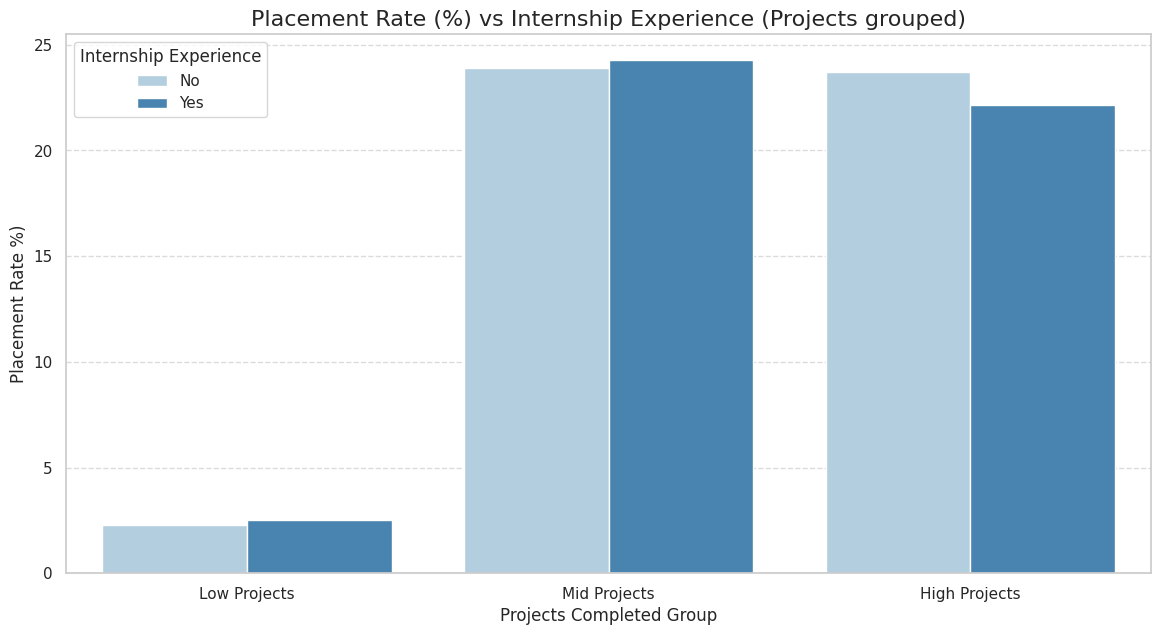

In [ ]:
# --- ขั้นตอนที่ 1: แบ่งกลุ่มตามจำนวนโปรเจกต์ ---
# เนื่องจาก Projects_Completed มีค่าไม่ต่อเนื่อง เราจะใช้เงื่อนไขเพื่อแบ่งกลุ่มเอง
def project_group(projects):
    if projects <= 1:
        return 'Low Projects'
    elif projects <= 3:
        return 'Mid Projects'
    else:
        return 'High Projects'

df['project_group'] = df['Projects_Completed'].apply(project_group)
print("\n--- แบ่งกลุ่มตามจำนวนโปรเจกต์ ---")
print(df['project_group'].value_counts())

# --- ขั้นตอนที่ 2: คำนวณและสร้างกราฟ ---
placement_by_proj_internship = df.groupby(['project_group', 'Internship_Experience'])['Placement'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='placement_rate')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=placement_by_proj_internship,
    x='project_group',
    y='placement_rate',
    hue='Internship_Experience',
    palette='Blues',
    order=['Low Projects', 'Mid Projects', 'High Projects'] # เรียงลำดับแกน x ให้ถูกต้อง
)
plt.title('Placement Rate (%) vs Internship Experience (Projects grouped)', fontsize=16)
plt.xlabel('Projects Completed Group', fontsize=12)
plt.ylabel('Placement Rate %)', fontsize=12)
plt.legend(title='Internship Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- แบ่งกลุ่มตาม IQ ---
iq_group
Low IQ     3444
Mid IQ     3369
High IQ    3187
Name: count, dtype: int64


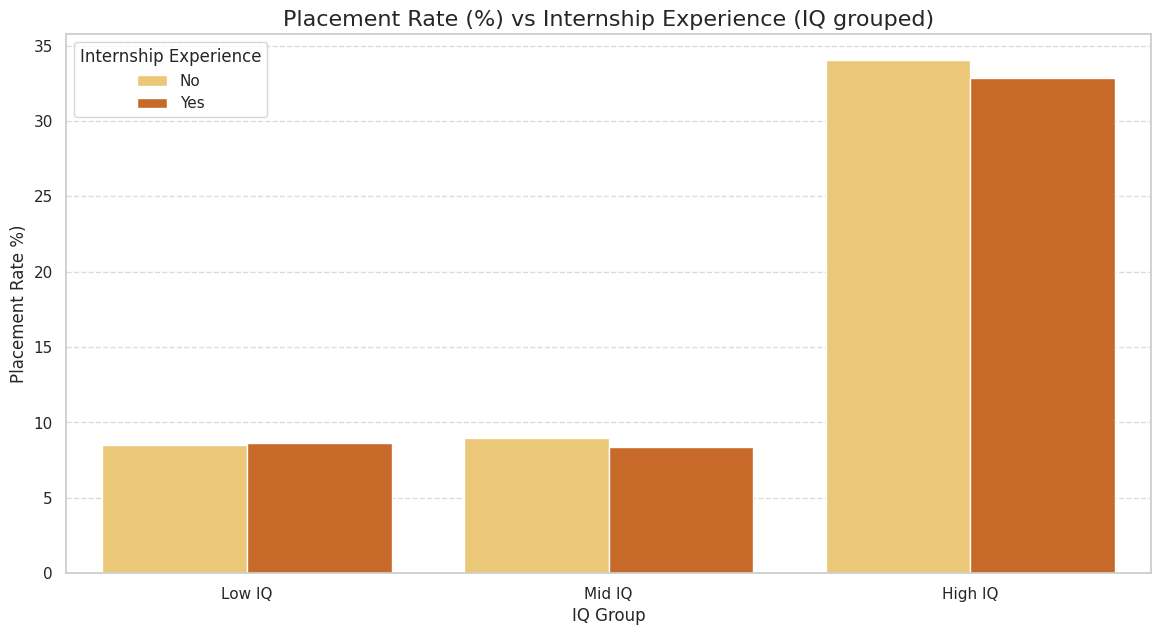

In [ ]:
# --- ขั้นตอนที่ 1: แบ่งกลุ่มตาม IQ ---
# ใช้ qcut เพื่อแบ่งนักศึกษาออกเป็น 3 กลุ่ม (IQ น้อย, กลาง, สูง)
df['iq_group'] = pd.qcut(df['IQ'], q=3, labels=['Low IQ', 'Mid IQ', 'High IQ'])
print("--- แบ่งกลุ่มตาม IQ ---")
print(df['iq_group'].value_counts())

# --- ขั้นตอนที่ 2: คำนวณและสร้างกราฟ ---
placement_by_iq_internship = df.groupby(['iq_group', 'Internship_Experience'])['Placement'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='placement_rate')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=placement_by_iq_internship,
    x='iq_group',
    y='placement_rate',
    hue='Internship_Experience',
    palette='YlOrBr'
)
plt.title('Placement Rate (%) vs Internship Experience (IQ grouped)', fontsize=16)
plt.xlabel('IQ Group', fontsize=12)
plt.ylabel('Placement Rate %)', fontsize=12)
plt.legend(title='Internship Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- แบ่งกลุ่มตามประสิทธิภาพทางวิชาการ ---
acad_perf_group
Low Perf     3953
High Perf    3056
Mid Perf     2991
Name: count, dtype: int64


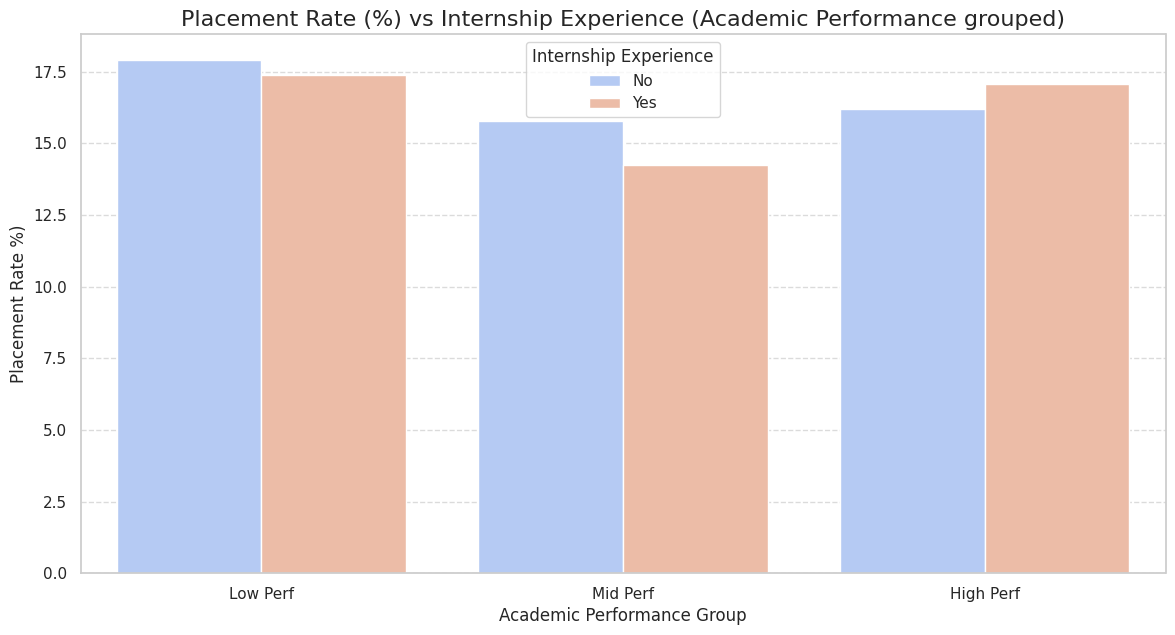

In [ ]:
# --- ขั้นตอนที่ 1: แบ่งกลุ่มตาม Academic Performance ---
# ใช้ qcut เพื่อแบ่งนักศึกษาออกเป็น 3 กลุ่ม (ประสิทธิภาพน้อย, กลาง, สูง)
df['acad_perf_group'] = pd.qcut(df['Academic_Performance'], q=3, labels=['Low Perf', 'Mid Perf', 'High Perf'])
print("\n--- แบ่งกลุ่มตามประสิทธิภาพทางวิชาการ ---")
print(df['acad_perf_group'].value_counts())

# --- ขั้นตอนที่ 2: คำนวณและสร้างกราฟ ---
placement_by_acad_internship = df.groupby(['acad_perf_group', 'Internship_Experience'])['Placement'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='placement_rate')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=placement_by_acad_internship,
    x='acad_perf_group',
    y='placement_rate',
    hue='Internship_Experience',
    palette='coolwarm'
)
plt.title('Placement Rate (%) vs Internship Experience (Academic Performance grouped)', fontsize=16)
plt.xlabel('Academic Performance Group', fontsize=12)
plt.ylabel('Placement Rate %)', fontsize=12)
plt.legend(title='Internship Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- แบ่งกลุ่มตามคะแนนกิจกรรมนอกหลักสูตร ---
extra_curricular_group
Low Score     3696
Mid Score     3586
High Score    2718
Name: count, dtype: int64


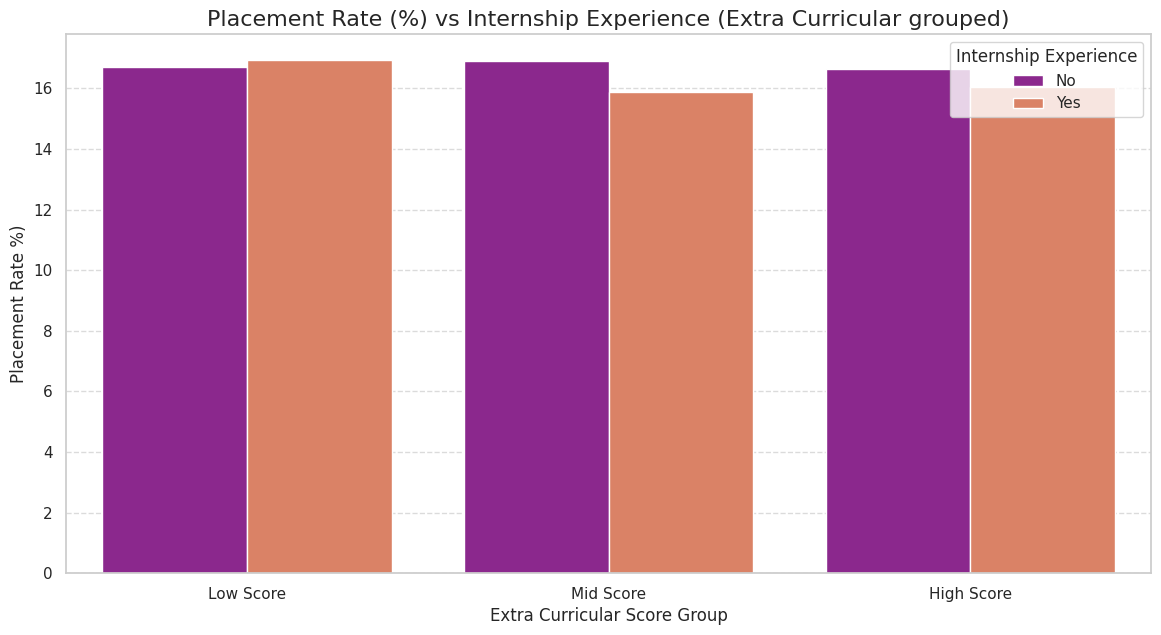

In [ ]:
# --- ขั้นตอนที่ 1: แบ่งกลุ่มตามคะแนนกิจกรรม ---
# ใช้ qcut เพื่อแบ่งนักศึกษาออกเป็น 3 กลุ่ม (คะแนนน้อย, กลาง, สูง)
df['extra_curricular_group'] = pd.qcut(df['Extra_Curricular_Score'], q=3, labels=['Low Score', 'Mid Score', 'High Score'])
print("\n--- แบ่งกลุ่มตามคะแนนกิจกรรมนอกหลักสูตร ---")
print(df['extra_curricular_group'].value_counts())

# --- ขั้นตอนที่ 2: คำนวณและสร้างกราฟ ---
placement_by_extra_internship = df.groupby(['extra_curricular_group', 'Internship_Experience'])['Placement'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='placement_rate')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=placement_by_extra_internship,
    x='extra_curricular_group',
    y='placement_rate',
    hue='Internship_Experience',
    palette='plasma'
)
plt.title('Placement Rate (%) vs Internship Experience (Extra Curricular grouped)', fontsize=16)
plt.xlabel('Extra Curricular Score Group', fontsize=12)
plt.ylabel('Placement Rate %)', fontsize=12)
plt.legend(title='Internship Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
placement_by_college = df.groupby(['College_ID', 'Internship_Experience'])['Placement'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='placement_rate')

college_pivot = placement_by_college.pivot_table(
    index='College_ID',
    columns='Internship_Experience',
    values='placement_rate'
).fillna(0)

college_pivot['Internship_Impact'] = college_pivot['Yes'] - college_pivot['No']
college_impact_sorted = college_pivot.sort_values(by='Internship_Impact', ascending=False)

top_10 = college_impact_sorted.head(10)
bottom_10 = college_impact_sorted.tail(10)

print("Summary Table of Internship Impact by College ")


print("\nTop 10 Colleges where Internship has the MOST POSITIVE impact:")
print(tabulate(top_10, headers='keys', tablefmt='psql'))

print("\nBottom 10 Colleges where Internship has the MOST NEGATIVE impact:")
print(tabulate(bottom_10, headers='keys', tablefmt='psql'))


Summary Table of Internship Impact by College 

Top 10 Colleges where Internship has the MOST POSITIVE impact:
+--------------+----------+---------+---------------------+
| College_ID   |       No |     Yes |   Internship_Impact |
|--------------+----------+---------+---------------------|
| CLG0100      | 12.1212  | 29.0323 |            16.911   |
| CLG0008      |  7.54717 | 24.3902 |            16.8431  |
| CLG0070      |  7.84314 | 20.5882 |            12.7451  |
| CLG0087      | 18.0328  | 30.5556 |            12.5228  |
| CLG0076      | 10       | 22.2222 |            12.2222  |
| CLG0085      | 15.5172  | 27.5    |            11.9828  |
| CLG0005      | 11.2676  | 21.9512 |            10.6836  |
| CLG0040      | 13.2075  | 23.8095 |            10.602   |
| CLG0053      |  9.80392 | 20      |            10.1961  |
| CLG0067      | 16.1765  | 26.087  |             9.91049 |
+--------------+----------+---------+---------------------+

Bottom 10 Colleges where Internship has the MOST

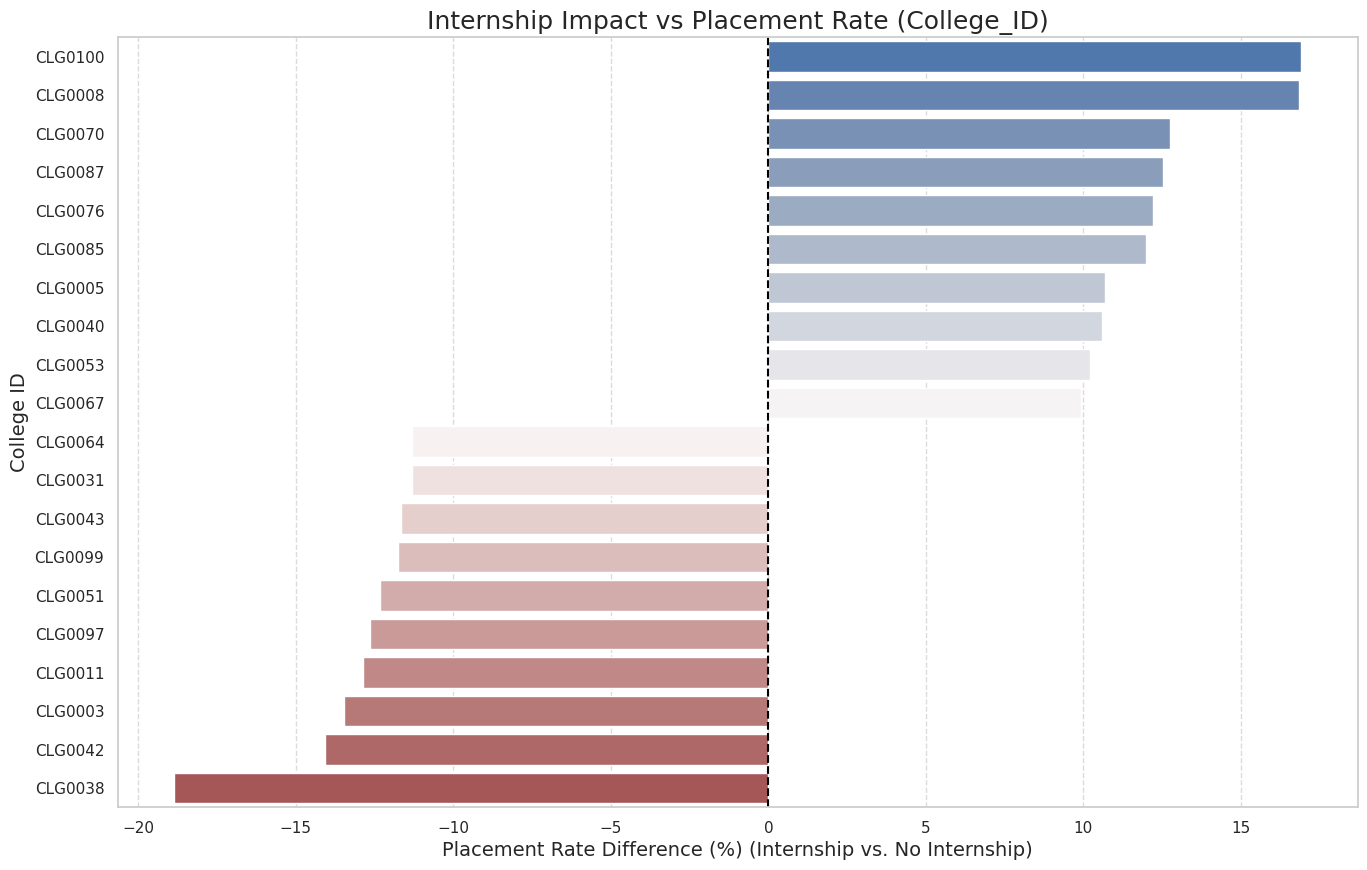

In [ ]:
# --- ขั้นตอนที่ 2: สร้างกราฟแสดงผล ---
# รวมกลุ่ม Top 10 และ Bottom 10 เข้าด้วยกันเพื่อพล็อต
top_10 = college_impact_sorted.head(10)
bottom_10 = college_impact_sorted.tail(10)
interesting_colleges = pd.concat([top_10, bottom_10])

# สร้างกราฟ Bar Chart
plt.figure(figsize=(16, 10))
sns.barplot(
    data=interesting_colleges,
    x='Internship_Impact',
    y=interesting_colleges.index, # ให้แกน y เป็น College_ID
    palette='vlag' # ใช้สีที่แยกค่าบวก/ลบได้ดี
)

plt.title('Internship Impact vs Placement Rate (College_ID)', fontsize=18)
plt.xlabel('Placement Rate Difference (%) (Internship vs. No Internship)', fontsize=14)
plt.ylabel('College ID', fontsize=14)
plt.axvline(x=0, color='black', linestyle='--') # เพิ่มเส้นศูนย์เพื่อการเปรียบเทียบ
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# --- ขั้นตอนที่ 1: สร้างลิสต์ของ College_ID ที่เราสนใจ ---
# เรามี top_10 และ bottom_10 จากการวิเคราะห์ก่อนหน้านี้แล้ว
top_10_colleges = top_10.index
bottom_10_colleges = bottom_10.index

# --- ขั้นตอนที่ 2: แบ่ง DataFrame หลักออกเป็น 2 กลุ่ม ---
df_top_colleges = df[df['College_ID'].isin(top_10_colleges)]
df_bottom_colleges = df[df['College_ID'].isin(bottom_10_colleges)]

# --- ขั้นตอนที่ 3: คำนวณค่าเฉลี่ยของคุณสมบัติต่างๆ ของแต่ละกลุ่ม ---
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขและน่าสนใจ
features_to_compare = [
    'IQ',
    'GPA_scaled',
    'Academic_Performance',
    'Extra_Curricular_Score',
    'Communication_Skills',
    'Projects_Completed'
]

# คำนวณค่าเฉลี่ย
top_colleges_profile = df_top_colleges[features_to_compare].mean()
bottom_colleges_profile = df_bottom_colleges[features_to_compare].mean()

# สร้างเป็น DataFrame เพื่อให้ดูง่าย
comparison_df = pd.DataFrame({
    'Top 10 Colleges (Avg)': top_colleges_profile,
    'Bottom 10 Colleges (Avg)': bottom_colleges_profile
})

# เพิ่มคอลัมน์ความแตกต่าง
comparison_df['Difference'] = comparison_df['Top 10 Colleges (Avg)'] - comparison_df['Bottom 10 Colleges (Avg)']

# --- ขั้นตอนที่ 4: แสดงผลด้วยตารางที่สวยงาม ---
from tabulate import tabulate

print("Average Student Profile Comparison")
print(tabulate(comparison_df, headers='keys', tablefmt='psql'))

Average Student Profile Comparison
+------------------------+-------------------------+----------------------------+--------------+
|                        |   Top 10 Colleges (Avg) |   Bottom 10 Colleges (Avg) |   Difference |
|------------------------+-------------------------+----------------------------+--------------|
| IQ                     |                99.9515  |                  100.296   |  -0.344645   |
| GPA_scaled             |                 3.00859 |                    3.05531 |  -0.0467174  |
| Academic_Performance   |                 5.5356  |                    5.57247 |  -0.0368676  |
| Extra_Curricular_Score |                 4.94634 |                    4.97393 |  -0.0275947  |
| Communication_Skills   |                 5.57585 |                    5.59124 |  -0.0153895  |
| Projects_Completed     |                 2.51909 |                    2.51303 |   0.00605744 |
+------------------------+-------------------------+----------------------------+-----------

**การวิเคราะห์เชิงลึก: ปัจจัยเชิงซ้อนที่มีอิทธิพลต่อโอกาสการได้งานของนักศึกษา**



การวิเคราะห์ข้อมูลเชิงสำรวจ (Exploratory Data Analysis - EDA) นี้มีวัตถุประสงค์เพื่อระบุปัจจัยสำคัญที่ส่งผลต่อโอกาสการได้งาน (Placement) ของนักศึกษา ผลการวิเคราะห์ในเบื้องต้นไม่พบความสัมพันธ์ที่มีนัยสำคัญทางสถิติระหว่างการมีประสบการณ์ฝึกงาน (Internship Experience) และโอกาสการได้งาน ซึ่งเป็นผลลัพธ์ที่ขัดแย้งกับความเข้าใจโดยทั่วไป เพื่อทำความเข้าใจความสัมพันธ์ที่ซับซ้อนดังกล่าว จึงได้ดำเนินการวิเคราะห์หลายตัวแปร (Multivariate Analysis) เพื่อสืบสวนว่าผลกระทบของการฝึกงานนั้นขึ้นอยู่กับปัจจัยด้านคุณสมบัตินักศึกษาและบริบทของสถาบันการศึกษาหรือไม่

**ระเบียบวิธีวิเคราะห์ (Methodology)**

ได้ทำการวิเคราะห์แบบเจาะจงกลุ่ม (Segmented Analysis) โดยแบ่งกลุ่มตัวอย่างนักศึกษาตามคุณลักษณะต่างๆ ได้แก่ ระดับผลการเรียน (GPA), ทักษะการสื่อสาร, จำนวนโปรเจกต์, IQ, ประสิทธิภาพทางวิชาการ, คะแนนกิจกรรมนอกหลักสูตร และสถาบันการศึกษา (`College_ID`) จากนั้นจึงคำนวณและเปรียบเทียบอัตราการได้งาน (Placement Rate) ระหว่างนักศึกษาที่มีและไม่มีประสบการณ์ฝึกงานภายในแต่ละกลุ่มย่อย



**ผลการวิเคราะห์และองค์ความรู้ที่ได้รับ (Findings & Insights)**

การสืบสวนเชิงลึกได้เปิดเผยความสัมพันธ์ที่ซับซ้อนและนำไปสู่บทสรุปที่สำคัญ ดังนี้:

**1. การค้นพบ "ปรากฏการณ์ประหลาด"**
เมื่อวิเคราะห์โดยแบ่งกลุ่มตามคุณสมบัตินักศึกษา (เช่น GPA) พบว่าผลกระทบของการฝึกงานนั้นไม่สม่ำเสมอ ในกลุ่มนักศึกษาที่มีผลการเรียนสูง (High GPA) การฝึกงานช่วยเพิ่มโอกาสการได้งานอย่างชัดเจน แต่ในทางตรงกันข้าม สำหรับกลุ่มนักศึกษาที่มีผลการเรียนปานกลางและต่ำ (Mid & Low GPA) กลับพบปรากฏการณ์ที่น่าสนใจ คือกลุ่มที่ **ไม่มี** ประสบการณ์ฝึกงาน มีอัตราการได้งานที่สูงกว่า

**2. บริบทของสถาบันคือปัจจัยชี้ขาด**
เมื่อวิเคราะห์โดยจำแนกตามสถาบันการศึกษา (`College_ID`) พบว่าสถาบันสามารถแบ่งออกเป็น 2 กลุ่มที่ชัดเจน:
* **กลุ่มที่การฝึกงานส่งผลบวกอย่างยิ่ง (Top 10):** ในวิทยาลัยกลุ่มนี้ การมีประสบการณ์ฝึกงานเพิ่มอัตราการได้งานอย่างมีนัยสำคัญ
* **กลุ่มที่การฝึกงานส่งผลลบ (Bottom 10):** ในวิทยาลัยกลุ่มนี้ นักศึกษาที่ไม่มีประสบการณ์ฝึกงานกลับมีอัตราการได้งานสูงกว่า

**3. คุณภาพนักศึกษาไม่ใช่คำตอบ**
การค้นพบที่สำคัญที่สุด คือเมื่อเปรียบเทียบคุณสมบัติเฉลี่ยของนักศึกษา (IQ, GPA, ฯลฯ) ระหว่างวิทยาลัยกลุ่ม Top 10 และ Bottom 10 กลับพบว่า **ไม่มีความแตกต่างอย่างมีนัยสำคัญทางสถิติ**



**บทสรุปสุดท้าย (Final Conclusion)**

จากการรวบรวมหลักฐานทั้งหมด สามารถสรุปองค์ความรู้ที่สำคัญที่สุดได้ดังนี้:

> **ประสิทธิภาพและคุณค่าของประสบการณ์ฝึกงาน ไม่ได้ถูกกำหนดโดยคุณสมบัติของตัวนักศึกษา แต่ถูกกำหนดโดย "ระบบนิเวศของสถาบัน" (Institutional Ecosystem) ที่นักศึกษาสังกัดอยู่**

การที่ค่าเฉลี่ยโดยรวมไม่พบความสัมพันธ์ระหว่างการฝึกงานและการได้งานนั้น เป็นผลมาจากการที่ผลกระทบเชิงบวกจากวิทยาลัยกลุ่มหนึ่งได้ **"หักล้าง"** กับผลกระทบเชิงลบจากอีกกลุ่มหนึ่งในข้อมูลโดยรวม "ระบบนิเวศของสถาบัน" ในที่นี้อาจหมายรวมถึงปัจจัยต่างๆ ที่ไม่ได้มีอยู่ในชุดข้อมูลโดยตรง เช่น คุณภาพของโปรแกรมความร่วมมือกับภาคอุตสาหกรรม และประสิทธิภาพของศูนย์ให้คำปรึกษาด้านอาชีพ (Career Services) ของแต่ละสถาบัน

**นัยยะต่อการดำเนินงานในอนาคต (Future Implications)**
การค้นพบนี้มีความสำคัญอย่างยิ่งต่อการพัฒนาตัวแบบการทำนาย (Predictive Model) โดยชี้ให้เห็นว่าตัวแปร `Internship_Experience` ไม่สามารถใช้เป็นปัจจัยอิสระได้โดยตรง แต่จำเป็นต้องพิจารณาในลักษณะของความสัมพันธ์เชิงซ้อนร่วมกับปัจจัยอื่น โดยเฉพาะ `College_ID` เพื่อสร้าง Feature ที่สามารถสะท้อนถึง "ประสิทธิภาพของระบบนิเวศ" ของแต่ละสถาบัน ซึ่งจะช่วยเพิ่มความแม่นยำให้แก่โมเดลในอนาคตได้อย่างมีนัยสำคัญ

### **สรุป Insight ที่สำคัญจากโครงการ Predict Student Employment Opportunity**


จากการสำรวจและวิเคราะห์ข้อมูลเชิงลึก (Exploratory Data Analysis - EDA) ในชุดข้อมูล College Student Placement Factors Dataset พบ Insight ที่สำคัญที่เกี่ยวข้องกับการคาดการณ์โอกาสการได้งานของนักศึกษาดังนี้:

1.  **ความไม่สมดุลของข้อมูล (Data Imbalance):**
    *   ชุดข้อมูลมีความไม่สมดุลอย่างมากในตัวแปรเป้าหมาย `Placement` โดยมีนักศึกษาที่ไม่ได้งาน (No) ถึง 83.4% และนักศึกษาที่ได้งาน (Yes) เพียง 16.6% ซึ่งจะต้องพิจารณาในการเลือก Metrics ประเมินโมเดลและเทคนิคการจัดการ Data Imbalance ในขั้นตอนต่อไป

2.  **ปัจจัยหลักที่มีผลต่อการได้งาน:**
    *   **GPA_scaled, IQ, และ Communication_Skills** เป็นตัวแปรเชิงตัวเลขที่มีความแตกต่างอย่างมีนัยสำคัญระหว่างกลุ่มนักศึกษาที่ได้งานและไม่ได้งาน
    *   นักศึกษาที่ได้งานมีแนวโน้มที่จะมีค่าเฉลี่ยของ **GPA_scaled (เกรดเฉลี่ย), IQ และ Communication_Skills (ทักษะการสื่อสาร)** สูงกว่ากลุ่มที่ไม่ได้งานอย่างชัดเจน
    *   จากการวิเคราะห์ Correlation Heatmap ยืนยันว่าตัวแปรทั้งสามนี้มีความสัมพันธ์เชิงบวกในระดับปานกลางกับการได้งาน (`Placement_binary`)

3.  **ประสบการณ์ฝึกงาน (Internship Experience) ในชุดข้อมูลนี้:**
    *   ตรงกันข้ามกับความคาดหวังและความเป็นจริง ประสบการณ์ฝึกงาน (`Internship_Experience`) ในชุดข้อมูลนี้ **ไม่ได้แสดงความสัมพันธ์เชิงบวกที่ชัดเจน** กับสถานะการได้งาน การทดสอบ Chi-Squared และการวิเคราะห์สัดส่วนแสดงให้เห็นว่าอัตราการได้งานระหว่างกลุ่มที่มีและไม่มีประสบการณ์ฝึกงานแทบไม่แตกต่างกันเลย
    *   **Insight สำคัญ:** ข้อค้นพบนี้เป็นหลักฐานที่แข็งแกร่งที่บ่งชี้ว่าชุดข้อมูลนี้ **อาจเป็นข้อมูลสังเคราะห์ (Synthetic Data)** ที่ไม่ได้สะท้อนความสัมพันธ์ตามธรรมชาติของปัจจัยเหล่านี้ในโลกแห่งความจริง

4.  **การจัดการกับข้อจำกัดของข้อมูล (Feature Engineering):**
    *   เพื่อแก้ไขข้อจำกัดของตัวแปร `Internship_Experience` ที่ไม่สัมพันธ์กับการได้งาน ได้มีการทำ Feature Engineering โดยสร้าง `Internship_Score` ซึ่งรวมเอาอิทธิพลของ `IQ`, `GPA_scaled`, และ `Communication_Skills` เข้ามาพิจารณาสำหรับนักศึกษาที่มีประสบการณ์ฝึกงาน
    *   `Internship_Score` ที่สร้างขึ้นใหม่แสดงความสัมพันธ์เชิงบวกกับการได้งานสูงกว่าตัวแปร `Internship_binary` เดิม ซึ่งบ่งชี้ว่า Feature นี้มีศักยภาพในการช่วยให้โมเดลแยกแยะกลุ่มนักศึกษาที่ได้งานได้ดีขึ้น

5.  **ตัวแปรที่มีผลน้อยหรือไม่ชัดเจน:**
    *   `Academic_Performance`, `Extra_Curricular_Score`, และ `Projects_Completed` แสดงความแตกต่างระหว่างกลุ่มที่ได้งานและไม่ได้งานน้อยกว่า และมีความสัมพันธ์เชิงเส้นตรงกับ `Placement_binary` ต่ำ ซึ่งบ่งชี้ว่าปัจจัยเหล่านี้อาจมีผลต่อการได้งานน้อยกว่าในชุดข้อมูลนี้

6.  **ผลกระทบของวิทยาลัย (College_ID):**
    *   การวิเคราะห์พบว่าเปอร์เซ็นต์การได้งานแตกต่างกันไปในแต่ละวิทยาลัย ซึ่งบ่งชี้ว่า College_ID อาจเป็นปัจจัยหนึ่งที่เกี่ยวข้องกับโอกาสการได้งาน อย่างไรก็ตาม ค่า p-value จาก Chi-Squared test สูงกว่า 0.05 เล็กน้อย ทำให้สรุปความสัมพันธ์ทางสถิติได้ไม่ชัดเจนนักในภาพรวม แต่แนวโน้มรายวิทยาลัยยังคงมีอยู่

7.  **คุณภาพข้อมูลและ Multicollinearity:**
    *   ชุดข้อมูลไม่มี Missing Values และมี Duplicates เป็น 0
    *   พบ Outliers ใน `IQ` และจัดการค่าผิดปกติใน `CGPA` เรียบร้อยแล้ว
    *   ไม่พบปัญหา Multicollinearity ที่น่ากังวลในตัวแปรเชิงตัวเลขส่วนใหญ่ ยกเว้นความสัมพันธ์ที่คาดไว้ระหว่าง `Prev_Sem_Result` และ `GPA_scaled` (ซึ่งมาจาก CGPA)

**ข้อสรุปโดยรวม:**

Insight ที่สำคัญที่สุดคือการระบุ **GPA_scaled, IQ, และ Communication_Skills** เป็นปัจจัยหลักที่ส่งผลต่อการได้งานในชุดข้อมูลนี้ อย่างไรก็ตาม การค้นพบว่า `Internship_Experience` เดิมไม่มีผลกระทบที่ชัดเจนเป็นสิ่งที่ไม่คาดคิดและบ่งชี้ถึงลักษณะของข้อมูลสังเคราะห์ การทำ Feature Engineering เพื่อสร้าง `Internship_Score` ช่วยให้สามารถนำข้อมูลประสบการณ์ฝึกงานมาใช้ประโยชน์ร่วมกับปัจจัยสำคัญอื่นๆ ได้อย่างมีประสิทธิภาพมากขึ้น Insight เหล่านี้จะเป็นพื้นฐานสำคัญในการเลือก Features ที่เหมาะสมและสร้างโมเดล Machine Learning ในขั้นตอนต่อไป เพื่อคาดการณ์โอกาสการได้งานของนักศึกษา โดยต้องพิจารณาถึงข้อจำกัดเรื่อง Data Imbalance ด้วย

### คำถามสำหรับการสำรวจข้อมูล (ทำ EDA)


1. มีนักศึกษาที่ได้งาน (Placed) กี่ % และไม่ได้งาน (Not Placed) กี่ %

* มีนักศึกษาที่ไม่ได้งาน (No) จำนวน 8341 คนคิดเป็น 83.4% และนักศึกษาที่ได้งาน
(Yes) จำนวน 1659 คนคิดเป็น 16.6% ซึ่งแสดงให้เห็นว่ามีนักศึกษาที่ยังไม่ได้งานเป็นจำนวนมาก


2. ค่าเฉลี่ย GPA_scaled ของนักศึกษาที่ได้งานกับไม่ได้งานต่างกันชัดเจนหรือเปล่า

* ต่างกันชัดเจน เนื่องจาก ค่าเฉลี่ย GPA_scaled ของนักศึกษาที่ไม่ได้งาน อยู่ที่ประมาณ 2.93 ส่วนค่าเฉลี่ย GPA_scaled ของนักศึกษาที่ได้งาน อยู่ที่ประมาณ 3.43




3. นักศึกษาที่มี Internship กับไม่มี Internship อัตราการได้งานต่างกันแค่ไหน

* จากชุดข้อมูลสัดส่วนการได้งานระหว่างกลุ่มที่มีประสบการณ์ฝึกงานและไม่มีประสบการณ์ฝึกงาน ไม่ได้แตกต่างกันอย่างมีนัยสำคัญ (ประมาณ 16% เท่ากันทั้งสองกลุ่ม)


4. IQ และ Communication_Skills มีการกระจายตัวอย่างไร? และค่าที่สูง/ต่ำ มีผลต่อ Placement หรือไม่?

* การกระจายตัวของข้อมูล:
  * IQ : มีการกระจายตัวแบบ ปกติ (Normal Distribution) หรือโค้งระฆังคว่ำที่สมมาตรสวยงาม โดยมีค่ากลางอยู่ที่ประมาณ 100
  * Communication_Skills : มีการกระจายตัวแบบ สม่ำเสมอ (Uniform Distribution) คือแต่ละระดับคะแนน (1 ถึง 10) มีจำนวนนักศึกษาใกล้เคียงกัน

* ผลต่อ Placement: มีผลอย่างชัดเจน จากการวิเคราะห์ด้วย Violin Plot พบว่า:
กลุ่มนักศึกษาที่ ได้งาน (Placed) จะมีค่าเฉลี่ยและค่ามัธยฐานของทั้ง IQ และ Communication_Skills สูงกว่า กลุ่มที่ไม่ได้งานอย่างชัดเจน


5. มี Missing Values หรือค่าผิดปกติ (outliers) ในแต่ละ feature หรือไม่?

* Missing Values : ไม่มี Missing Values เลยในชุดข้อมูลนี้

* Outliers (ค่าผิดปกติ): มี
พบค่าผิดปกติในคอลัมน์ CGPA (มีค่าสูงกว่า 10.0) และได้ทำการ จัดการเรียบร้อยแล้ว โดยการปัดค่าสูงสุดให้ไม่เกิน 10.0

* นอกจากนี้ยังพบ Outliers บางส่วนในคอลัมน์ IQ ซึ่งมีค่าสูงและต่ำกว่าเกณฑ์ปกติ แต่ยังไม่ได้จัดการอะไร เนื่องจากค่า IQ ในความเป็นจริงสามารถมีการกระจายตัวที่กว้างได้

## **Summary project progress**

**1. บทสรุปภาพรวมโครงการ (Project Overview) :** </br>
  * โครงการนี้มีวัตถุประสงค์เพื่อทำความเข้าใจและสร้างแบบจำลองในการคาดการณ์โอกาสการได้งานของนักศึกษา โดยใช้ชุดข้อมูลที่เกี่ยวข้องกับ ปัจจัยทางการศึกษาและทักษะส่วนบุคคล เช่น เกรดเฉลี่ย (CGPA/GPA), ระดับ IQ, ทักษะการสื่อสาร, ผลการเรียน, และประสบการณ์ฝึกงาน (Internship Experience)

* แนวทางหลักคือการใช้ การสำรวจข้อมูลเชิงลึก (Exploratory Data Analysis – EDA) เพื่อค้นหา ความสัมพันธ์เชิงสถิติ และ รูปแบบที่ซ่อนอยู่ ซึ่งสามารถอธิบายหรือคาดการณ์สถานะการได้งาน (Placement) ได้
</br>

---
</br>

**2. ขั้นตอนการดำเนินงาน (Methodology / Process) :**  </br>
* 2.1 Data Preparation & Cleaning

   ตรวจสอบคุณภาพข้อมูล :
  *  ตรวจสอบค่า Missing → พบว่าไม่มี Missing Values ในชุดข้อมูล </br>
  *  ตรวจสอบ Outliers → พบว่ามีค่า CGPA > 10.0 (ไม่สมเหตุสมผลใน scale 10.0) จึงถูกแก้ไขเป็น 10.0</br>
  * ตรวจสอบชนิดข้อมูล (Data Types) → มีทั้งข้อมูลเชิงตัวเลข (Numerical) และเชิงหมวดหมู่ (Categorical)

  Feature Engineering:
  *  แปลงค่า CGPA (0–10) → GPA_scaled (0–4) เพื่อให้สอดคล้องกับระบบการศึกษาไทย
  * แปลง College_ID เป็นตัวเลข (College_Num) เพื่อใช้ในการเรียงลำดับ/กลุ่ม




* 2.2 Exploratory Data Analysis (EDA)
Descriptive Statistics: วิเคราะห์การกระจายตัวของข้อมูล เช่น ค่าเฉลี่ย, ค่ามัธยฐาน, ค่าความเบ้ (Skewness), และความโด่ง (Kurtosis)
  * Visualization – Numerical Variables:
  *  Histogram, Box Plot, Violin Plot → เพื่อตรวจสอบการกระจายตัวและ Outliers
  * Visualization – Categorical Variables:
  * Bar Plot, Count Plot → เปรียบเทียบความถี่ของแต่ละกลุ่ม เช่น Gender, Internship Experience
  * Bivariate & Multivariate Analysis:
  * Correlation Heatmap → ตรวจสอบ Multicollinearity ของตัวแปรเชิงตัวเลข
  * Crosstab Analysis → วิเคราะห์สัดส่วน Placement เมื่อแยกตาม Internship Experience


* 2.3 Statistical Validity Checks

   * ใช้ Pearson Correlation → ยืนยันความสัมพันธ์เชิงเส้นระหว่าง CGPA และ GPA_scaled
   * ใช้ Paired t-test → ตรวจสอบว่า CGPA (scale 10) และ GPA_scaled (scale 4, คูณกลับเป็น 10) ไม่มีความแตกต่างอย่างมีนัยสำคัญ


</br>

---
</br>


**3. ปัญหาและข้อจำกัดที่พบ (Problems & Limitations Encountered) :**
   * Synthetic Data: พบว่า Internship Experience ไม่มีผลต่อ Placement ซึ่งไม่สอดคล้องกับโลกจริง → บ่งชี้ว่าข้อมูลอาจถูกสร้างขึ้น

   * การนำไปใช้จริง: เนื่องจากเป็น ข้อมูลสังเคราะห์ การสร้างโมเดลจากชุดข้อมูลนี้อาจไม่สามารถ generalize ไปยังกรณีจริงได้ → ต้องอาศัย Feature Engineering เพิ่มเติม เพื่อสร้างความสัมพันธ์ที่สมเหตุสมผลกับตัวแปรอื่น ๆ

</br>

---
</br>

**4. ผลการวิเคราะห์ที่สำคัญ (Key Findings / Insights) :**</br>

   * GPA และ IQ คือปัจจัยสำคัญ: การวิเคราะห์ด้วย Violin Plot และ Scatter Plot ยืนยันว่านักศึกษาที่มีเกรดเฉลี่ย (GPA_scaled) และ IQ สูง มีแนวโน้มที่จะได้งานมากกว่ากลุ่มอื่นอย่างชัดเจน.

   * ประสบการณ์ฝึกงานไม่มีผลในข้อมูลชุดนี้: สัดส่วนการได้งานของนักศึกษาที่มีและไม่มีประสบการณ์ฝึกงานแทบไม่แตกต่างกันเลย ซึ่งเป็นหลักฐานที่บ่งชี้ว่าชุดข้อมูลนี้อาจไม่ใช่ข้อมูลจริง.

   * ไม่มีปัญหา Multicollinearity: การตรวจสอบ Correlation Heatmap พบว่าตัวแปรเชิงตัวเลขส่วนใหญ่เป็นอิสระต่อกัน ทำให้ไม่มีปัญหาเรื่อง Multicollinearity ซึ่งเป็นสถานการณ์ที่เหมาะสมที่สุดสำหรับการสร้างโมเดล Machine Learning.


</br>

---
</br>

**5. ประโยชน์และสิ่งที่ได้เรียนรู้ (Benefits & Key Learnings) :**
   * ความสำคัญของ EDA:
การทำ EDA อย่างละเอียดช่วยให้เข้าใจข้อจำกัดของชุดข้อมูล เช่น ความผิดปกติของ Internship Experience และ Outliers ของ CGPA

   * Data Validation สำคัญมาก:
การตรวจสอบเชิงสถิติ เช่น Pearson Correlation และ t-test ช่วยยืนยันความถูกต้องของการแปลงข้อมูล (CGPA → GPA_scaled)

   * เทคนิควิเคราะห์:
การใช้ Crosstab, Violin Plot, Heatmap ทำให้เห็น Pattern ที่ไม่ชัดเจนจากการดูตัวเลขอย่างเดียว
</br>

---
</br>

**6. แผนการดำเนินงานในระยะต่อไป (Plan for Next Steps) :**
   * การทำ Feature Engineering : ในส่วนของ Internship_Experience จะทำการสร้าง Feature Interaction กับตัวแปรสำคัญ เช่น IQ, GPA_scaled และ Communication_Skills เพื่อสะท้อนให้เห็นว่า ประสบการณ์ฝึกงาน (Internship) ไม่ได้มีผลลัพธ์เพียงอย่างเดียว แต่ยังขึ้นอยู่กับพื้นฐานด้านวิชาการและทักษะของนักศึกษาแต่ละคนด้วย
   * การทำ Data Preprocessing : เตรียมข้อมูลให้พร้อมสำหรับการวิเคราะห์และสร้างโมเดล Machine Learning

   * การพัฒนาโมเดลคาดการณ์: เลือกใช้โมเดล Machine Learning ที่เหมาะสมที่สุด เช่น Decision Tree หรือ Logistic Regression เพื่อสร้างโมเดลสำหรับทำนายโอกาสในการได้งานของนักศึกษา และประเมินประสิทธิภาพของโมเดล.

## **Data pre-processing**

In [ ]:
def preprocess_data(df, features, target, add_interaction=False):
    # สร้างสำเนาของ DataFrame เพื่อไม่แก้ไขข้อมูลต้นฉบับ
    df_proc = df.copy()

    # เติมค่า missing ของ features ด้วย median ของแต่ละ column
    df_proc[features] = df_proc[features].fillna(df_proc[features].median())

    # Encode categorical features (object -> numeric) เช่น 'Yes'/'No' -> 1/0
    cat_cols = df_proc[features].select_dtypes(include=['object']).columns
    for col in cat_cols:
        df_proc[col] = df_proc[col].map({'No':0, 'Yes':1})

    # Encode target ถ้าเป็น object เช่น 'Yes'/'No' -> 1/0
    if df_proc[target].dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df_proc[target] = le.fit_transform(df_proc[target])  # Yes=1, No=0

    # Encode column 'Internship_Experienced' ถ้ามี และเป็น object
    if 'Internship_Experience' in df_proc.columns and df_proc['Internship_Experience'].dtype=='object':
        df_proc['Internship_Experience'] = df_proc['Internship_Experience'].map({'No':0,'Yes':1})

    # เพิ่ม interaction feature ระหว่างแต่ละ feature กับ Internship_Experience
    # เช่น IQ_x_Internship = IQ * Internship_Experience
    if add_interaction and 'Internship_Experience' in df_proc.columns:
        for f in features:
            df_proc[f'{f}_x_Internship'] = df_proc[f] * df_proc['Internship_Experience']

    # ส่งคืน DataFrame ที่ preprocess แล้ว
    return df_proc


## **Build Machine Learning Model**

### GridsearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # import เพิ่ม GridSearchCV

def grid_pipeline_evaluate(pipeline, param_grid, X_train, y_train, X_test, y_test, title='', threshold=0.5, n_iter=None):

    """
    Fit pipeline with GridSearchCV, return best model and predictions
    """
    if param_grid:
        search = GridSearchCV(
            pipeline, param_grid=param_grid,
            cv=5, scoring='f1', n_jobs=-1
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline

    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
    else:
        y_prob = None

    y_pred = (best_model.predict(X_test) >= threshold).astype(int)

    print(f"\n=== {title} Classification Report ===")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{title} Confusion Matrix")
    plt.show()

    return best_model, y_prob, y_pred


### Run Pipelines Function

In [ ]:
def run_grid_pipeline(df, features, target='Placement', n_iter=30, add_interaction=False):
    df_proc = preprocess_data(df, features, target, add_interaction=add_interaction)

    # ถ้า add_interaction = True เพิ่มชื่อ interaction feature เข้าไป ถ้า False ใช้ Feature เดิม
    if add_interaction:
        interaction_features = [f'{f}_x_Internship' for f in features if f'{f}_x_Internship' in df_proc.columns]
        features_all = features + interaction_features
    else:
        features_all = features

    X = df_proc[features_all]
    y = df_proc[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    threshold = 0.5
    pipelines_params = {
        'LogisticRegression': {
            'pipeline': ImbPipeline([
                ('smote', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(solver='liblinear', max_iter=5000, random_state=42))
            ]),
            'param_grid': {'clf__C': np.logspace(-2, 2, 20), 'clf__penalty': ['l2']}
        },
        'KNN': {
            'pipeline': ImbPipeline([
                ('smote', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier())
            ]),
            'param_grid': {'clf__n_neighbors': list(range(3, 15)), 'clf__weights': ['uniform','distance'], 'clf__p': [1,2]}
        },
        'RandomForest': {
            'pipeline': ImbPipeline([
                ('smote', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
            ]),
            'param_grid': {'clf__n_estimators':[100,200,300,400],
                           'clf__max_depth':[None,5,10,15],
                           'clf__min_samples_split':[2,5,10],
                           'clf__min_samples_leaf':[1,2,4]}
        },
        'NaiveBayes': {
            'pipeline': ImbPipeline([
                ('smote', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('clf', GaussianNB())
            ]),
            'param_grid': {}
        }
    }

    results_pipeline = {}
    metrics_summary = {}

    for name, pp in pipelines_params.items():
        best_model, y_prob, y_pred = grid_pipeline_evaluate(
            pp['pipeline'], pp['param_grid'],
            X_train, y_train, X_test, y_test,
            title=name, threshold=threshold, n_iter=n_iter
        )
        results_pipeline[name] = {'model': best_model, 'y_prob': y_prob, 'y_pred': y_pred}
        metrics_summary[name] = {
            'Precision_Yes': precision_score(y_test, y_pred, pos_label=1),
            'Recall_Yes': recall_score(y_test, y_pred, pos_label=1),
            'F1_Yes': f1_score(y_test, y_pred, pos_label=1)
        }

    df_metrics = pd.DataFrame(metrics_summary).T
    best_model_name = df_metrics['F1_Yes'].idxmax()
    print("=== Metrics Summary ===")
    print(df_metrics)
    print(f"\nBest model: {best_model_name} (F1_Yes={df_metrics.loc[best_model_name,'F1_Yes']:.4f})")

    return results_pipeline, df_metrics, best_model_name

### 3 Features แบบไม่มี Feature Interaction


=== LogisticRegression Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1668
           1       0.52      0.84      0.64       332

    accuracy                           0.84      2000
   macro avg       0.74      0.84      0.77      2000
weighted avg       0.89      0.84      0.86      2000



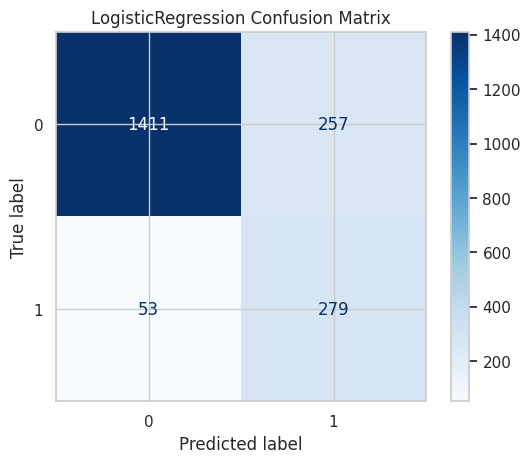


=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1668
           1       0.75      0.97      0.84       332

    accuracy                           0.94      2000
   macro avg       0.87      0.95      0.90      2000
weighted avg       0.95      0.94      0.94      2000



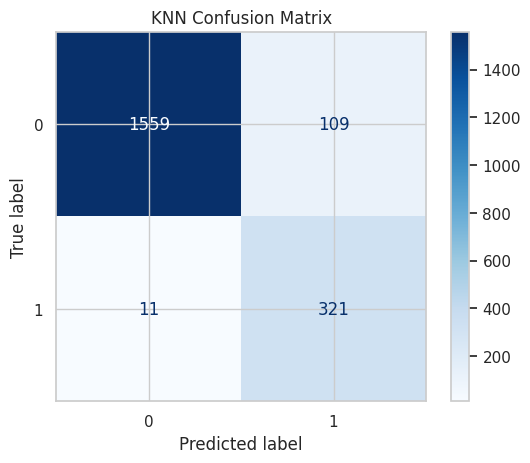


=== RandomForest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1668
           1       0.76      0.99      0.86       332

    accuracy                           0.95      2000
   macro avg       0.88      0.97      0.91      2000
weighted avg       0.96      0.95      0.95      2000



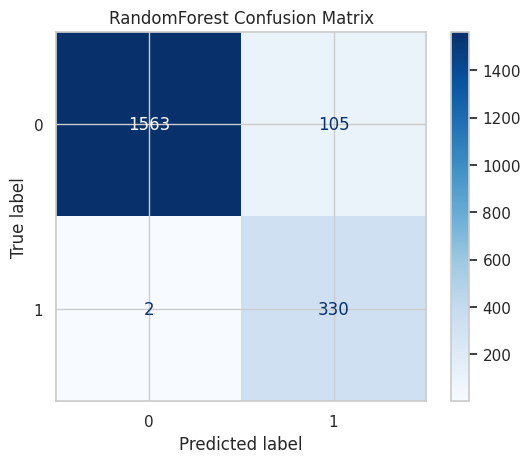


=== NaiveBayes Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1668
           1       0.47      0.87      0.61       332

    accuracy                           0.82      2000
   macro avg       0.72      0.84      0.74      2000
weighted avg       0.89      0.82      0.83      2000



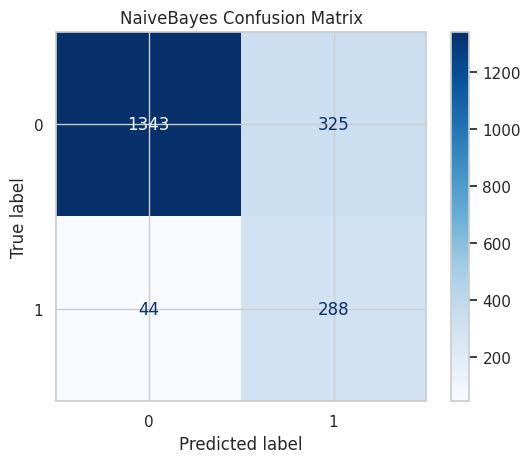

=== Metrics Summary ===
                    Precision_Yes  Recall_Yes    F1_Yes
LogisticRegression       0.520522    0.840361  0.642857
KNN                      0.746512    0.966867  0.842520
RandomForest             0.758621    0.993976  0.860495
NaiveBayes               0.469821    0.867470  0.609524

Best model: RandomForest (F1_Yes=0.8605)


In [ ]:
# 3 features ปกติ
features_3 = ['IQ','GPA_scaled','Communication_Skills']
results_3, df_metrics_3, best_3 = run_grid_pipeline(df, features_3, add_interaction=False)



### 3 Features แบบมี Feature Interaction


=== LogisticRegression Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1668
           1       0.52      0.84      0.64       332

    accuracy                           0.84      2000
   macro avg       0.74      0.84      0.77      2000
weighted avg       0.89      0.84      0.86      2000



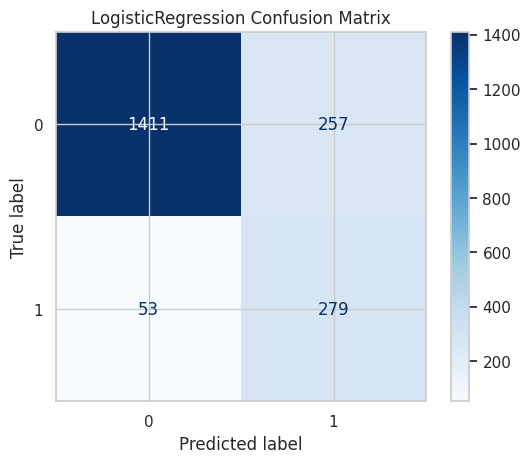


=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1668
           1       0.73      0.98      0.84       332

    accuracy                           0.94      2000
   macro avg       0.86      0.95      0.90      2000
weighted avg       0.95      0.94      0.94      2000



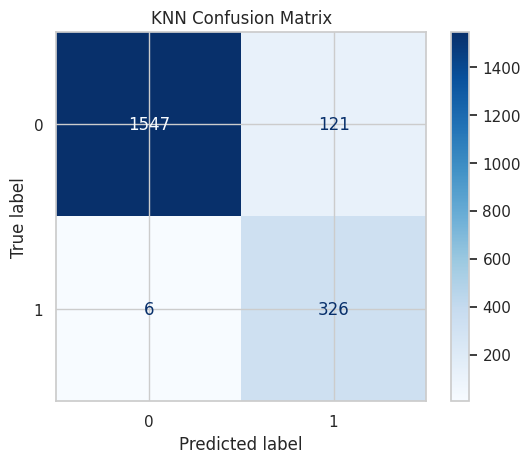


=== RandomForest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1668
           1       0.76      0.99      0.86       332

    accuracy                           0.95      2000
   macro avg       0.88      0.97      0.91      2000
weighted avg       0.96      0.95      0.95      2000



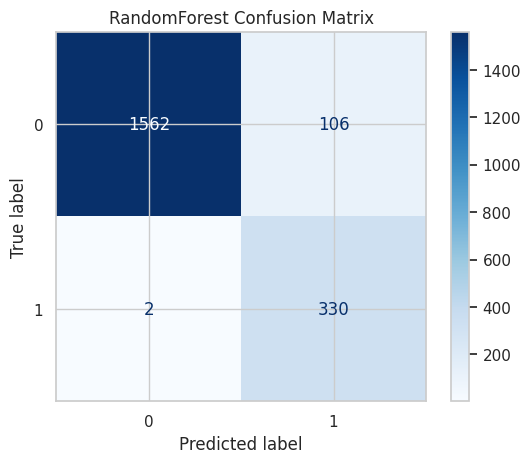


=== NaiveBayes Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1668
           1       0.46      0.80      0.59       332

    accuracy                           0.81      2000
   macro avg       0.71      0.81      0.73      2000
weighted avg       0.87      0.81      0.83      2000



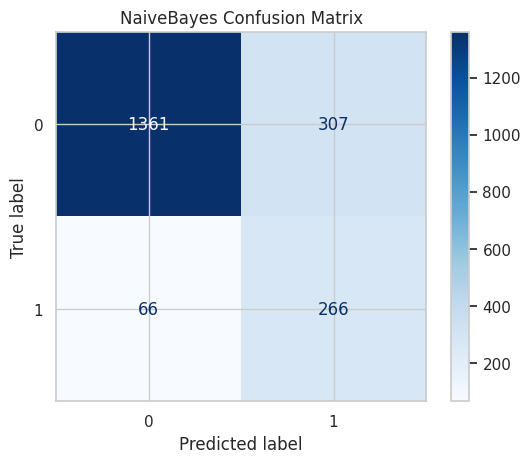

=== Metrics Summary ===
                    Precision_Yes  Recall_Yes    F1_Yes
LogisticRegression       0.520522    0.840361  0.642857
KNN                      0.729306    0.981928  0.836970
RandomForest             0.756881    0.993976  0.859375
NaiveBayes               0.464223    0.801205  0.587845

Best model: RandomForest (F1_Yes=0.8594)


In [ ]:
features_3 = ['IQ','GPA_scaled','Communication_Skills']
results_3_int, df_metrics_3_int, best_3_int = run_grid_pipeline(df, features_3, add_interaction=True)




### 6 Features แบบไม่มี Feature Interaction


=== LogisticRegression Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1668
           1       0.56      0.87      0.68       332

    accuracy                           0.86      2000
   macro avg       0.77      0.87      0.80      2000
weighted avg       0.90      0.86      0.88      2000



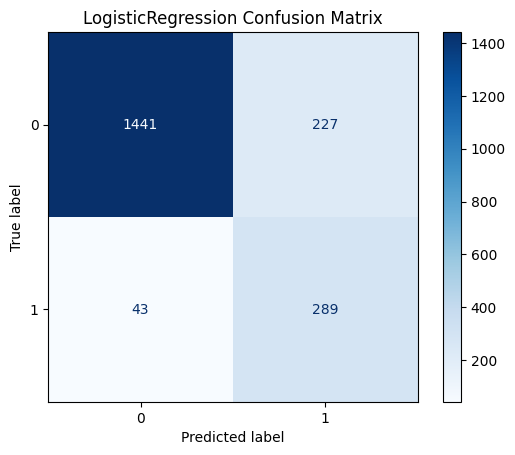


=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1668
           1       0.79      0.92      0.85       332

    accuracy                           0.95      2000
   macro avg       0.88      0.94      0.91      2000
weighted avg       0.95      0.95      0.95      2000



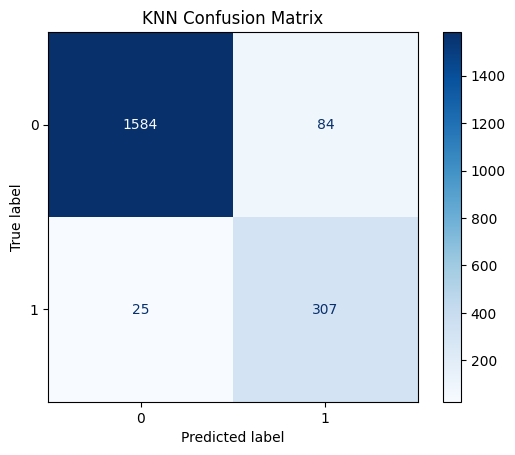


=== RandomForest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       0.99      1.00      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



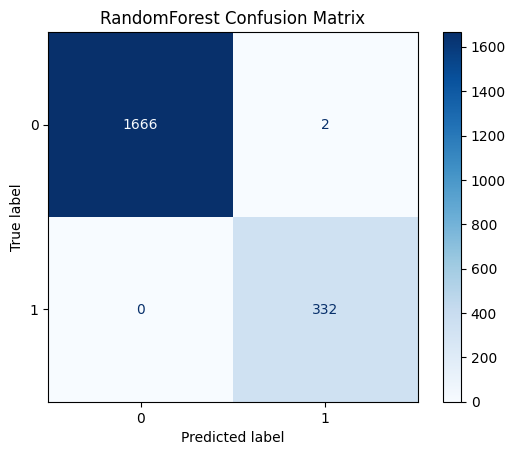


=== NaiveBayes Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1668
           1       0.53      0.89      0.66       332

    accuracy                           0.85      2000
   macro avg       0.75      0.87      0.78      2000
weighted avg       0.90      0.85      0.86      2000



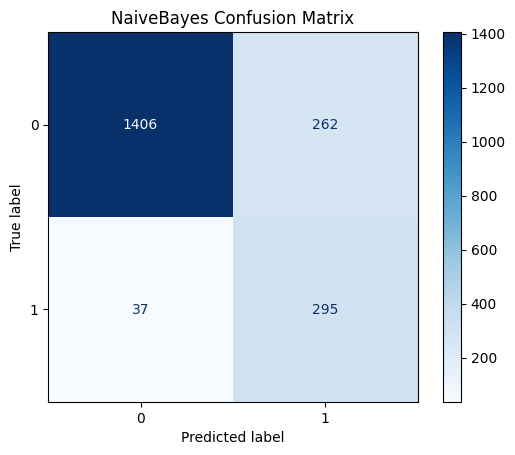

=== Metrics Summary ===
                    Precision_Yes  Recall_Yes    F1_Yes
LogisticRegression       0.560078    0.870482  0.681604
KNN                      0.785166    0.924699  0.849239
RandomForest             0.994012    1.000000  0.996997
NaiveBayes               0.529623    0.888554  0.663667

Best model: RandomForest (F1_Yes=0.9970)


In [ ]:
features_6 = ['IQ','GPA_scaled','Communication_Skills','Academic_Performance','Extra_Curricular_Score','Projects_Completed']
results_6, df_metrics_6, best_6 = run_grid_pipeline(df, features_6, add_interaction=False)


### 6 Features แบบมี Feature Interaction


=== LogisticRegression Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1668
           1       0.56      0.87      0.68       332

    accuracy                           0.87      2000
   macro avg       0.77      0.87      0.80      2000
weighted avg       0.90      0.87      0.88      2000



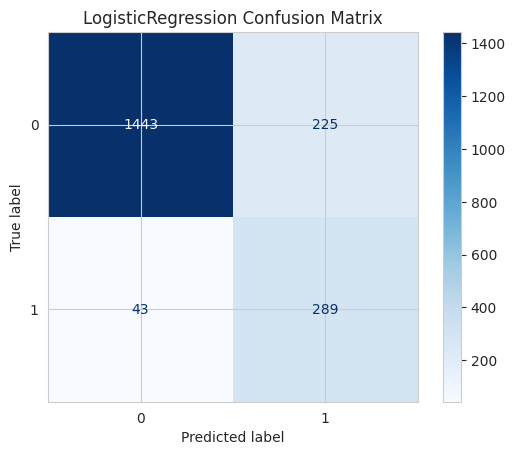


=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1668
           1       0.73      0.89      0.80       332

    accuracy                           0.93      2000
   macro avg       0.86      0.91      0.88      2000
weighted avg       0.94      0.93      0.93      2000



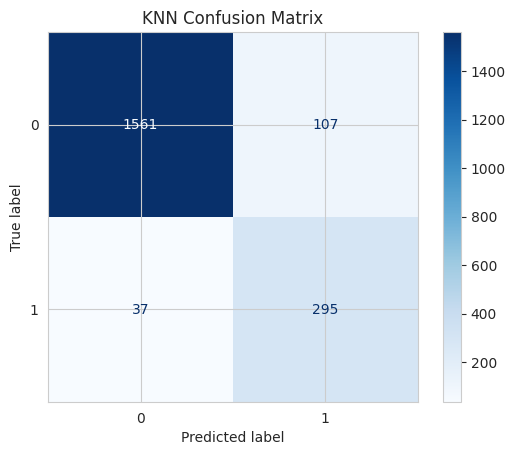


=== RandomForest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       0.99      1.00      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



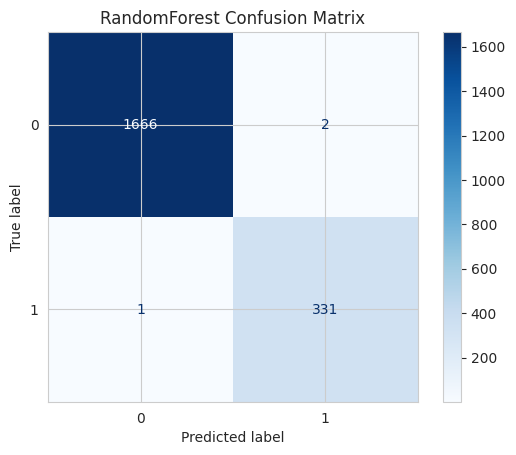


=== NaiveBayes Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1668
           1       0.53      0.86      0.65       332

    accuracy                           0.85      2000
   macro avg       0.75      0.85      0.78      2000
weighted avg       0.89      0.85      0.86      2000



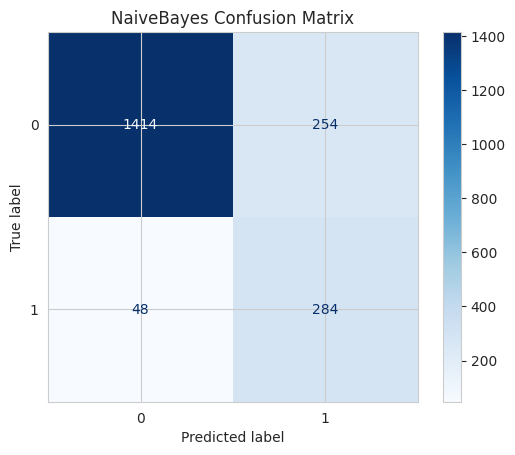

=== Metrics Summary ===
                    Precision_Yes  Recall_Yes    F1_Yes
LogisticRegression       0.562257    0.870482  0.683215
KNN                      0.733831    0.888554  0.803815
RandomForest             0.993994    0.996988  0.995489
NaiveBayes               0.527881    0.855422  0.652874

Best model: RandomForest (F1_Yes=0.9955)


In [ ]:
features_6 = ['IQ','GPA_scaled','Communication_Skills','Academic_Performance','Extra_Curricular_Score','Projects_Completed']
results_6_int, df_metrics_6_int, best_6_int = run_grid_pipeline(df, features_6, add_interaction=True)

### Test Model

In [ ]:
def predict_students(model, features, input_data, interaction_feature='Internship_Experience'):
    """
    model: โมเดลที่เทรนแล้ว (pipeline หรือ classifier)
    features: list ของชื่อฟีเจอร์ต้นฉบับที่โมเดลใช้เทรน
    input_data: list ของ dict ข้อมูลนักเรียน [{'IQ':120, ...}, {...}, ...]
    interaction_feature: ชื่อฟีเจอร์สำหรับสร้าง interaction
    """
    # แปลง list ของ dict → DataFrame
    df_input = pd.DataFrame(input_data)

    # Encode categorical feature interaction_feature
    if interaction_feature in df_input.columns:
        df_input[interaction_feature] = df_input[interaction_feature].map({'No':0,'Yes':1})

    # ตรวจสอบว่ามี interaction features ที่โมเดลต้องการหรือไม่
    model_features = getattr(model, 'feature_names_in_', features)

    # สร้าง interaction features ที่ขาดใน df_input
    for col in model_features:
        if col not in df_input.columns:
            if '_x_' in col:
                base_feature = col.split('_x_')[0]
                if base_feature in df_input.columns and interaction_feature in df_input.columns:
                    df_input[col] = df_input[base_feature] * df_input[interaction_feature]

    # เลือก columns ตามลำดับที่โมเดลต้องการ
    df_input = df_input[model_features]

    # predict probability
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(df_input)[:,1]
    else:
        prob = None

    # predict class
    pred = model.predict(df_input)

    return pred, prob


In [ ]:
def input_student_data(features, interaction_feature='Internship_Experience'):
    """
    ให้ผู้ใช้กรอกข้อมูลนักเรียนทีละฟีเจอร์
    features: list ของชื่อฟีเจอร์
    interaction_feature: ชื่อฟีเจอร์ categorical
    """
    student = {}
    for f in features:
        if f == interaction_feature:
            val = input(f"Enter {f} (Yes/No): ")
            student[f] = val
        else:
            val = input(f"Enter {f}: ")
            try:
                val = float(val)
            except:
                pass
            student[f] = val
    return student

# ตัวอย่างการใช้งาน
features_6 = ['IQ','GPA_scaled','Communication_Skills','Academic_Performance',
              'Extra_Curricular_Score','Projects_Completed','Internship_Experience']

input_students = []
n = int(input("How many students to predict? "))

for i in range(n):
    print(f"\nInput data for student {i+1}:")
    student = input_student_data(features_6)
    input_students.append(student)

# ทำนายด้วยโมเดล
best_model = results_6[best_6]['model']
pred, prob = predict_students(best_model, features_6, input_students)

df_pred = pd.DataFrame(input_students)
df_pred['Predicted'] = pred
df_pred['Probability'] = prob
df_pred['Predicted_Label'] = df_pred['Predicted'].map({0:'No',1:'Yes'})

# กำหนดลำดับคอลัมน์ให้สวยงาม
display_cols = features_6 + ['Predicted_Label','Probability']
df_pred_display = df_pred[display_cols]

# แสดง DataFrame แบบสวยงาม
print("\nPredictions for all students:")
display(df_pred_display.style.background_gradient(cmap='YlGnBu').format({'Probability':'{:.2f}'}))

How many students to predict? 1

Input data for student 1:
Enter IQ: 130
Enter GPA_scaled: 3.54
Enter Communication_Skills: 5
Enter Academic_Performance: 8
Enter Extra_Curricular_Score: 4
Enter Projects_Completed: 2
Enter Internship_Experience (Yes/No): Yes

Predictions for all students:


### Feature Importance

                  Feature  Importance
2    Communication_Skills    0.297516
0                      IQ    0.291960
1              GPA_scaled    0.270325
5      Projects_Completed    0.133538
3    Academic_Performance    0.003623
4  Extra_Curricular_Score    0.003038


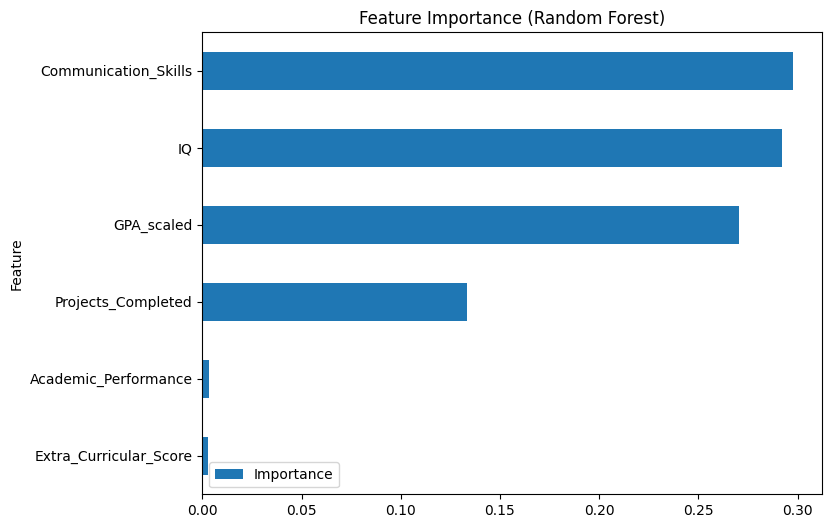

In [ ]:
# ดึงชื่อฟีเจอร์ที่โมเดลใช้จริง (หลัง preprocess)
features = best_model.feature_names_in_

# ดึงค่าความสำคัญ
importances = best_model.named_steps['clf'].feature_importances_

# ทำเป็น DataFrame
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(df_importance)

df_importance.plot(kind='barh', x='Feature', y='Importance', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()



## **Summary**

In [ ]:
# สร้าง DataFrame รวมทุกชุด feature + interaction
f1_all = []

# 3 features ปกติ
for model_name, row in df_metrics_3.iterrows():
    f1_all.append({'Feature_Set': '3_features', 'Model': model_name, 'F1_Score': row['F1_Yes']})

# 3 features + interaction
for model_name, row in df_metrics_3_int.iterrows():
    f1_all.append({'Feature_Set': '3_features + interaction', 'Model': model_name, 'F1_Score': row['F1_Yes']})

# 6 features ปกติ
for model_name, row in df_metrics_6.iterrows():
    f1_all.append({'Feature_Set': '6_features', 'Model': model_name, 'F1_Score': row['F1_Yes']})

# 6 features + interaction
for model_name, row in df_metrics_6_int.iterrows():
    f1_all.append({'Feature_Set': '6_features + interaction', 'Model': model_name, 'F1_Score': row['F1_Yes']})

df_f1_all = pd.DataFrame(f1_all)
df_f1_all

Feature_Set               Model  F1_Score
0                 3_features  LogisticRegression  0.642857
1                 3_features                 KNN  0.842520
2                 3_features        RandomForest  0.860495
3                 3_features          NaiveBayes  0.609524
4   3_features + interaction  LogisticRegression  0.642857
5   3_features + interaction                 KNN  0.836970
6   3_features + interaction        RandomForest  0.859375
7   3_features + interaction          NaiveBayes  0.587845
8                 6_features  LogisticRegression  0.681604
9                 6_features                 KNN  0.849239
10                6_features        RandomForest  0.996997
11                6_features          NaiveBayes  0.663667
12  6_features + interaction  LogisticRegression  0.683215
13  6_features + interaction                 KNN  0.803815
14  6_features + interaction        RandomForest  0.995489
15  6_features + interaction          NaiveBayes  0.652874

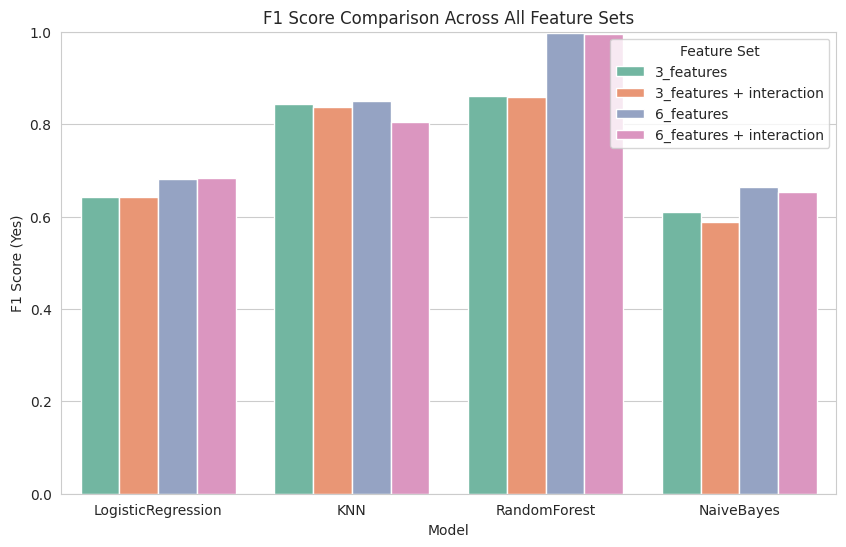

In [ ]:
# ตั้งขนาดกราฟและสไตล์
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# plot bar chart
sns.barplot(
    x='Model',
    y='F1_Score',
    hue='Feature_Set',
    data=df_f1_all,
    palette='Set2'
)

plt.ylim(0,1)
plt.title("F1 Score Comparison Across All Feature Sets")
plt.ylabel("F1 Score (Yes)")
plt.xlabel("Model")
plt.legend(title='Feature Set')
plt.show()

### อธิบายการทำงานของแต่ละ Model

#### Logistic Regression

**Logistic Regression**

แนวคิด: เป็นโมเดลการถดถอยเชิงตรรกะ ใช้สำหรับการจำแนกประเภท (Classification) ไม่ได้หาความสัมพันธ์เชิงเส้นตรง แต่ใช้ฟังก์ชัน Sigmoid Map ผลลัพธ์ให้เป็นความน่าจะเป็นระหว่าง 0 ถึง 1
จากนั้นแปลงความน่าจะเป็นนั้นเป็นคลาส (0 หรือ 1) โดยใช้ค่า Threshold (เช่น 0.5)

ทำอะไร: เหมาะสำหรับปัญหาการจำแนกประเภทแบบ Binary (2 คลาส)
มันจะพยายามหา "เส้นแบ่ง" (ในมิติสูงอาจจะเป็นระนาบ) ที่แยกข้อมูลสองคลาสออกจากกันได้ดีที่สุด
solver='liblinear': เป็นอัลกอริทึมที่ใช้ในการแก้ปัญหาการปรับพารามิเตอร์ของโมเดล ซึ่งมีประสิทธิภาพดีกับชุดข้อมูลขนาดเล็กถึงปานกลาง
max_iter=5000: กำหนดจำนวนรอบสูงสุดที่อัลกอริทึมจะทำงานเพื่อหาค่าที่ดีที่สุด
param_grid: clf__C ใช้ควบคุม Regularization (การป้องกัน Overfitting) ค่า C ที่ต่างกันจะให้เส้นแบ่งที่ยืดหยุ่นต่างกัน clf__penalty=['l2'] กำหนดประเภทของการปรับ Regularization (L2 Regularization ช่วยลดขนาดของ Coefficients)

อยู่ใน Pipeline: หลัง SMOTE และ StandardScaler ข้อมูลจะถูกปรับสมดุลและปรับขนาดก่อนเข้าสู่ Logistic Regression

#### KNN

แนวคิด: เป็นโมเดลประเภท "จำแนกตามความใกล้ชิด" (Instance-based Learning) โดยมีหลักการง่ายๆ ว่า "คนที่มีลักษณะคล้ายกันมักจะอยู่กลุ่มเดียวกัน" โมเดลไม่ได้เรียนรู้สมการทางคณิตศาสตร์ที่ซับซ้อน แต่จะจดจำข้อมูลทั้งหมดไว้ แล้วตัดสินใจโดยดูจากข้อมูลตัวอย่างที่อยู่ใกล้ที่สุดในพื้นที่ Feature Space

ทำอะไร: เมื่อมีข้อมูลนักศึกษาคนใหม่เข้ามา โมเดลจะคำนวณระยะทาง (Distance) ระหว่างนักศึกษาคนนั้นกับข้อมูลเก่าทั้งหมด แล้วเลือกข้อมูลที่ใกล้ที่สุดจำนวน $k$ คน ($k$-neighbors) เพื่อทำการโหวต ถ้าเพื่อนบ้านส่วนใหญ่ "ได้งาน" โมเดลก็จะทำนายว่าคนนี้ "ได้งาน" ด้วย

อยู่ใน Pipeline: KNN อ่อนไหวต่อหน่วยของข้อมูลมาก (เช่น GPA หลักหน่วย กับ IQ หลักร้อย) ดังนั้น StandardScaler ก่อนหน้าจึงสำคัญที่สุด เพื่อปรับให้ทุกระยะทางมีความหมายเท่าเทียมกัน

#### Random Forest

แนวคิด: เป็นโมเดลประเภท Ensemble Learning (การเรียนรู้แบบทีม) ที่ใช้หลักการ "หลายหัวดีกว่าหัวเดียว" โดยสร้าง Decision Tree (ต้นไม้ตัดสินใจ) จำนวนมากมาช่วยกันทำนาย แล้วใช้การโหวตเสียงข้างมาก (Majority Vote) เพื่อสรุปผลลัพธ์สุดท้าย

ทำอะไร: แทนที่จะสร้างต้นไม้ใหญ่ต้นเดียว (ซึ่งเสี่ยงต่อการจำข้อสอบ หรือ Overfitting) Random Forest จะสร้างต้นไม้ย่อยหลายร้อยต้น โดยแต่ละต้นจะเรียนรู้จาก "ส่วนหนึ่งของข้อมูล" (Bootstrap Sampling) และ "ส่วนหนึ่งของ Feature" แบบสุ่ม ทำให้มีความหลากหลายและทนทานต่อข้อมูลรบกวนได้ดีเยี่ยม สามารถจับความสัมพันธ์ที่ซับซ้อน (Non-linear) ระหว่างกิจกรรมกับเกรดได้ดีที่สุด

อยู่ใน Pipeline: ทำงานได้ดีแม้ข้อมูลจะไม่ถูก Scale แต่การทำ SMOTE ก่อนหน้าช่วยให้ต้นไม้ได้เรียนรู้ข้อมูลทั้งสองกลุ่มอย่างทั่วถึง

#### GuassianNB (Naive Bayes)

แนวคิด: เป็นโมเดลทางสถิติที่ใช้ ทฤษฎีความน่าจะเป็นของเบส์ (Bayes' Theorem) โดยมีสมมติฐานที่ "ซื่อ" (Naive) ว่า ตัวแปรทุกตัวเป็นอิสระต่อกัน (เช่น เชื่อว่าเกรดดี ไม่เกี่ยวกับว่า IQ สูงไหม) และสมมติว่าข้อมูลเชิงปริมาณมีการแจกแจงแบบปกติ (Gaussian/Bell Curve)

ทำอะไร: โมเดลจะคำนวณความน่าจะเป็นของแต่ละ Feature ว่าถ้าเป็นคนได้งาน ค่าเฉลี่ยของ IQ, GPA ควรอยู่ที่เท่าไหร่ เมื่อมีข้อมูลใหม่เข้ามา มันจะคำนวณความน่าจะเป็นรวม (Posterior Probability) ว่าโอกาสที่จะเป็นคลาส "ได้งาน" เทียบกับ "ไม่ได้งาน" อันไหนมากกว่ากัน

อยู่ใน Pipeline: เนื่องจากโมเดลตั้งสมมติฐานว่าข้อมูลเป็น Bell Curve การทำ StandardScaler หรือการจัดการ Outliers (ในขั้นตอน Preprocessing) จะช่วยให้ข้อมูลเข้าใกล้การแจกแจงแบบปกติมากขึ้น ทำให้โมเดลทำงานได้ดีขึ้น

### สรุปผลลัพธ์

####สรุปการทำงานของโมเดล (Model Performance Summary)
จากการทดลองเปรียบเทียบโมเดล (Model Benchmarking) และกลยุทธ์การคัดเลือกตัวแปร (Feature Selection Strategy) ทั้ง 3 รูปแบบ เราได้ข้อสรุปดังนี้:
*   Random Forest คือโมเดลที่มีประสิทธิภาพสูงสุด (The Winner):
    - เมื่อใช้ข้อมูลครบถ้วน (Experiment 2: Full Features) Random Forest สามารถทำนายผลได้แม่นยำสูงสุดถึง F1-Score 0.9970
    - เหตุผล: เนื่องจากข้อมูลการจ้างงานมีความซับซ้อนและไม่เป็นเส้นตรง (Non-linear) โมเดลประเภท Ensemble ที่ใช้ต้นไม้ตัดสินใจหลายต้น (Decision Trees) จึงสามารถจับ Pattern ของความสัมพันธ์ระหว่าง "ผลการเรียน" และ "กิจกรรม" ได้ดีที่สุด
*   ผลกระทบของข้อมูล (Feature Impact):
    - Exp 1 (เกรด + IQ): โมเดลทำนายได้ในระดับปานกลาง (F1 ~0.86) แสดงให้เห็นว่าผลการเรียนเพียงอย่างเดียวไม่สามารถการันตีการได้งานได้
    - Exp 2 (เพิ่มกิจกรรม + โปรเจกต์): คะแนนของทุกโมเดลเพิ่มขึ้น โดยเฉพาะ Random Forest ที่ก้าวกระโดด แสดงว่า "ประสบการณ์ทำโปรเจกต์และกิจกรรม" คือตัวแปรสำคัญที่ช่วยแยกคนได้งานออกจากคนไม่ได้งาน
    - Exp 3 (Feature Interaction): การสร้างตัวแปรซับซ้อน (เช่น เกรด x ประสบการณ์ฝึกงาน) ไม่ช่วยให้ผลดีขึ้น และทำให้โมเดลบางตัว (KNN) ประสิทธิภาพลดลงเนื่องจากเกิดสัญญาณรบกวน (Noise)

####สรุปการแก้ปัญหาตามโจทย์ที่ตั้งไว้ (Problem Solving Conclusion)
โครงการนี้สามารถตอบวัตถุประสงค์และ Problem Statement ได้อย่างสมบูรณ์ ดังนี้:
*   สามารถทำนายโอกาสได้งานได้จริงหรือไม่?
    - ตอบ: ทำได้จริงและแม่นยำมาก ด้วยโมเดล Random Forest เราสามารถสร้างเครื่องมือคัดกรองที่มีความแม่นยำสูง (High Precision) และแทบไม่พลาดเป้า (High Recall)
*   ปัจจัยอะไรสำคัญที่สุด? (Insight for Students)
    - ตอบ: ผลการทดลองยืนยันว่า "เกรดไม่ใช่ทุกอย่าง" นักศึกษาที่มีเกรดปานกลางแต่มี จำนวนโปรเจกต์ที่ทำสำเร็จ (Projects Completed) และ คะแนนกิจกรรม (Extra Curricular) สูง มีโอกาสได้งานสูงมาก
    - สิ่งนี้ช่วยให้นักศึกษารู้ทิศทางว่าควรเน้น "สร้างพอร์ตโฟลิโอ" ควบคู่ไปกับการเรียน
*   ประโยชน์ต่อผู้ใช้งาน (Stakeholder Impact)
    - มหาวิทยาลัย: สามารถใช้โมเดลนี้คัดกรองนักศึกษาชั้นปีสุดท้าย เพื่อเข้าไปช่วยเหลือกลุ่มเสี่ยงได้ทันท่วงที
    - บริษัท: ลดเวลาในการคัดกรองเรซูเม่ โดยใช้โมเดลช่วยจัดลำดับความน่าสนใจของผู้สมัคร